# Import Th∆∞ vi·ªán cho to√†n b·ªô Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings

# T·∫£i Data

## T·∫£i d·ªØ li·ªáu t·ª´ m√°y

In [ ]:
from google.colab import files

# Hi·ªÉn th·ªã dialog ƒë·ªÉ ch·ªçn file t·ª´ m√°y t√≠nh
uploaded = files.upload()

# Hi·ªÉn th·ªã t√™n c√°c file ƒë√£ t·∫£i l√™n
for filename in uploaded.keys():
    print(f'ƒê√£ t·∫£i l√™n file "{filename}" v·ªõi k√≠ch th∆∞·ªõc {len(uploaded[filename])} bytes')

Saving creditcard.csv to creditcard.csv
ƒê√£ t·∫£i l√™n file "creditcard.csv" v·ªõi k√≠ch th∆∞·ªõc 150828752 bytes


##T·∫£i d·ªØ li·ªáu t·ª´ Google Drive

###K·∫øt n·ªëi v·ªõi Drive


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Sau khi mount, b·∫°n c√≥ th·ªÉ truy c·∫≠p file trong Drive t·∫°i:
# /content/drive/MyDrive/

Mounted at /content/drive


###T·∫£i file t·ª´ Drive

In [ ]:
import pandas as pd

# ƒê∆∞·ªùng d·∫´n t·ªõi file
file_path = '/content/drive/MyDrive/creditcard.csv'

# ƒê·ªçc file CSV v√†o dataframe
df = pd.read_csv(file_path)

# Ki·ªÉm tra v√†i d√≤ng ƒë·∫ßu ti√™n
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

#Code m·∫´u Chatgpt


              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8404    0.8061    0.8229        98

    accuracy                         0.9994     56962
   macro avg     0.9200    0.9029    0.9113     56962
weighted avg     0.9994    0.9994    0.9994     56962



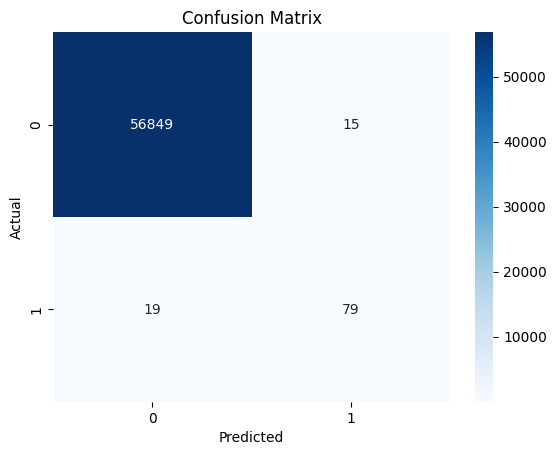

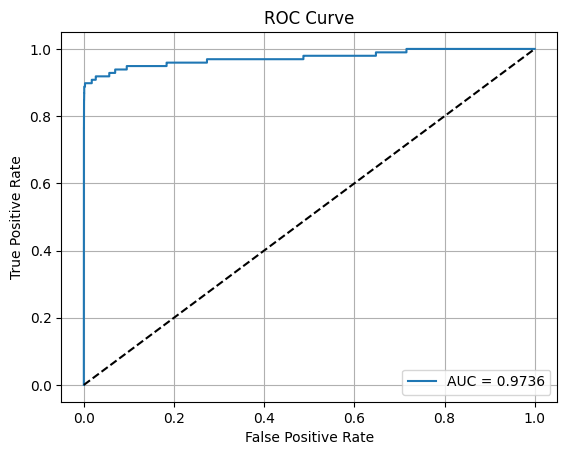

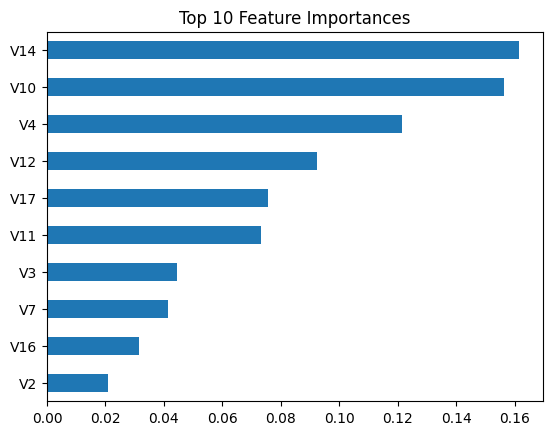

['random_forest_fraud_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("creditcard.csv")  # Link dataset g·ªëc: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
# C·ªôt "Class" l√† nh√£n (1 = fraud, 0 = kh√¥ng)
X = df.drop(columns=['Class'])
y = df['Class']

# Chu·∫©n h√≥a c·ªôt Amount (v√¨ V1‚ÄìV28 ƒë√£ ƒë∆∞·ª£c PCA chu·∫©n h√≥a)
from sklearn.preprocessing import StandardScaler
X['Amount'] = StandardScaler().fit_transform(X['Amount'].values.reshape(-1, 1))
X = X.drop(columns=['Time'])  # Time kh√¥ng h·ªØu √≠ch

# Chia train/test c√≥ gi·ªØ ph√¢n ph·ªëi fraud
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Hu·∫•n luy·ªán m√¥ h√¨nh
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    class_weight='balanced',  # ƒë·ªÉ x·ª≠ l√Ω l·ªách l·ªõp
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# ƒê√°nh gi√° m√¥ h√¨nh
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # X√°c su·∫•t l·ªõp fraud

# Classification report
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# ƒê√°nh gi√° ƒë·ªô quan tr·ªçng
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

# L∆∞u m√¥ h√¨nh
import joblib
joblib.dump(rf, 'random_forest_fraud_model.pkl')


#Code m·∫´u Claude


1. ƒê·ªåC V√Ä KH√ÅM PH√Å D·ªÆ LI·ªÜU BAN ƒê·∫¶U
--------------------------------------------------
K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (284807, 31)

Th√¥ng tin d·ªØ li·ªáu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 1

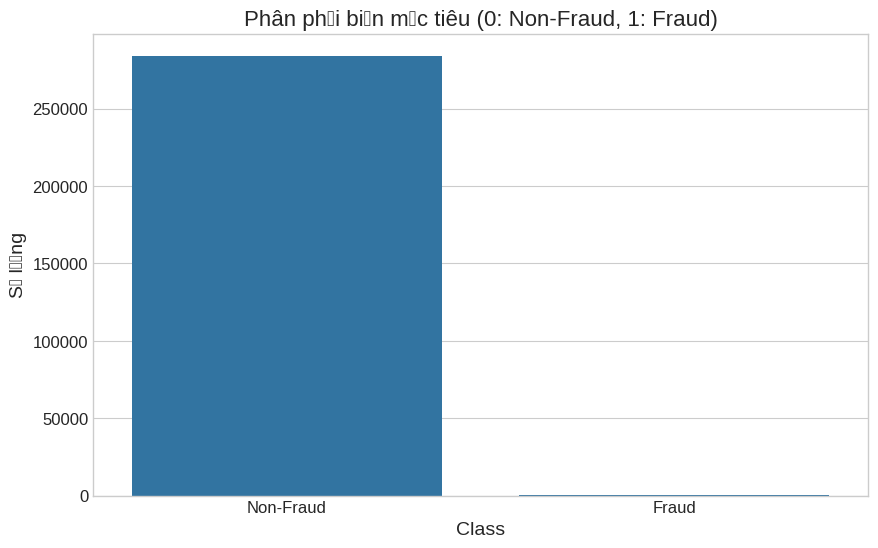

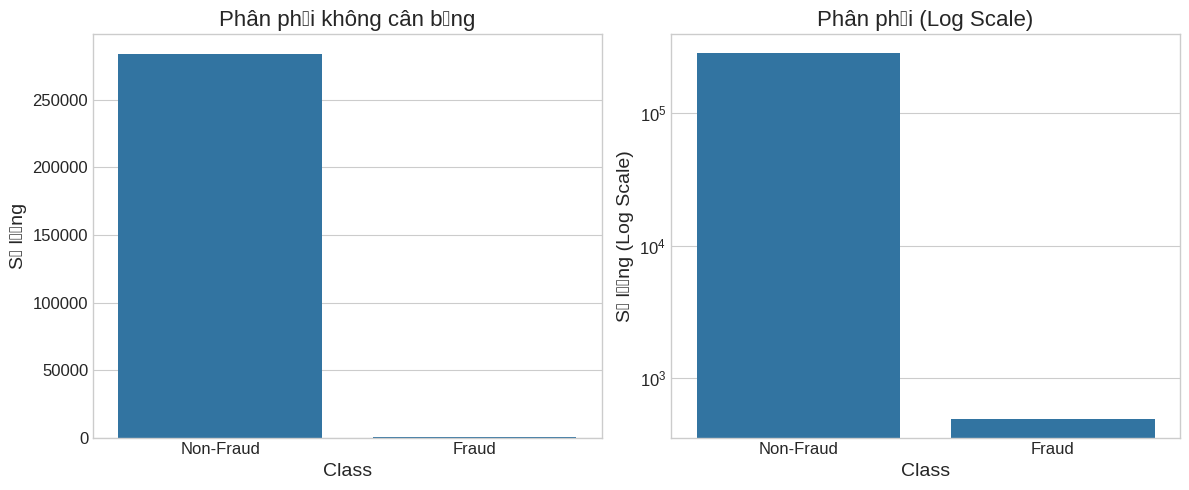

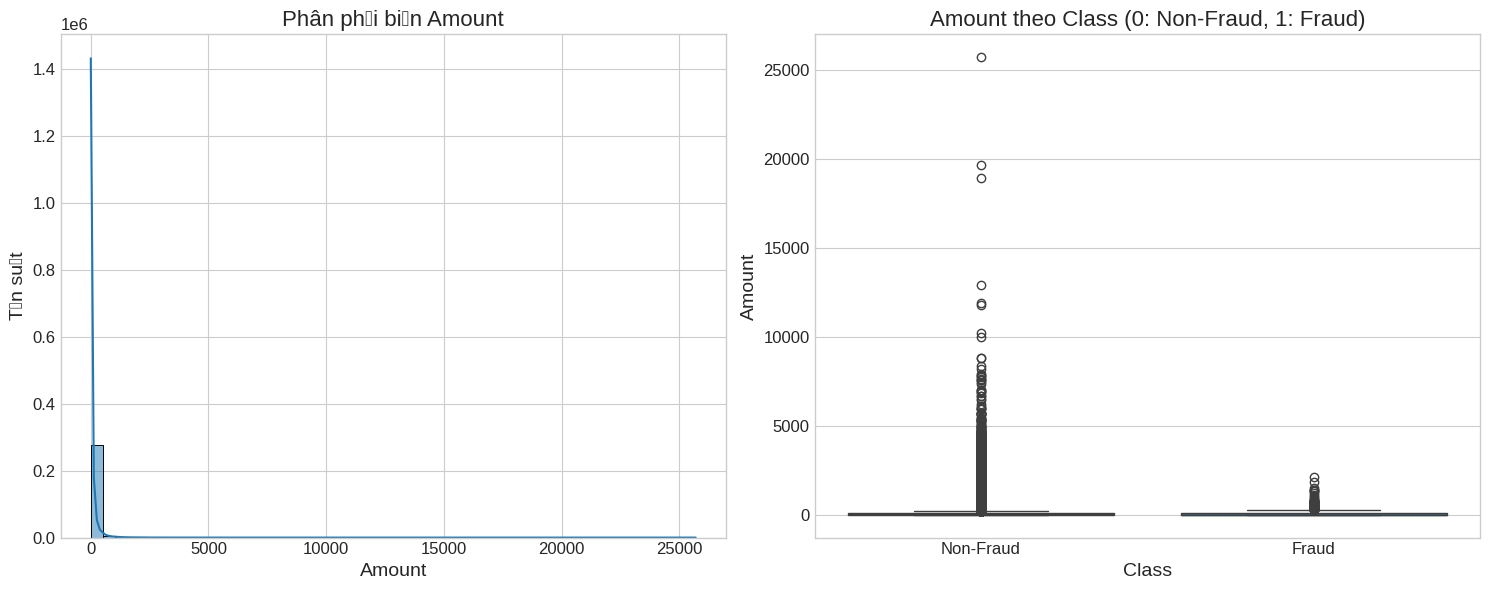

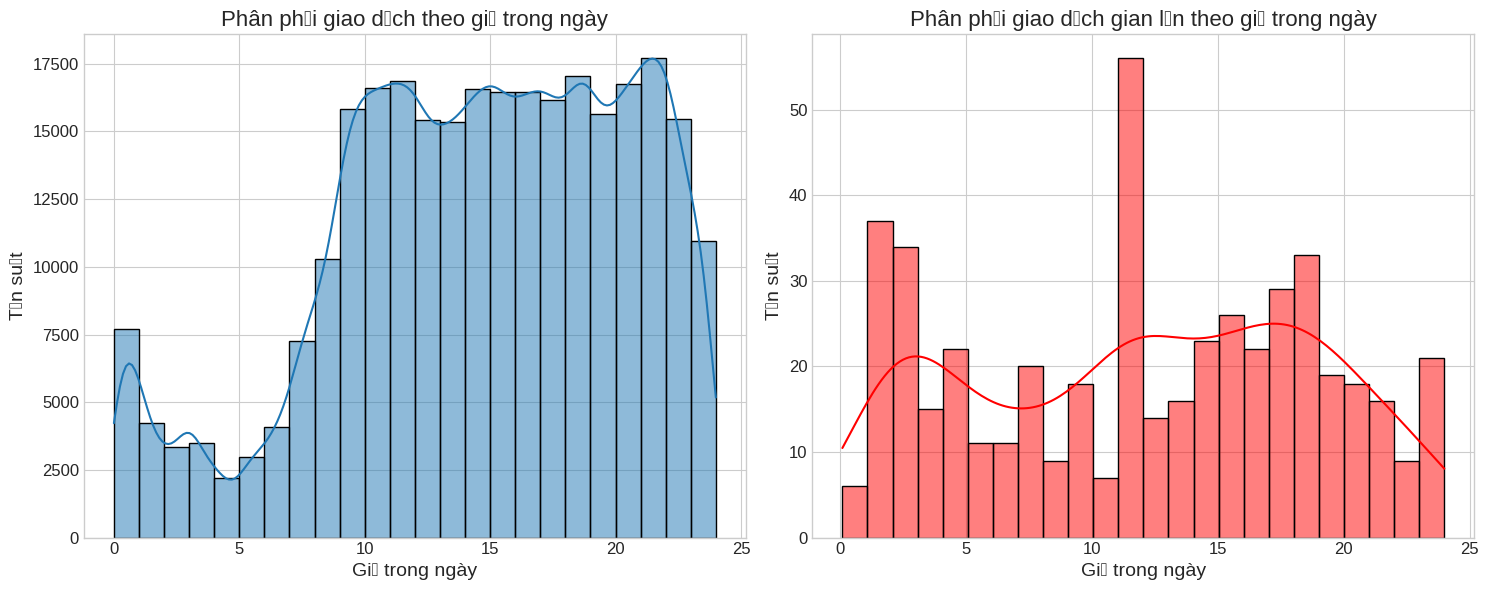

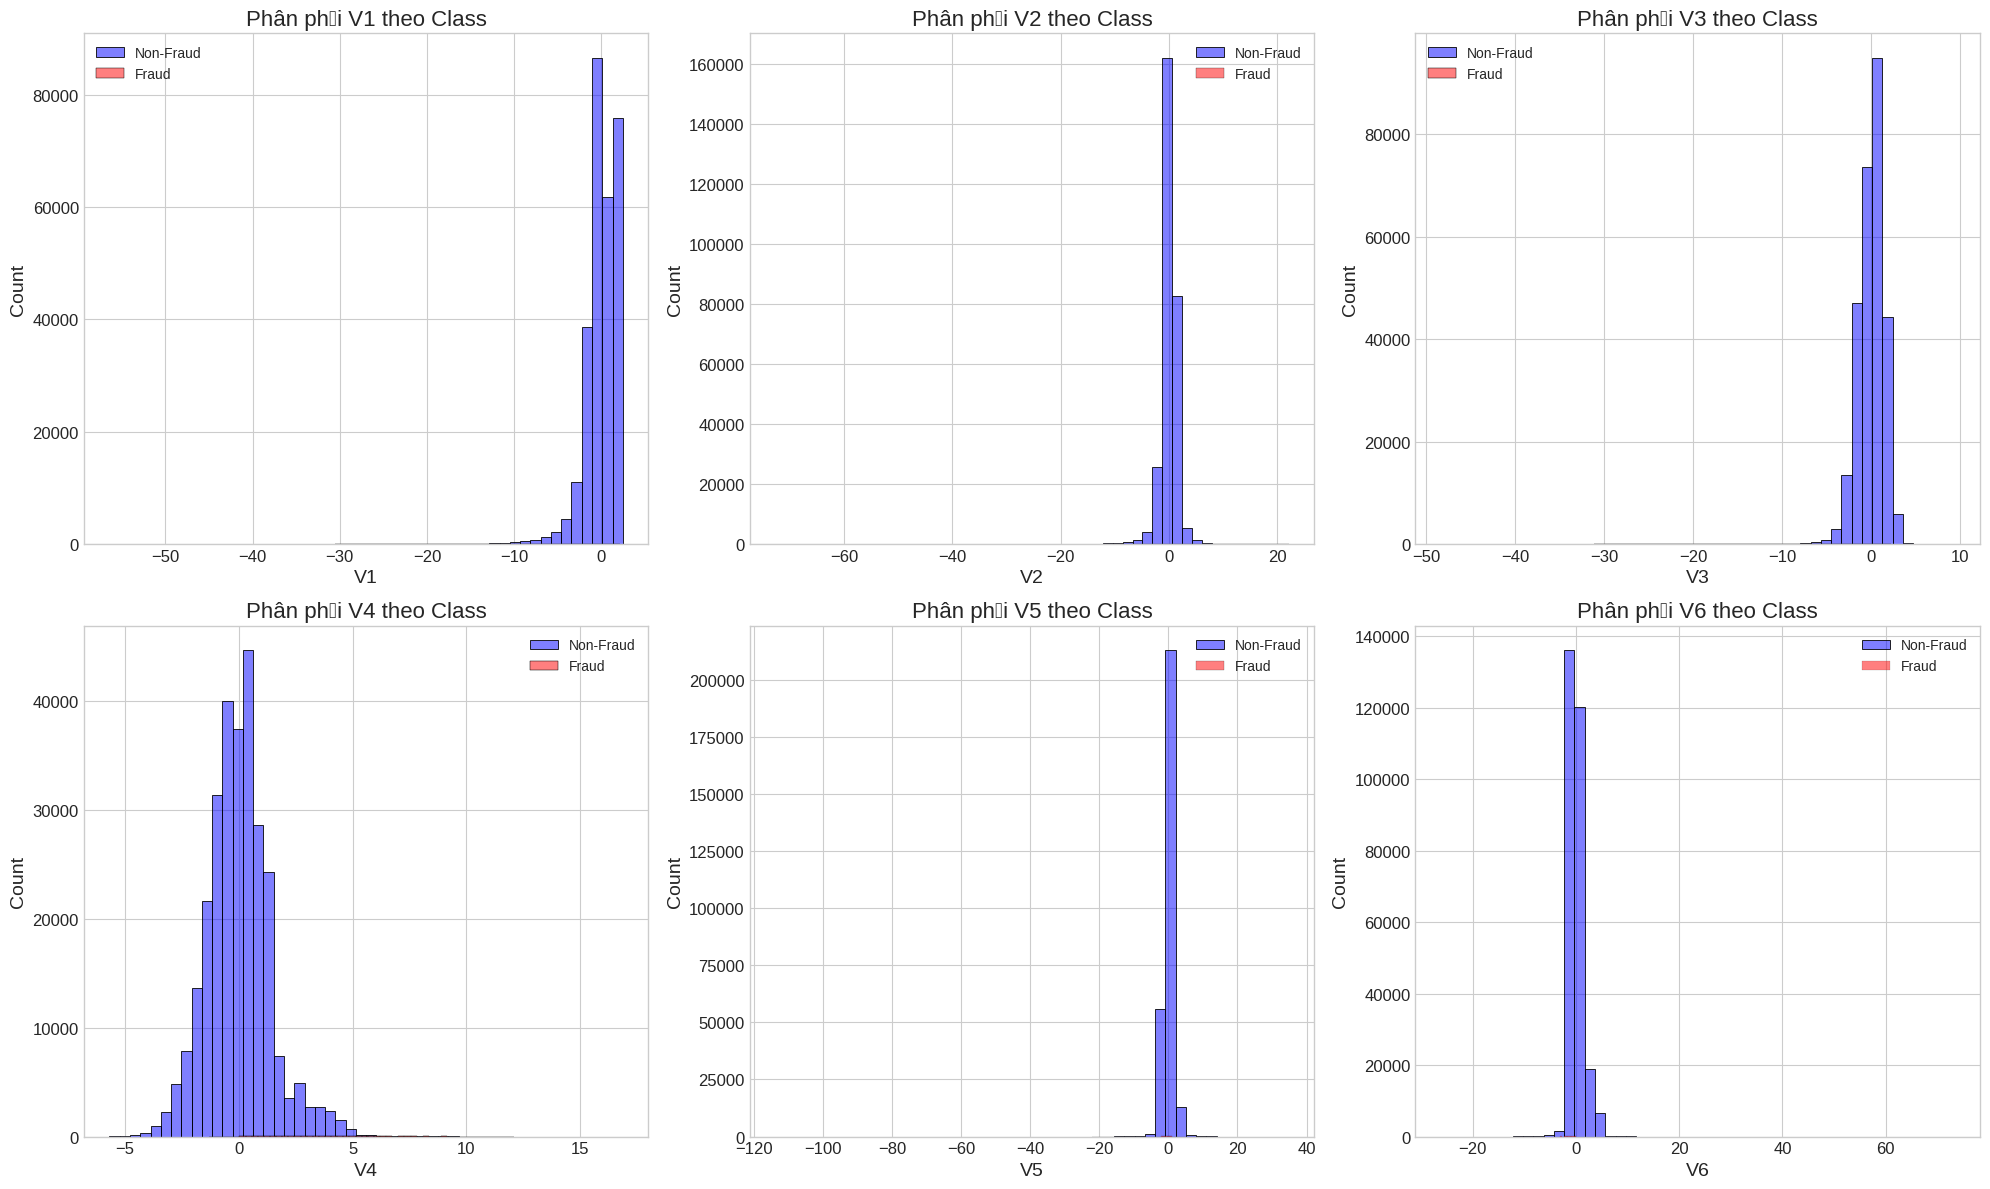

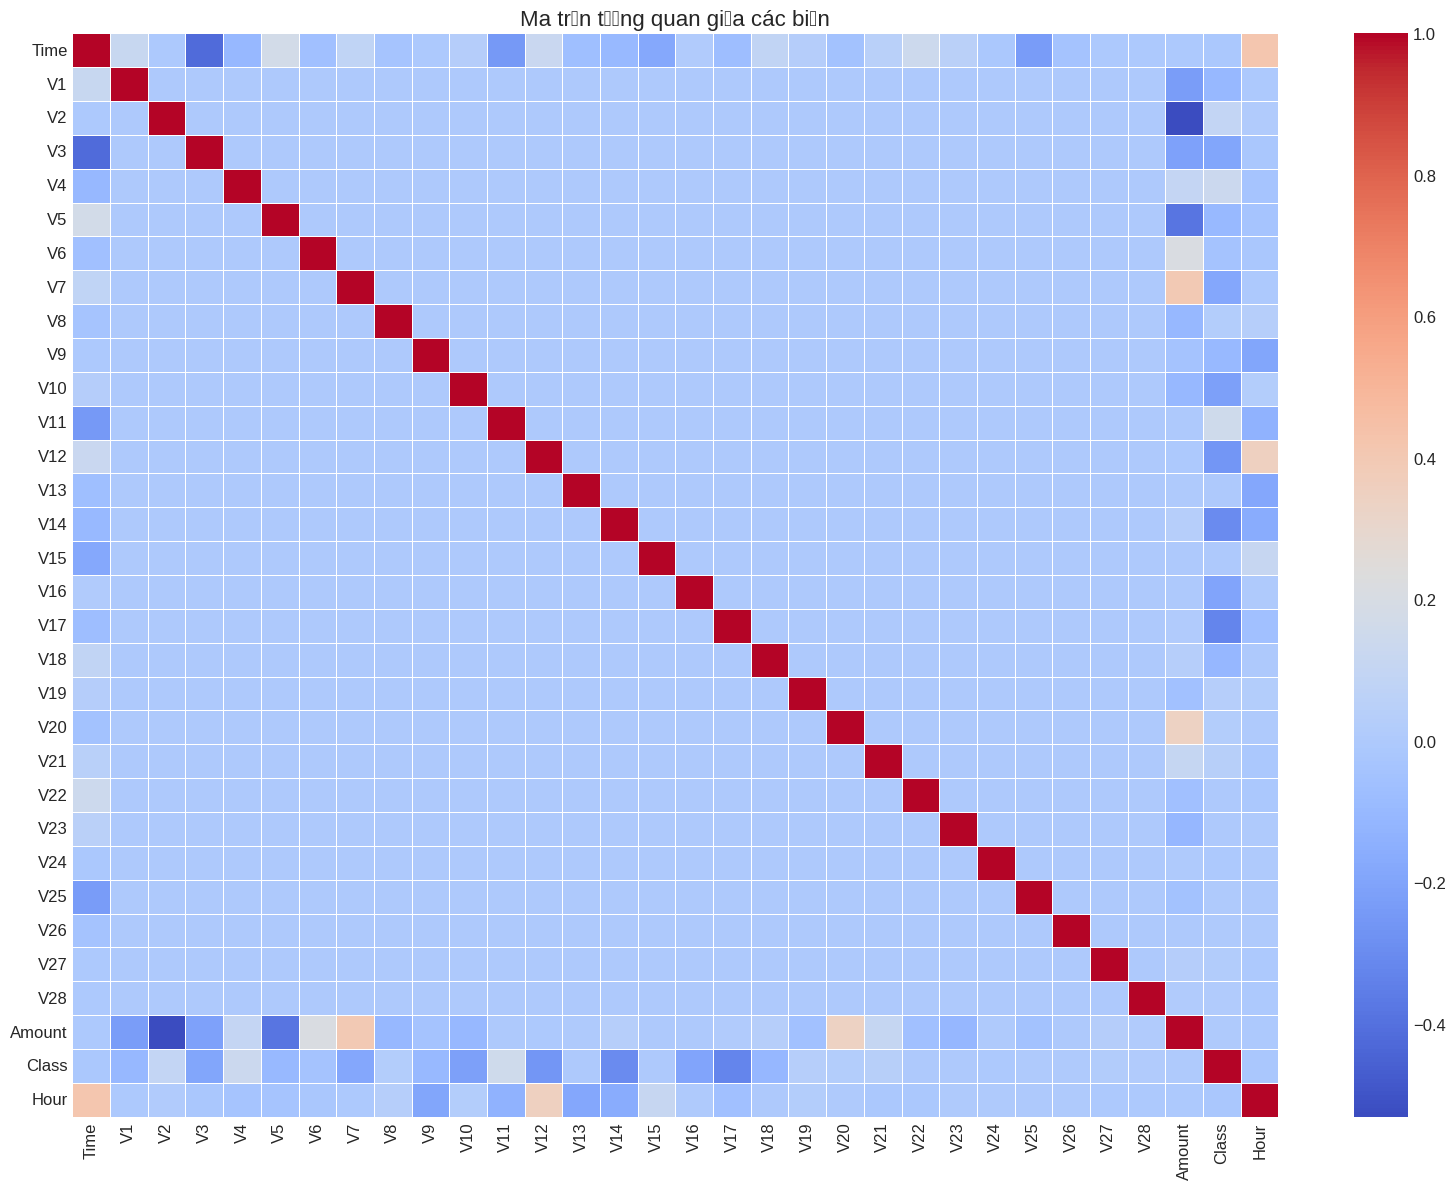

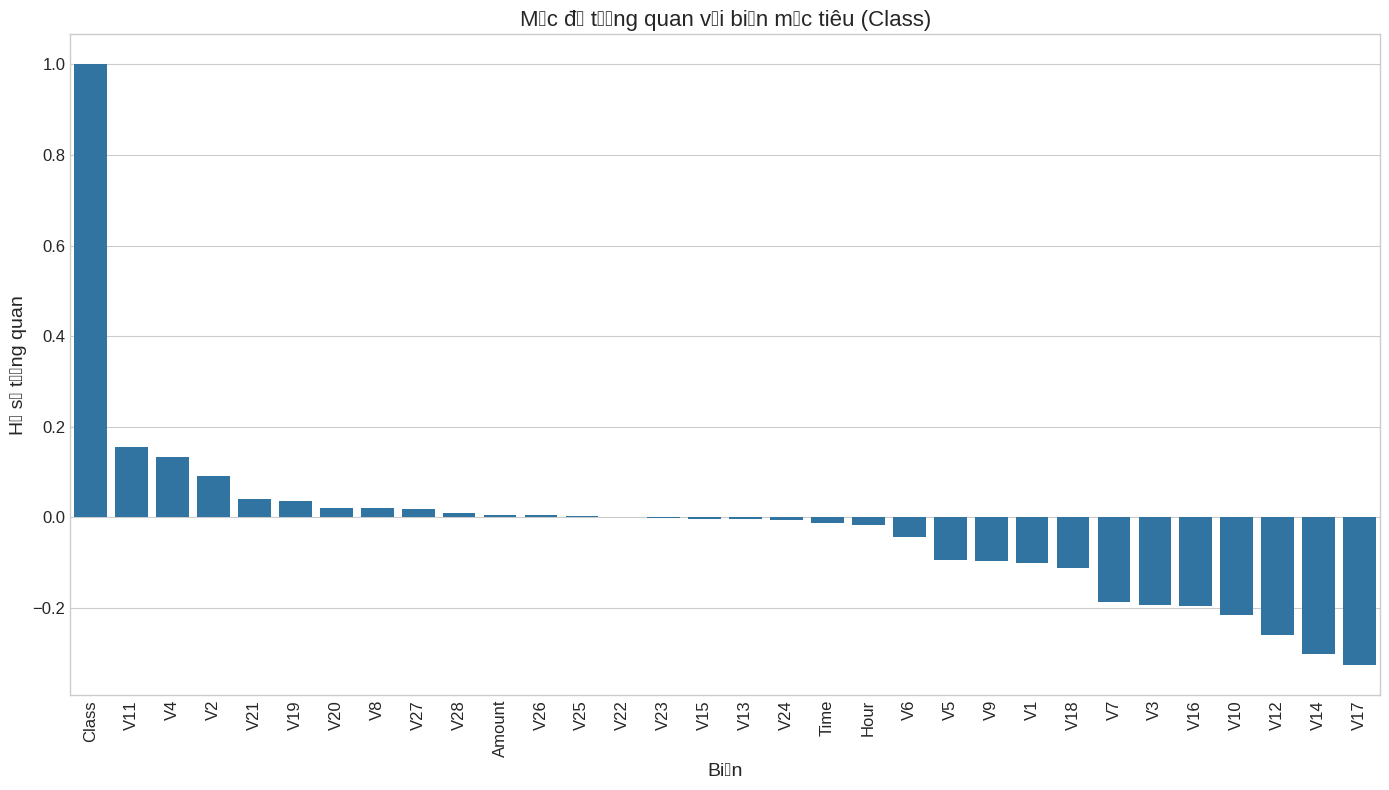

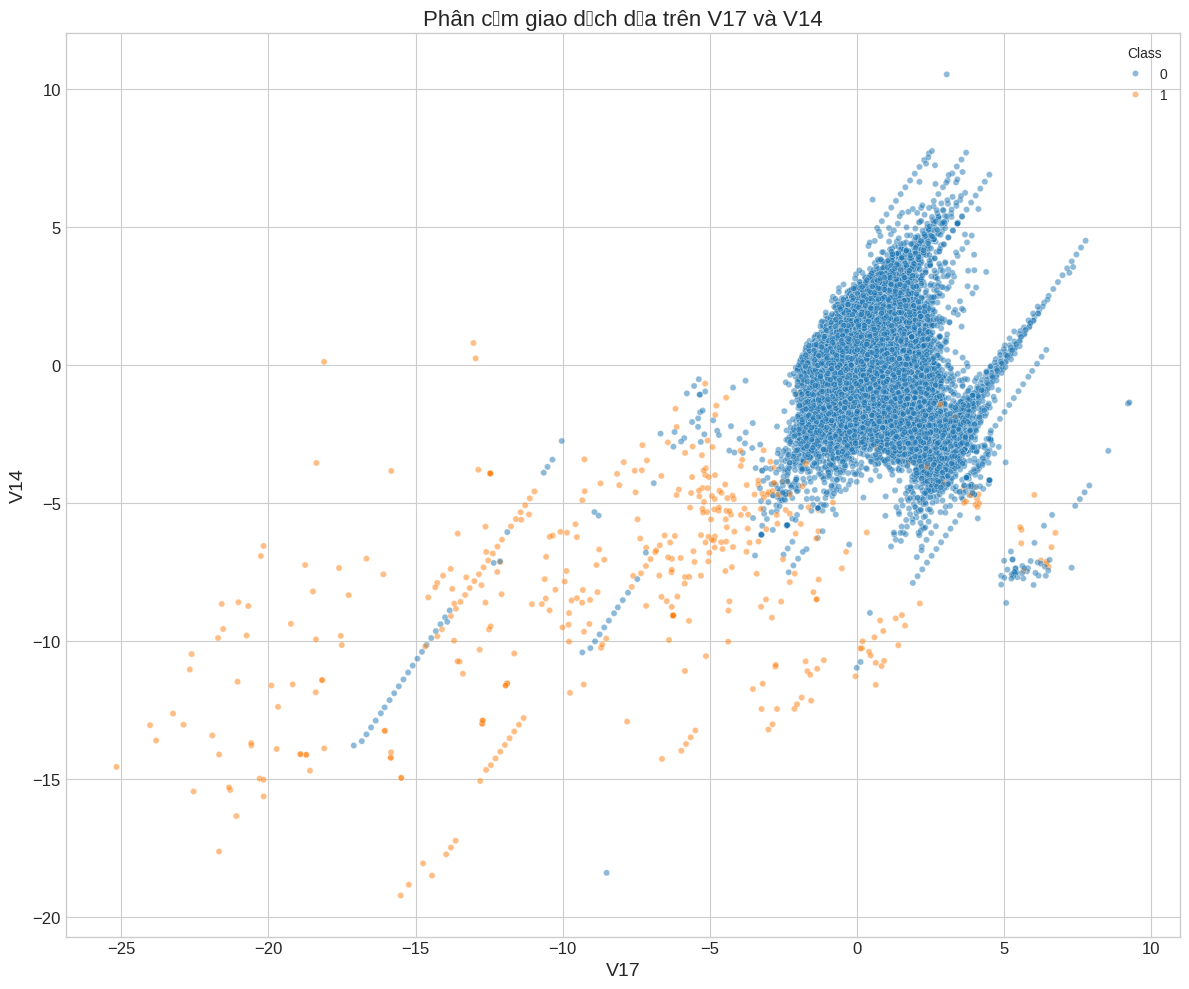


3. TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU
--------------------------------------------------
K√≠ch th∆∞·ªõc t·∫≠p hu·∫•n luy·ªán: (227845, 31), K√≠ch th∆∞·ªõc t·∫≠p ki·ªÉm th·ª≠: (56962, 31)
Ph√¢n ph·ªëi c·ªßa y trong t·∫≠p hu·∫•n luy·ªán: Counter({0: 227451, 1: 394})
Ph√¢n ph·ªëi c·ªßa y trong t·∫≠p ki·ªÉm th·ª≠: Counter({0: 56864, 1: 98})

Ki·ªÉm tra s·ª± kh√°c bi·ªát tr∆∞·ªõc v√† sau khi chu·∫©n h√≥a:
Amount tr∆∞·ªõc chu·∫©n h√≥a: count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64
Amount sau chu·∫©n h√≥a: count    227845.000000
mean          0.921034
std           3.489528
min          -0.306193
25%          -0.227697
50%           0.000000
75%           0.772303
max         357.260404
Name: Amount, dtype: float64

4. X·ª¨ L√ù M·∫§T C√ÇN B·∫∞NG D·ªÆ LI·ªÜU
--------------------------------------------------
Ph√¢n ph·ªëi ban ƒë·∫ßu: Co

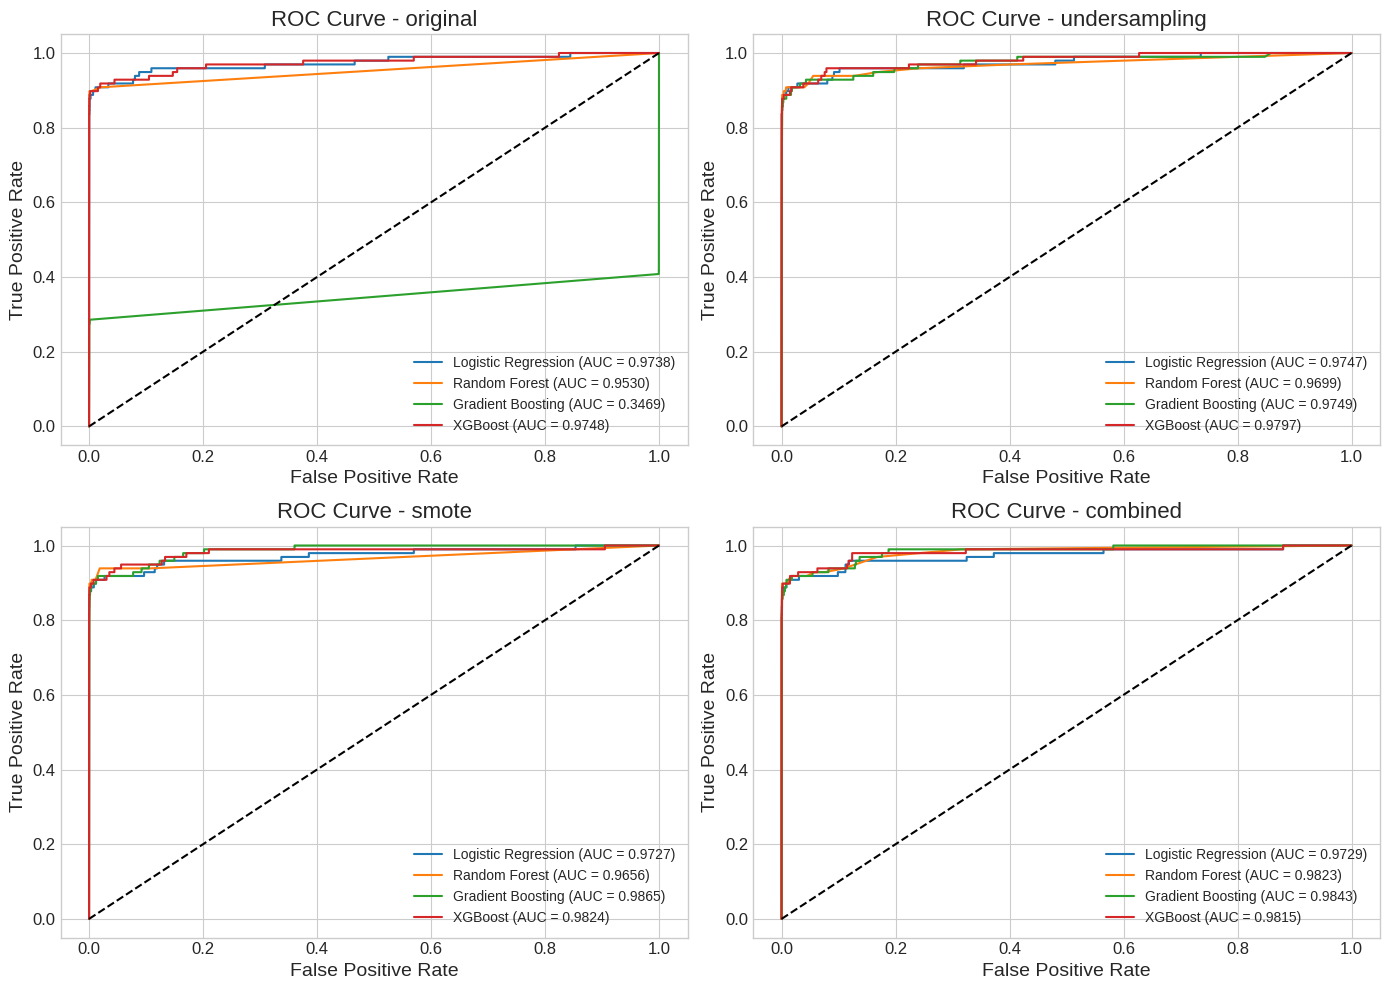

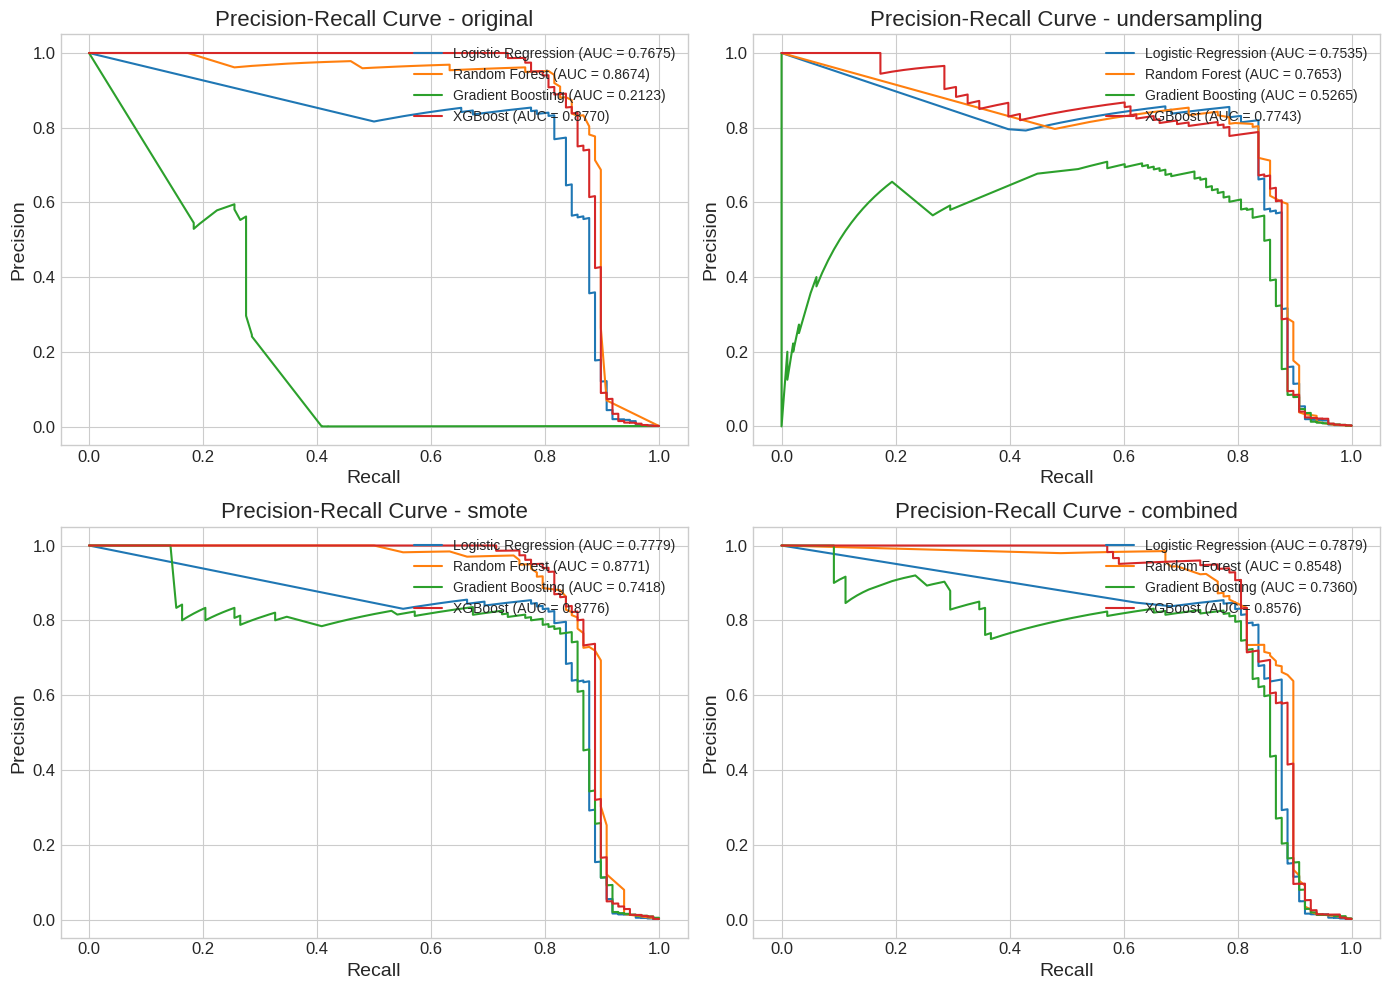

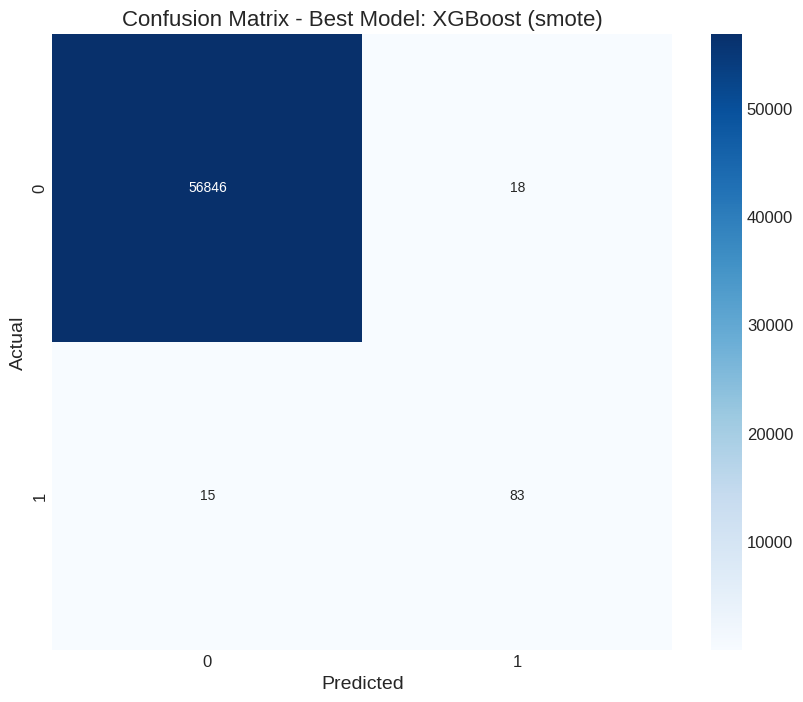

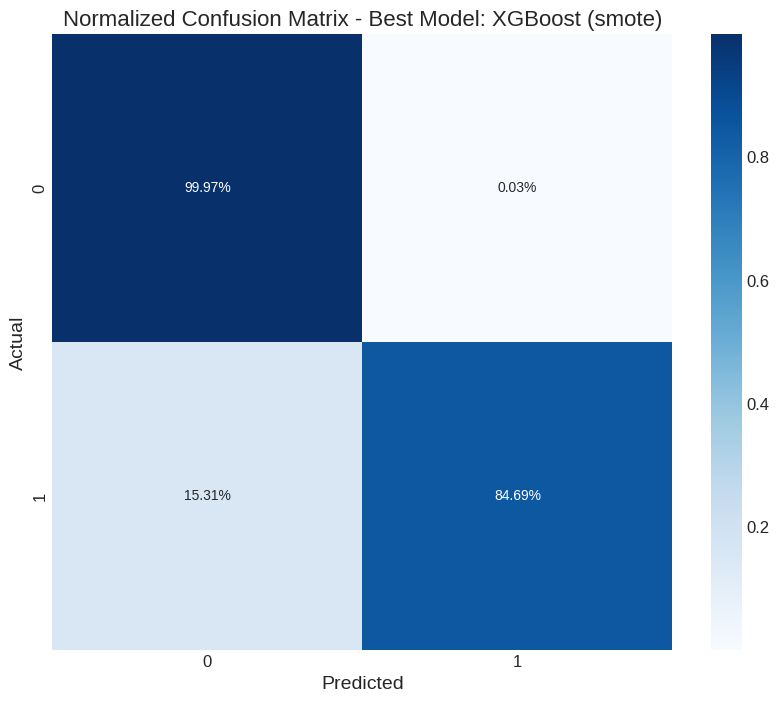

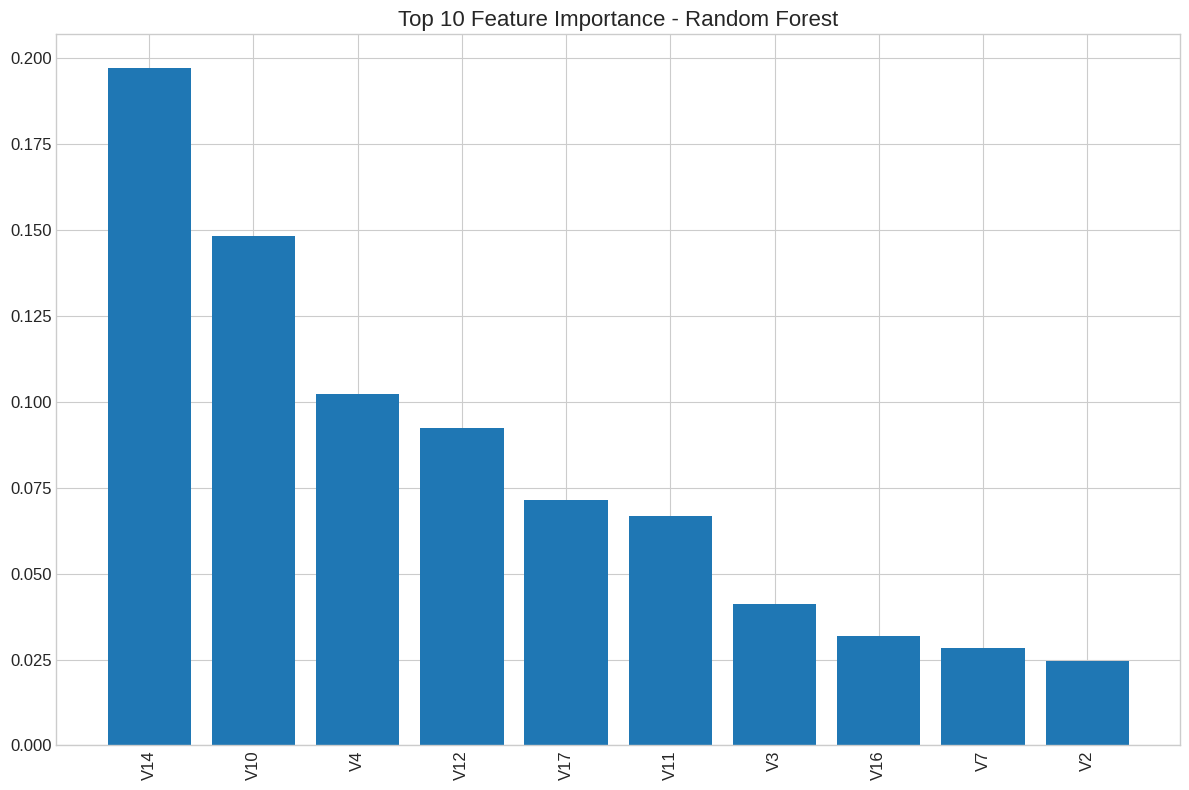


7. CH·ªåN M√î H√åNH T·ªêT NH·∫§T
--------------------------------------------------
M√¥ h√¨nh t·ªët nh·∫•t: XGBoost v·ªõi ph∆∞∆°ng ph√°p smote
ROC-AUC: 0.9824
PR-AUC: 0.8776

8. T·ªêI ∆ØU H√ìA M√î H√åNH T·ªêT NH·∫§T
--------------------------------------------------
ƒêang th·ª±c hi·ªán t√¨m ki·∫øm l∆∞·ªõi (Grid Search)...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tham s·ªë t·ªët nh·∫•t: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
ƒêi·ªÉm PR-AUC t·ªët nh·∫•t trong Cross-validation: 0.9998

ƒê√°nh gi√° m√¥ h√¨nh t·ªëi ∆∞u tr√™n t·∫≠p ki·ªÉm th·ª≠:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.88      0.87        98

    accuracy                           1.00     56962
   macro avg       0.93      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9833
PR-AUC: 0.8869


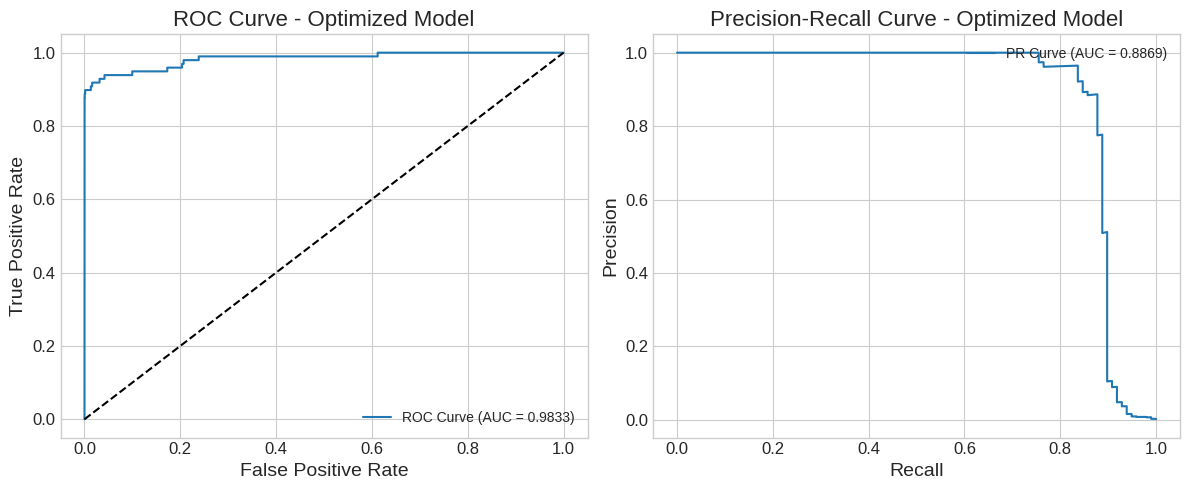

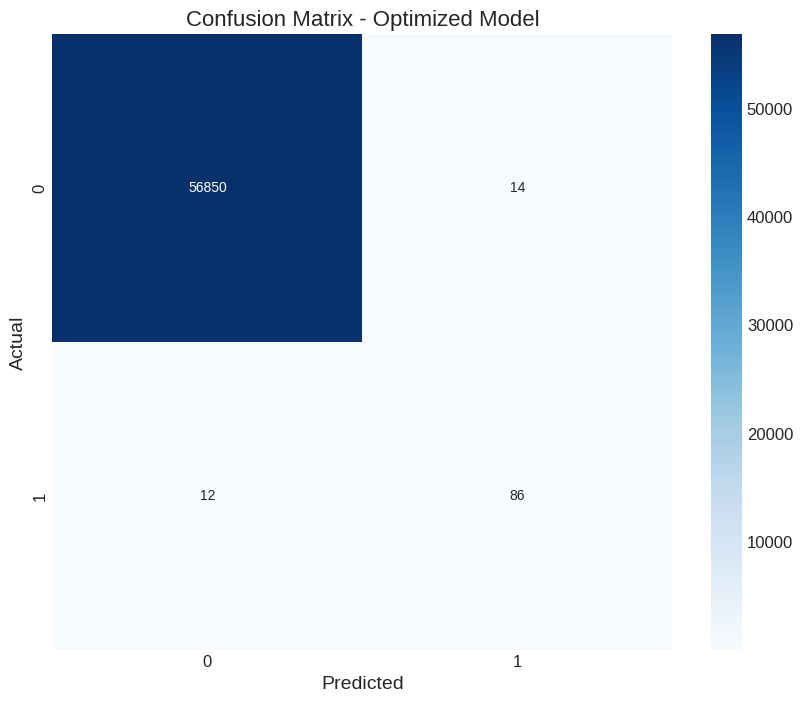


9. T√åM NG∆Ø·ª†NG T·ªêI ∆ØU CHO M√î H√åNH
--------------------------------------------------
Ng∆∞·ª°ng t·ªëi ∆∞u: 0.9149
F1-score t·ªëi ∆∞u: 0.8962
Precision t·∫°i ng∆∞·ª°ng t·ªëi ∆∞u: 0.9647
Recall t·∫°i ng∆∞·ª°ng t·ªëi ∆∞u: 0.8367


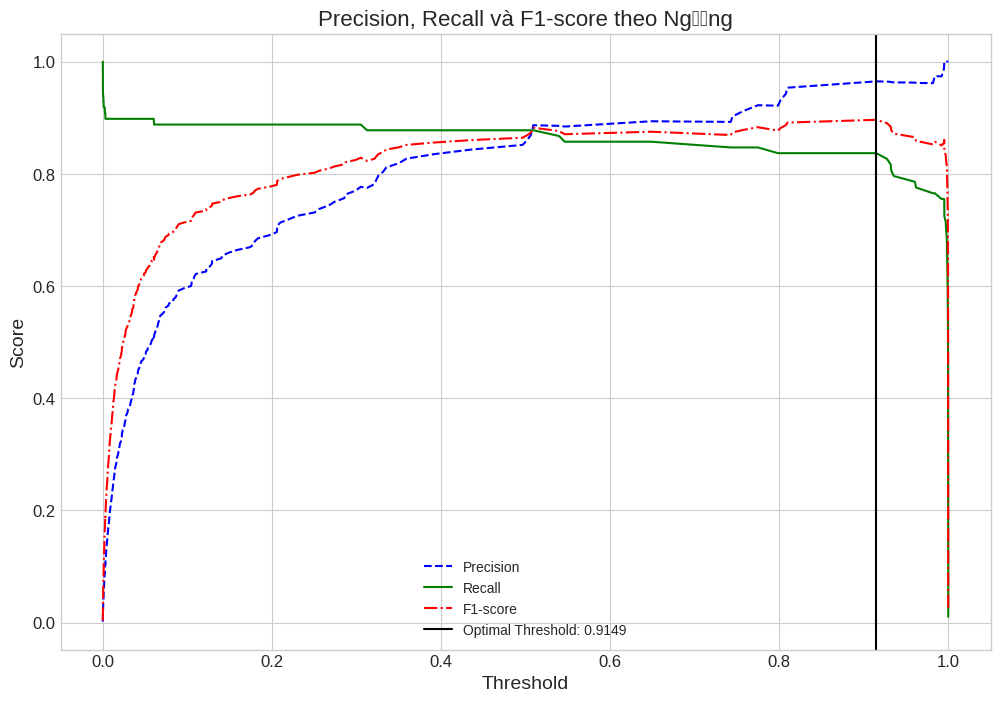


ƒê√°nh gi√° m√¥ h√¨nh v·ªõi ng∆∞·ª°ng t·ªëi ∆∞u:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.84      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



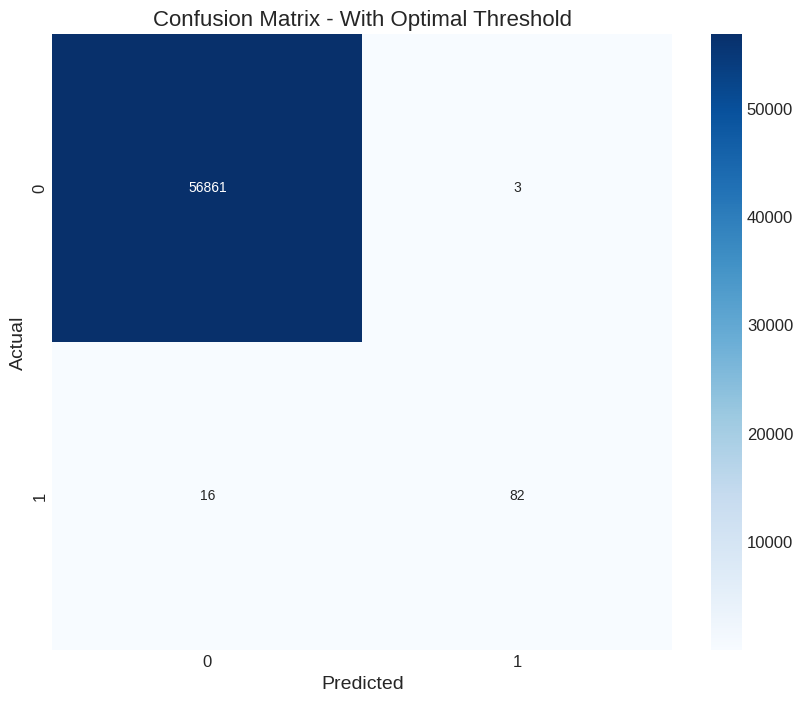


-------------- K·∫æT LU·∫¨N --------------
Quy tr√¨nh ph√°t hi·ªán gian l·∫≠n th·∫ª t√≠n d·ª•ng ƒë√£ ho√†n th√†nh!
M√¥ h√¨nh t·ªët nh·∫•t: XGBClassifier
Ng∆∞·ª°ng t·ªëi ∆∞u: 0.9149

V√≠ d·ª• v·ªÅ c√°ch s·ª≠ d·ª•ng m√¥ h√¨nh ƒë·ªÉ d·ª± ƒëo√°n giao d·ªãch m·ªõi:
transaction_data = {c√°c ƒë·∫∑c tr∆∞ng c·ªßa giao d·ªãch m·ªõi}
prediction, probability = predict_transaction(best_model_optimized, optimal_threshold, transaction_data)
print(f'D·ª± ƒëo√°n: {'Gian l·∫≠n' if prediction == 1 else 'B√¨nh th∆∞·ªùng'}, X√°c su·∫•t gian l·∫≠n: {probability:.4f}')


In [ ]:
# Credit Card Fraud Detection
# To√†n b·ªô quy tr√¨nh x·ª≠ l√Ω b√†i to√°n ph√°t hi·ªán gian l·∫≠n th·∫ª t√≠n d·ª•ng
# v·ªõi d·ªØ li·ªáu m·∫•t c√¢n b·∫±ng nghi√™m tr·ªçng (0.17% gian l·∫≠n)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Thi·∫øt l·∫≠p ki·ªÉu v·∫Ω cho ƒë·ªì th·ªã
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 1. ƒê·ªçc v√† kh√°m ph√° d·ªØ li·ªáu
def load_and_explore_data(file_path):
    """
    ƒê·ªçc d·ªØ li·ªáu v√† th·ª±c hi·ªán kh√°m ph√° d·ªØ li·ªáu ban ƒë·∫ßu
    """
    print("1. ƒê·ªåC V√Ä KH√ÅM PH√Å D·ªÆ LI·ªÜU BAN ƒê·∫¶U")
    print("-" * 50)

    # ƒê·ªçc d·ªØ li·ªáu
    df = pd.read_csv(file_path)
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu: {df.shape}")

    # Xem th√¥ng tin d·ªØ li·ªáu
    print("\nTh√¥ng tin d·ªØ li·ªáu:")
    print(df.info())

    # Ki·ªÉm tra gi√° tr·ªã thi·∫øu
    print("\nKi·ªÉm tra gi√° tr·ªã thi·∫øu:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu")

    # Th·ªëng k√™ m√¥ t·∫£
    print("\nTh·ªëng k√™ m√¥ t·∫£:")
    print(df.describe())

    # Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa bi·∫øn m·ª•c ti√™u
    print("\nPh√¢n ph·ªëi c·ªßa bi·∫øn m·ª•c ti√™u (Fraud vs Non-Fraud):")
    fraud_count = df['Class'].value_counts()
    print(fraud_count)
    fraud_percentage = fraud_count / len(df) * 100
    print(f"T·ª∑ l·ªá Non-Fraud: {fraud_percentage[0]:.4f}%")
    print(f"T·ª∑ l·ªá Fraud: {fraud_percentage[1]:.4f}%")

    return df

# 2. Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a d·ªØ li·ªáu
def analyze_and_visualize_data(df):
    """
    Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a d·ªØ li·ªáu
    """
    print("\n2. PH√ÇN T√çCH V√Ä TR·ª∞C QUAN H√ìA D·ªÆ LI·ªÜU")
    print("-" * 50)

    # Ph√¢n ph·ªëi bi·∫øn m·ª•c ti√™u
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Class', data=df)
    plt.title('Ph√¢n ph·ªëi bi·∫øn m·ª•c ti√™u (0: Non-Fraud, 1: Fraud)')
    plt.xlabel('Class')
    plt.ylabel('S·ªë l∆∞·ª£ng')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
    plt.show()

    # Hi·ªÉn th·ªã ph√¢n ph·ªëi bi·∫øn m·ª•c ti√™u t·ªët h∆°n v·ªõi hai bi·ªÉu ƒë·ªì
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(x='Class', data=df)
    plt.title('Ph√¢n ph·ªëi kh√¥ng c√¢n b·∫±ng')
    plt.xlabel('Class')
    plt.ylabel('S·ªë l∆∞·ª£ng')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

    plt.subplot(1, 2, 2)
    sns.countplot(x='Class', data=df)
    plt.title('Ph√¢n ph·ªëi (Log Scale)')
    plt.xlabel('Class')
    plt.ylabel('S·ªë l∆∞·ª£ng (Log Scale)')
    plt.yscale('log')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

    plt.tight_layout()
    plt.show()

    # Ph√¢n t√≠ch bi·∫øn Amount
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df['Amount'], bins=50, kde=True)
    plt.title('Ph√¢n ph·ªëi bi·∫øn Amount')
    plt.xlabel('Amount')
    plt.ylabel('T·∫ßn su·∫•t')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Class', y='Amount', data=df)
    plt.title('Amount theo Class (0: Non-Fraud, 1: Fraud)')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

    plt.tight_layout()
    plt.show()

    # Ph√¢n t√≠ch bi·∫øn Time
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    # Chuy·ªÉn ƒë·ªïi Time t·ª´ gi√¢y th√†nh gi·ªù (% 24 ƒë·ªÉ l·∫•y theo ng√†y)
    df['Hour'] = df['Time'] / 3600 % 24
    sns.histplot(df['Hour'], bins=24, kde=True)
    plt.title('Ph√¢n ph·ªëi giao d·ªãch theo gi·ªù trong ng√†y')
    plt.xlabel('Gi·ªù trong ng√†y')
    plt.ylabel('T·∫ßn su·∫•t')

    plt.subplot(1, 2, 2)
    fraud_df = df[df['Class'] == 1]
    sns.histplot(fraud_df['Hour'], bins=24, kde=True, color='red')
    plt.title('Ph√¢n ph·ªëi giao d·ªãch gian l·∫≠n theo gi·ªù trong ng√†y')
    plt.xlabel('Gi·ªù trong ng√†y')
    plt.ylabel('T·∫ßn su·∫•t')

    plt.tight_layout()
    plt.show()

    # Ph√¢n t√≠ch c√°c ƒë·∫∑c tr∆∞ng PCA
    # Hi·ªÉn th·ªã ph√¢n ph·ªëi c·ªßa m·ªôt s·ªë ƒë·∫∑c tr∆∞ng PCA quan tr·ªçng
    plt.figure(figsize=(20, 12))

    # Ch·ªçn 6 ƒë·∫∑c tr∆∞ng PCA ƒë·∫ßu ti√™n ƒë·ªÉ ph√¢n t√≠ch
    for i, feature in enumerate(['V1', 'V2', 'V3', 'V4', 'V5', 'V6']):
        plt.subplot(2, 3, i+1)
        sns.histplot(df[df['Class']==0][feature], bins=50, color='blue', alpha=0.5, label='Non-Fraud')
        sns.histplot(df[df['Class']==1][feature], bins=50, color='red', alpha=0.5, label='Fraud')
        plt.title(f'Ph√¢n ph·ªëi {feature} theo Class')
        plt.xlabel(feature)
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Ph√¢n t√≠ch t∆∞∆°ng quan
    plt.figure(figsize=(16, 12))

    # T√≠nh ma tr·∫≠n t∆∞∆°ng quan
    correlation_matrix = df.corr()

    # Hi·ªÉn th·ªã heatmap t∆∞∆°ng quan
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title('Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Hi·ªÉn th·ªã m·ª©c ƒë·ªô t∆∞∆°ng quan v·ªõi bi·∫øn m·ª•c ti√™u (Class)
    plt.figure(figsize=(14, 8))
    correlation_with_target = correlation_matrix['Class'].sort_values(ascending=False)
    sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
    plt.title('M·ª©c ƒë·ªô t∆∞∆°ng quan v·ªõi bi·∫øn m·ª•c ti√™u (Class)')
    plt.xlabel('Bi·∫øn')
    plt.ylabel('H·ªá s·ªë t∆∞∆°ng quan')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Ph√¢n t√≠ch ph√¢n c·ª•m 2D (s·ª≠ d·ª•ng hai ƒë·∫∑c tr∆∞ng PCA c√≥ t∆∞∆°ng quan cao nh·∫•t v·ªõi Class)
    plt.figure(figsize=(12, 10))

    # L·∫•y hai ƒë·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan cao nh·∫•t (theo gi√° tr·ªã tuy·ªát ƒë·ªëi)
    abs_corr = correlation_with_target.drop('Class').abs().sort_values(ascending=False)
    top_features = abs_corr.index[:2].tolist()

    sns.scatterplot(x=top_features[0], y=top_features[1],
                    hue='Class', data=df, alpha=0.5, s=20)
    plt.title(f'Ph√¢n c·ª•m giao d·ªãch d·ª±a tr√™n {top_features[0]} v√† {top_features[1]}')
    plt.tight_layout()
    plt.show()

    return df

# 3. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
def preprocess_data(df):
    """
    Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu tr∆∞·ªõc khi hu·∫•n luy·ªán m√¥ h√¨nh
    """
    print("\n3. TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU")
    print("-" * 50)

    # T√°ch bi·∫øn ƒë·∫∑c tr∆∞ng v√† bi·∫øn m·ª•c ti√™u
    X = df.drop('Class', axis=1)
    y = df['Class']

    # T√°ch d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm th·ª≠
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"K√≠ch th∆∞·ªõc t·∫≠p hu·∫•n luy·ªán: {X_train.shape}, K√≠ch th∆∞·ªõc t·∫≠p ki·ªÉm th·ª≠: {X_test.shape}")

    # Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa y trong c√°c t·∫≠p
    print("Ph√¢n ph·ªëi c·ªßa y trong t·∫≠p hu·∫•n luy·ªán:", Counter(y_train))
    print("Ph√¢n ph·ªëi c·ªßa y trong t·∫≠p ki·ªÉm th·ª≠:", Counter(y_test))

    # Chu·∫©n h√≥a d·ªØ li·ªáu
    # ƒê·ªëi v·ªõi Amount v√† Time, s·ª≠ d·ª•ng RobustScaler ƒë·ªÉ x·ª≠ l√Ω ngo·∫°i lai
    robust_scaler = RobustScaler()
    X_train['Amount'] = robust_scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
    X_test['Amount'] = robust_scaler.transform(X_test['Amount'].values.reshape(-1, 1))

    X_train['Time'] = robust_scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))
    X_test['Time'] = robust_scaler.transform(X_test['Time'].values.reshape(-1, 1))

    # C√°c ƒë·∫∑c tr∆∞ng PCA ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a t·ª´ tr∆∞·ªõc

    print("\nKi·ªÉm tra s·ª± kh√°c bi·ªát tr∆∞·ªõc v√† sau khi chu·∫©n h√≥a:")
    print("Amount tr∆∞·ªõc chu·∫©n h√≥a:", df['Amount'].describe())
    print("Amount sau chu·∫©n h√≥a:", X_train['Amount'].describe())

    return X_train, X_test, y_train, y_test

# 4. X·ª≠ l√Ω m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu
def handle_imbalanced_data(X_train, y_train):
    """
    X·ª≠ l√Ω v·∫•n ƒë·ªÅ m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu b·∫±ng c√°c ph∆∞∆°ng ph√°p kh√°c nhau
    """
    print("\n4. X·ª¨ L√ù M·∫§T C√ÇN B·∫∞NG D·ªÆ LI·ªÜU")
    print("-" * 50)

    # In ra ph√¢n ph·ªëi ban ƒë·∫ßu
    print("Ph√¢n ph·ªëi ban ƒë·∫ßu:", Counter(y_train))

    # 1. Random Under-sampling
    rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)  # Gi·∫£m s·ªë l∆∞·ª£ng m·∫´u non-fraud
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
    print("Ph√¢n ph·ªëi sau Random Under-sampling:", Counter(y_train_rus))

    # 2. SMOTE (Synthetic Minority Over-sampling Technique)
    smote = SMOTE(sampling_strategy=0.1, random_state=42)  # TƒÉng s·ªë l∆∞·ª£ng m·∫´u fraud
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    print("Ph√¢n ph·ªëi sau SMOTE:", Counter(y_train_smote))

    # 3. K·∫øt h·ª£p Under-sampling v·ªõi SMOTE
    rus_smote = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
    X_train_rus_smote, y_train_rus_smote = rus_smote.fit_resample(X_train_smote, y_train_smote)
    print("Ph√¢n ph·ªëi sau Under-sampling k·∫øt h·ª£p SMOTE:", Counter(y_train_rus_smote))

    return {
        'original': (X_train, y_train),
        'undersampling': (X_train_rus, y_train_rus),
        'smote': (X_train_smote, y_train_smote),
        'combined': (X_train_rus_smote, y_train_rus_smote)
    }

# 5. Hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh
def train_and_evaluate_models(resampled_data, X_test, y_test):
    """
    Hu·∫•n luy·ªán v√† ƒë√°nh gi√° c√°c m√¥ h√¨nh kh√°c nhau
    """
    print("\n5. HU·∫§N LUY·ªÜN V√Ä ƒê√ÅNH GI√Å M√î H√åNH")
    print("-" * 50)

    # Danh s√°ch c√°c m√¥ h√¨nh s·∫Ω s·ª≠ d·ª•ng
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

    # Danh s√°ch c√°c ph∆∞∆°ng ph√°p x·ª≠ l√Ω m·∫•t c√¢n b·∫±ng
    resampling_methods = ['original', 'undersampling', 'smote', 'combined']

    # L∆∞u tr·ªØ k·∫øt qu·∫£
    results = {}

    # Hu·∫•n luy·ªán v√† ƒë√°nh gi√° t·ª´ng m√¥ h√¨nh v·ªõi t·ª´ng ph∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu
    for method in resampling_methods:
        print(f"\nPh∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu: {method}")
        X_train_resampled, y_train_resampled = resampled_data[method]

        for model_name, model in models.items():
            print(f"\nM√¥ h√¨nh: {model_name}")

            # Hu·∫•n luy·ªán m√¥ h√¨nh
            model.fit(X_train_resampled, y_train_resampled)

            # D·ª± ƒëo√°n
            y_pred = model.predict(X_test)

            # ƒê√°nh gi√° m√¥ h√¨nh
            print(f"Classification Report cho {model_name} v·ªõi ph∆∞∆°ng ph√°p {method}:")
            print(classification_report(y_test, y_pred))

            # T√≠nh to√°n ƒëi·ªÉm s·ªë cho ROC-AUC v√† PR-AUC
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]

                # ROC-AUC
                fpr, tpr, _ = roc_curve(y_test, y_prob)
                roc_auc = auc(fpr, tpr)

                # PR-AUC
                precision, recall, _ = precision_recall_curve(y_test, y_prob)
                pr_auc = auc(recall, precision)

                print(f"ROC-AUC: {roc_auc:.4f}")
                print(f"PR-AUC: {pr_auc:.4f}")

                # L∆∞u k·∫øt qu·∫£
                if method not in results:
                    results[method] = {}
                results[method][model_name] = {
                    'model': model,
                    'y_pred': y_pred,
                    'y_prob': y_prob,
                    'roc_auc': roc_auc,
                    'pr_auc': pr_auc
                }

    return results

# 6. Tr·ª±c quan h√≥a k·∫øt qu·∫£ m√¥ h√¨nh
def visualize_model_results(results, X_test, y_test):
    """
    Tr·ª±c quan h√≥a k·∫øt qu·∫£ c·ªßa c√°c m√¥ h√¨nh
    """
    print("\n6. TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢ M√î H√åNH")
    print("-" * 50)

    # V·∫Ω ƒë∆∞·ªùng cong ROC cho m·ªói ph∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu
    plt.figure(figsize=(14, 10))

    for i, method in enumerate(results.keys()):
        plt.subplot(2, 2, i+1)

        for model_name, result in results[method].items():
            y_prob = result['y_prob']
            roc_auc = result['roc_auc']

            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {method}')
        plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    # V·∫Ω ƒë∆∞·ªùng cong Precision-Recall cho m·ªói ph∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu
    plt.figure(figsize=(14, 10))

    for i, method in enumerate(results.keys()):
        plt.subplot(2, 2, i+1)

        for model_name, result in results[method].items():
            y_prob = result['y_prob']
            pr_auc = result['pr_auc']

            precision, recall, _ = precision_recall_curve(y_test, y_prob)
            plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.4f})')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {method}')
        plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # V·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n cho m√¥ h√¨nh t·ªët nh·∫•t
    best_method = max(results.keys(), key=lambda method:
                      max(results[method].values(), key=lambda x: x['pr_auc'])['pr_auc'])
    best_model_name = max(results[best_method].keys(), key=lambda model:
                         results[best_method][model]['pr_auc'])
    best_result = results[best_method][best_model_name]

    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, best_result['y_pred'])

    # T√≠nh to√°n t·ª∑ l·ªá ƒë·ªÉ hi·ªÉn th·ªã
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Best Model: {best_model_name} ({best_method})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Hi·ªÉn th·ªã ma tr·∫≠n nh·∫ßm l·∫´n c√≥ t·ª∑ l·ªá ph·∫ßn trƒÉm
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
    plt.title(f'Normalized Confusion Matrix - Best Model: {best_model_name} ({best_method})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Hi·ªÉn th·ªã t·∫ßm quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng cho Random Forest ho·∫∑c XGBoost
    if 'Random Forest' in results[best_method]:
        model_for_features = results[best_method]['Random Forest']['model']
        model_name_for_features = 'Random Forest'
    elif 'XGBoost' in results[best_method]:
        model_for_features = results[best_method]['XGBoost']['model']
        model_name_for_features = 'XGBoost'
    else:
        return

    plt.figure(figsize=(12, 8))

    # L·∫•y t·∫ßm quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng
    feature_importances = model_for_features.feature_importances_
    feature_names = X_test.columns

    # S·∫Øp x·∫øp theo t·∫ßm quan tr·ªçng gi·∫£m d·∫ßn
    indices = np.argsort(feature_importances)[::-1]

    # V·∫Ω top 10 ƒë·∫∑c tr∆∞ng quan tr·ªçng nh·∫•t
    plt.title(f'Top 10 Feature Importance - {model_name_for_features}')
    plt.bar(range(min(10, len(feature_names))),
            feature_importances[indices[:10]],
            align='center')
    plt.xticks(range(min(10, len(feature_names))),
               [feature_names[i] for i in indices[:10]],
               rotation=90)
    plt.tight_layout()
    plt.show()

# 7. Ch·ªçn m√¥ h√¨nh t·ªët nh·∫•t
def select_best_model(results):
    """
    Ch·ªçn m√¥ h√¨nh t·ªët nh·∫•t d·ª±a tr√™n PR-AUC
    """
    print("\n7. CH·ªåN M√î H√åNH T·ªêT NH·∫§T")
    print("-" * 50)

    best_method = None
    best_model_name = None
    best_roc_auc = 0
    best_pr_auc = 0

    for method, models in results.items():
        for model_name, result in models.items():
            if result['pr_auc'] > best_pr_auc:
                best_pr_auc = result['pr_auc']
                best_roc_auc = result['roc_auc']
                best_method = method
                best_model_name = model_name

    print(f"M√¥ h√¨nh t·ªët nh·∫•t: {best_model_name} v·ªõi ph∆∞∆°ng ph√°p {best_method}")
    print(f"ROC-AUC: {best_roc_auc:.4f}")
    print(f"PR-AUC: {best_pr_auc:.4f}")

    return results[best_method][best_model_name]['model']

# 8. T·ªëi ∆∞u h√≥a m√¥ h√¨nh t·ªët nh·∫•t
def optimize_best_model(best_model, X_train, y_train, X_test, y_test):
    """
    T·ªëi ∆∞u h√≥a m√¥ h√¨nh t·ªët nh·∫•t b·∫±ng GridSearchCV
    """
    print("\n8. T·ªêI ∆ØU H√ìA M√î H√åNH T·ªêT NH·∫§T")
    print("-" * 50)

    # ƒê·ªãnh nghƒ©a c√°c tham s·ªë cho t√¨m ki·∫øm l∆∞·ªõi
    if isinstance(best_model, RandomForestClassifier):
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    elif isinstance(best_model, XGBClassifier):
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    elif isinstance(best_model, LogisticRegression):
        param_grid = {
            'C': [0.01, 0.1, 1.0, 10.0],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    elif isinstance(best_model, GradientBoostingClassifier):
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.8, 1.0]
        }
    else:
        print("Kh√¥ng th·ªÉ t·ªëi ∆∞u h√≥a m√¥ h√¨nh n√†y.")
        return best_model

    # Thi·∫øt l·∫≠p GridSearchCV v·ªõi StratifiedKFold ƒë·ªÉ gi·ªØ nguy√™n t·ª∑ l·ªá ph√¢n ph·ªëi c·ªßa c√°c l·ªõp
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=best_model,
        param_grid=param_grid,
        scoring='average_precision',  # S·ª≠ d·ª•ng PR-AUC l√†m metric
        cv=skf,
        n_jobs=-1,
        verbose=1
    )

    # Hu·∫•n luy·ªán grid search
    print("ƒêang th·ª±c hi·ªán t√¨m ki·∫øm l∆∞·ªõi (Grid Search)...")
    grid_search.fit(X_train, y_train)

    print(f"Tham s·ªë t·ªët nh·∫•t: {grid_search.best_params_}")
    print(f"ƒêi·ªÉm PR-AUC t·ªët nh·∫•t trong Cross-validation: {grid_search.best_score_:.4f}")

    # ƒê√°nh gi√° m√¥ h√¨nh t·ªëi ∆∞u tr√™n t·∫≠p ki·ªÉm th·ª≠
    best_model_optimized = grid_search.best_estimator_
    y_pred = best_model_optimized.predict(X_test)

    # ƒê√°nh gi√°
    print("\nƒê√°nh gi√° m√¥ h√¨nh t·ªëi ∆∞u tr√™n t·∫≠p ki·ªÉm th·ª≠:")
    print(classification_report(y_test, y_pred))

    # T√≠nh ROC-AUC v√† PR-AUC
    y_prob = best_model_optimized.predict_proba(X_test)[:, 1]

    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # PR-AUC
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")

    # V·∫Ω ƒë∆∞·ªùng cong ROC v√† PR
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Optimized Model')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Optimized Model')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # V·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Optimized Model')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return best_model_optimized

# 9. Thi·∫øt l·∫≠p ng∆∞·ª°ng t·ªëi ∆∞u cho m√¥ h√¨nh
def find_optimal_threshold(best_model, X_test, y_test):
    """
    T√¨m ng∆∞·ª°ng t·ªëi ∆∞u cho m√¥ h√¨nh ƒë·ªÉ c√¢n b·∫±ng gi·ªØa precision v√† recall
    """
    print("\n9. T√åM NG∆Ø·ª†NG T·ªêI ∆ØU CHO M√î H√åNH")
    print("-" * 50)

    # L·∫•y x√°c su·∫•t d·ª± ƒëo√°n
    y_probs = best_model.predict_proba(X_test)[:, 1]

    # T√≠nh precision v√† recall cho c√°c ng∆∞·ª°ng kh√°c nhau
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

    # T√≠nh F1-score cho m·ªói ng∆∞·ª°ng
    f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

    # T√¨m ng∆∞·ª°ng c√≥ F1-score cao nh·∫•t
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"Ng∆∞·ª°ng t·ªëi ∆∞u: {optimal_threshold:.4f}")
    print(f"F1-score t·ªëi ∆∞u: {f1_scores[optimal_idx]:.4f}")
    print(f"Precision t·∫°i ng∆∞·ª°ng t·ªëi ∆∞u: {precisions[optimal_idx]:.4f}")
    print(f"Recall t·∫°i ng∆∞·ª°ng t·ªëi ∆∞u: {recalls[optimal_idx]:.4f}")

    # V·∫Ω ƒë·ªì th·ªã precision, recall v√† F1-score theo ng∆∞·ª°ng
    plt.figure(figsize=(12, 8))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.plot(thresholds, f1_scores, 'r-.', label='F1-score')
    plt.axvline(x=optimal_threshold, color='k', linestyle='-', label=f'Optimal Threshold: {optimal_threshold:.4f}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision, Recall v√† F1-score theo Ng∆∞·ª°ng')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ƒê√°nh gi√° m√¥ h√¨nh v·ªõi ng∆∞·ª°ng t·ªëi ∆∞u
    print("\nƒê√°nh gi√° m√¥ h√¨nh v·ªõi ng∆∞·ª°ng t·ªëi ∆∞u:")
    y_pred_optimal = (y_probs >= optimal_threshold).astype(int)
    print(classification_report(y_test, y_pred_optimal))

    # V·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n v·ªõi ng∆∞·ª°ng t·ªëi ∆∞u
    plt.figure(figsize=(10, 8))
    cm_optimal = confusion_matrix(y_test, y_pred_optimal)
    sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - With Optimal Threshold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return optimal_threshold

# 10. Ch·ª©c nƒÉng d·ª± ƒëo√°n giao d·ªãch m·ªõi
def predict_transaction(model, optimal_threshold, transaction_data, scaler=None):
    """
    D·ª± ƒëo√°n xem m·ªôt giao d·ªãch m·ªõi c√≥ ph·∫£i l√† gian l·∫≠n hay kh√¥ng

    Parameters:
    -----------
    model : m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
    optimal_threshold : ng∆∞·ª°ng t·ªëi ∆∞u cho m√¥ h√¨nh
    transaction_data : dict, d·ªØ li·ªáu c·ªßa giao d·ªãch m·ªõi
    scaler : scaler ƒë√£ ƒë∆∞·ª£c fit tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán, n·∫øu c√≥

    Returns:
    --------
    prediction : 0 ho·∫∑c 1, d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh
    probability : x√°c su·∫•t gian l·∫≠n
    """
    # Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu giao d·ªãch th√†nh DataFrame
    transaction_df = pd.DataFrame([transaction_data])

    # Chu·∫©n h√≥a d·ªØ li·ªáu n·∫øu c√≥ scaler
    if scaler and 'Amount' in transaction_df.columns:
        transaction_df['Amount'] = scaler.transform(transaction_df['Amount'].values.reshape(-1, 1))
    if scaler and 'Time' in transaction_df.columns:
        transaction_df['Time'] = scaler.transform(transaction_df['Time'].values.reshape(-1, 1))

    # D·ª± ƒëo√°n x√°c su·∫•t
    fraud_probability = model.predict_proba(transaction_df)[0, 1]

    # D·ª± ƒëo√°n nh√£n d·ª±a tr√™n ng∆∞·ª°ng t·ªëi ∆∞u
    prediction = 1 if fraud_probability >= optimal_threshold else 0

    return prediction, fraud_probability

# 11. H√†m ch√≠nh ƒë·ªÉ ch·∫°y to√†n b·ªô quy tr√¨nh
def main(file_path):
    """
    Ch·∫°y to√†n b·ªô quy tr√¨nh x·ª≠ l√Ω b√†i to√°n ph√°t hi·ªán gian l·∫≠n th·∫ª t√≠n d·ª•ng
    """
    # B∆∞·ªõc 1: ƒê·ªçc v√† kh√°m ph√° d·ªØ li·ªáu
    df = load_and_explore_data(file_path)

    # B∆∞·ªõc 2: Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a d·ªØ li·ªáu
    df = analyze_and_visualize_data(df)

    # B∆∞·ªõc 3: Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
    X_train, X_test, y_train, y_test = preprocess_data(df)

    # B∆∞·ªõc 4: X·ª≠ l√Ω m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu
    resampled_data = handle_imbalanced_data(X_train, y_train)

    # B∆∞·ªõc 5: Hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh
    results = train_and_evaluate_models(resampled_data, X_test, y_test)

    # B∆∞·ªõc 6: Tr·ª±c quan h√≥a k·∫øt qu·∫£ m√¥ h√¨nh
    visualize_model_results(results, X_test, y_test)

    # B∆∞·ªõc 7: Ch·ªçn m√¥ h√¨nh t·ªët nh·∫•t
    best_model = select_best_model(results)

    # B∆∞·ªõc 8: T·ªëi ∆∞u h√≥a m√¥ h√¨nh t·ªët nh·∫•t
    # Ch·ªçn d·ªØ li·ªáu hu·∫•n luy·ªán ph√π h·ª£p v·ªõi m√¥ h√¨nh t·ªët nh·∫•t
    # Gi·∫£ s·ª≠ d·ªØ li·ªáu SMOTE l√† t·ªët nh·∫•t cho m√¥ h√¨nh
    X_train_best, y_train_best = resampled_data['smote']
    best_model_optimized = optimize_best_model(best_model, X_train_best, y_train_best, X_test, y_test)

    # B∆∞·ªõc 9: Thi·∫øt l·∫≠p ng∆∞·ª°ng t·ªëi ∆∞u cho m√¥ h√¨nh
    optimal_threshold = find_optimal_threshold(best_model_optimized, X_test, y_test)

    print("\n-------------- K·∫æT LU·∫¨N --------------")
    print("Quy tr√¨nh ph√°t hi·ªán gian l·∫≠n th·∫ª t√≠n d·ª•ng ƒë√£ ho√†n th√†nh!")
    print(f"M√¥ h√¨nh t·ªët nh·∫•t: {type(best_model_optimized).__name__}")
    print(f"Ng∆∞·ª°ng t·ªëi ∆∞u: {optimal_threshold:.4f}")

    # V√≠ d·ª• v·ªÅ c√°ch s·ª≠ d·ª•ng m√¥ h√¨nh ƒë·ªÉ d·ª± ƒëo√°n giao d·ªãch m·ªõi
    print("\nV√≠ d·ª• v·ªÅ c√°ch s·ª≠ d·ª•ng m√¥ h√¨nh ƒë·ªÉ d·ª± ƒëo√°n giao d·ªãch m·ªõi:")
    print("transaction_data = {c√°c ƒë·∫∑c tr∆∞ng c·ªßa giao d·ªãch m·ªõi}")
    print("prediction, probability = predict_transaction(best_model_optimized, optimal_threshold, transaction_data)")
    print("print(f'D·ª± ƒëo√°n: {'Gian l·∫≠n' if prediction == 1 else 'B√¨nh th∆∞·ªùng'}, X√°c su·∫•t gian l·∫≠n: {probability:.4f}')")

    return best_model_optimized, optimal_threshold

if __name__ == "__main__":
    # ƒê∆∞·ªùng d·∫´n ƒë·∫øn t·∫≠p d·ªØ li·ªáu
    file_path = "creditcard.csv"

    # Ch·∫°y quy tr√¨nh
    main(file_path)

# H·ªçc v√† Th·ª±c h√†nh

##‚úÖ1. ƒê·ªçc v√† Kh√°m ph√° d·ªØ li·ªáu ban ƒë·∫ßu
    1.1 T·∫£i d·ªØ li·ªáu
    1.2 Ki·ªÉm tra th√¥ng tin d·ªØ li·ªáu: df.info()
    1.3 Ki·ªÉm tra gi√° tr·ªã thi·∫øu Missing Value: df.isnull(); df.isnull().sum()
    1.4 Th·ªëng k√™ m√¥ t·∫£: df.describe()
    1.5 Ki·ªÉm tra ph√¢n ph·ªëi nh√£n: df.value_counts()
    1.6 return df


### a. Code m·∫´u

In [ ]:
# 1. ƒê·ªçc v√† kh√°m ph√° d·ªØ li·ªáu
def load_and_explore_data(file_path):
    """
    ƒê·ªçc d·ªØ li·ªáu v√† th·ª±c hi·ªán kh√°m ph√° d·ªØ li·ªáu ban ƒë·∫ßu
    """
    print("1. ƒê·ªåC V√Ä KH√ÅM PH√Å D·ªÆ LI·ªÜU BAN ƒê·∫¶U")
    print("-" * 50)

    # 1.1. ƒê·ªçc d·ªØ li·ªáu
    df = pd.read_csv(file_path)
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu: {df.shape}")

    # 1.2. Xem th√¥ng tin d·ªØ li·ªáu
    print("\nTh√¥ng tin d·ªØ li·ªáu:")
    print(df.info())

    # 1.3. Ki·ªÉm tra gi√° tr·ªã thi·∫øu
    print("\nKi·ªÉm tra gi√° tr·ªã thi·∫øu:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu")

    # 1.4. Th·ªëng k√™ m√¥ t·∫£
    print("\nTh·ªëng k√™ m√¥ t·∫£:")
    print(df.describe())

    # 1.5. Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa bi·∫øn m·ª•c ti√™u
    print("\nPh√¢n ph·ªëi c·ªßa bi·∫øn m·ª•c ti√™u (Fraud vs Non-Fraud):")
    fraud_count = df['Class'].value_counts()
    print(fraud_count)

    fraud_percentage = fraud_count / len(df) * 100
    print(f"T·ª∑ l·ªá Non-Fraud: {fraud_percentage[0]:.4f}%")
    print(f"T·ª∑ l·ªá Fraud: {fraud_percentage[1]:.4f}%")

    return df

###b. Th·ª±c h√†nh ƒê·ªçc v√† Kh√°m ph√° d·ªØ li·ªáu


In [ ]:
import pandas as pd

def read_and_explore_data(file_path):
    print("1. ƒê·ªçc v√† kh√°m ph√° d·ªØ li·ªáu")
    print("-"*50)

    #1.1 ƒê·ªçc d·ªØ li·ªáu
    df = pd.read_csv(file_path)
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu: {df.shape}")

    #1.2 Xem th√¥ng tin d·ªØ li·ªáu
    print("\n Th√¥ng tin d·ªØ li·ªáu:")
    print(df.info())

    #1.3 Ki·ªÉm tra gi√° tr·ªã thi·∫øu Missing Value
    print("\nKi·ªÉm tra gi√° tr·ªã thi·∫øu:")
    missing_values = df.isnull().sum()

    # conditional expression: To√°n t·ª≠ ba ng√¥i (ternary operator)
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Kh√¥ng c√≥ gi√° tr·ªã Missing Value")

    # 1.4 Th·ªëng k√™ m√¥ t·∫£
    print("\n Th·ªëng k√™ m√¥ t·∫£:")
    print(df.describe())

    # 1.5 Ki·ªÉm tra ph√¢n ph·ªëi nh√£n
    print("\n Ki·ªÉm tra ph√¢n ph·ªëi nh√£n (Fraud vs Non - Fraud):")
    fraud_count = df['Class'].value_counts()
    print(fraud_count)

    # Ki·ªÉm tra ph√¢n ph·ªëi nh√£n theo t·ªâ l·ªá
    print(f"Ph·∫ßn trƒÉm nh√£n Non - Fraud: {100*fraud_count[0]/len(df)} %")
    print(f"Ph·∫ßn trƒÉm nh√£n Fraud: {100*fraud_count[1]/len(df)} %")

    return df

file_path = '/content/drive/MyDrive/creditcard.csv'

df = read_and_explore_data(file_path)


1. ƒê·ªçc v√† kh√°m ph√° d·ªØ li·ªáu
--------------------------------------------------
K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (284807, 31)

 Th√¥ng tin d·ªØ li·ªáu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17    

##‚úÖ2. Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a
    2.1. Bi·∫øn m·ª•c ti√™u
    2.2  C·ªôt Amount
    2.3  C·ªôt Time
    2.4  C√°c ƒë·∫∑c tr∆∞ng PCA
    2.5  Ph√¢n t√≠ch v√† v·∫Ω bi·ªÉu ƒë·ªì T∆∞∆°ng quan


### a. Code m·∫´u

In [ ]:
# 2. Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a d·ªØ li·ªáu
def analyze_and_visualize_data(df):
    """
    Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a d·ªØ li·ªáu
    """
    print("\n2. PH√ÇN T√çCH V√Ä TR·ª∞C QUAN H√ìA D·ªÆ LI·ªÜU")
    print("-" * 50)

    # Ph√¢n ph·ªëi bi·∫øn m·ª•c ti√™u
    plt.figure(figsize=(10, 6))

    sns.countplot(x='Class', data=df)

    plt.title('Ph√¢n ph·ªëi bi·∫øn m·ª•c ti√™u (0: Non-Fraud, 1: Fraud)')
    plt.xlabel('Class')
    plt.ylabel('S·ªë l∆∞·ª£ng')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
    plt.show()

    # Hi·ªÉn th·ªã ph√¢n ph·ªëi bi·∫øn m·ª•c ti√™u t·ªët h∆°n v·ªõi hai bi·ªÉu ƒë·ªì
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(x='Class', data=df)
    plt.title('Ph√¢n ph·ªëi kh√¥ng c√¢n b·∫±ng')
    plt.xlabel('Class')
    plt.ylabel('S·ªë l∆∞·ª£ng')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

    plt.subplot(1, 2, 2)
    sns.countplot(x='Class', data=df)
    plt.title('Ph√¢n ph·ªëi (Log Scale)')
    plt.xlabel('Class')
    plt.ylabel('S·ªë l∆∞·ª£ng (Log Scale)')

    plt.yscale('log')

    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

    plt.tight_layout()
    plt.show()

    # Ph√¢n t√≠ch bi·∫øn Amount
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df['Amount'], bins=50, kde=True)
    plt.title('Ph√¢n ph·ªëi bi·∫øn Amount')
    plt.xlabel('Amount')
    plt.ylabel('T·∫ßn su·∫•t')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Class', y='Amount', data=df)
    plt.title('Amount theo Class (0: Non-Fraud, 1: Fraud)')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

    plt.tight_layout()
    plt.show()

    # Ph√¢n t√≠ch bi·∫øn Time
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    # Chuy·ªÉn ƒë·ªïi Time t·ª´ gi√¢y th√†nh gi·ªù (% 24 ƒë·ªÉ l·∫•y theo ng√†y)
    df['Hour'] = df['Time'] / 3600 % 24
    sns.histplot(df['Hour'], bins=24, kde=True)
    plt.title('Ph√¢n ph·ªëi giao d·ªãch theo gi·ªù trong ng√†y')
    plt.xlabel('Gi·ªù trong ng√†y')
    plt.ylabel('T·∫ßn su·∫•t')

    plt.subplot(1, 2, 2)
    fraud_df = df[df['Class'] == 1]
    sns.histplot(fraud_df['Hour'], bins=24, kde=True, color='red')
    plt.title('Ph√¢n ph·ªëi giao d·ªãch gian l·∫≠n theo gi·ªù trong ng√†y')
    plt.xlabel('Gi·ªù trong ng√†y')
    plt.ylabel('T·∫ßn su·∫•t')

    plt.tight_layout()
    plt.show()

    # Ph√¢n t√≠ch c√°c ƒë·∫∑c tr∆∞ng PCA
    # Hi·ªÉn th·ªã ph√¢n ph·ªëi c·ªßa m·ªôt s·ªë ƒë·∫∑c tr∆∞ng PCA quan tr·ªçng
    plt.figure(figsize=(20, 12))

    # Ch·ªçn 6 ƒë·∫∑c tr∆∞ng PCA ƒë·∫ßu ti√™n ƒë·ªÉ ph√¢n t√≠ch
    for i, feature in enumerate(['V1', 'V2', 'V3', 'V4', 'V5', 'V6']):
        plt.subplot(2, 3, i+1)
        sns.histplot(df[df['Class']==0][feature], bins=50, color='blue', alpha=0.5, label='Non-Fraud')
        sns.histplot(df[df['Class']==1][feature], bins=50, color='red', alpha=0.5, label='Fraud')
        plt.title(f'Ph√¢n ph·ªëi {feature} theo Class')
        plt.xlabel(feature)
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Ph√¢n t√≠ch t∆∞∆°ng quan
    plt.figure(figsize=(16, 12))

    # T√≠nh ma tr·∫≠n t∆∞∆°ng quan
    correlation_matrix = df.corr()

    # Hi·ªÉn th·ªã heatmap t∆∞∆°ng quan
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title('Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Hi·ªÉn th·ªã m·ª©c ƒë·ªô t∆∞∆°ng quan v·ªõi bi·∫øn m·ª•c ti√™u (Class)
    plt.figure(figsize=(14, 8))
    correlation_with_target = correlation_matrix['Class'].sort_values(ascending=False)
    sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)

    plt.title('M·ª©c ƒë·ªô t∆∞∆°ng quan v·ªõi bi·∫øn m·ª•c ti√™u (Class)')
    plt.xlabel('Bi·∫øn')
    plt.ylabel('H·ªá s·ªë t∆∞∆°ng quan')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Ph√¢n t√≠ch ph√¢n c·ª•m 2D (s·ª≠ d·ª•ng hai ƒë·∫∑c tr∆∞ng PCA c√≥ t∆∞∆°ng quan cao nh·∫•t v·ªõi Class)
    plt.figure(figsize=(12, 10))

    # L·∫•y hai ƒë·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan cao nh·∫•t (theo gi√° tr·ªã tuy·ªát ƒë·ªëi)
    abs_corr = correlation_with_target.drop('Class').abs().sort_values(ascending=False)
    top_features = abs_corr.index[:2].tolist()

    sns.scatterplot(x=top_features[0], y=top_features[1],
                    hue='Class', data=df, alpha=0.5, s=20)
    plt.title(f'Ph√¢n c·ª•m giao d·ªãch d·ª±a tr√™n {top_features[0]} v√† {top_features[1]}')
    plt.tight_layout()
    plt.show()

    return df

### b. Th·ª±c h√†nh Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a d·ªØ li·ªáu

2. PH√ÇN T√çCH V√Ä TR·ª∞C QUAN H√ìA D·ªÆ LI·ªÜU
--------------------------------------------------


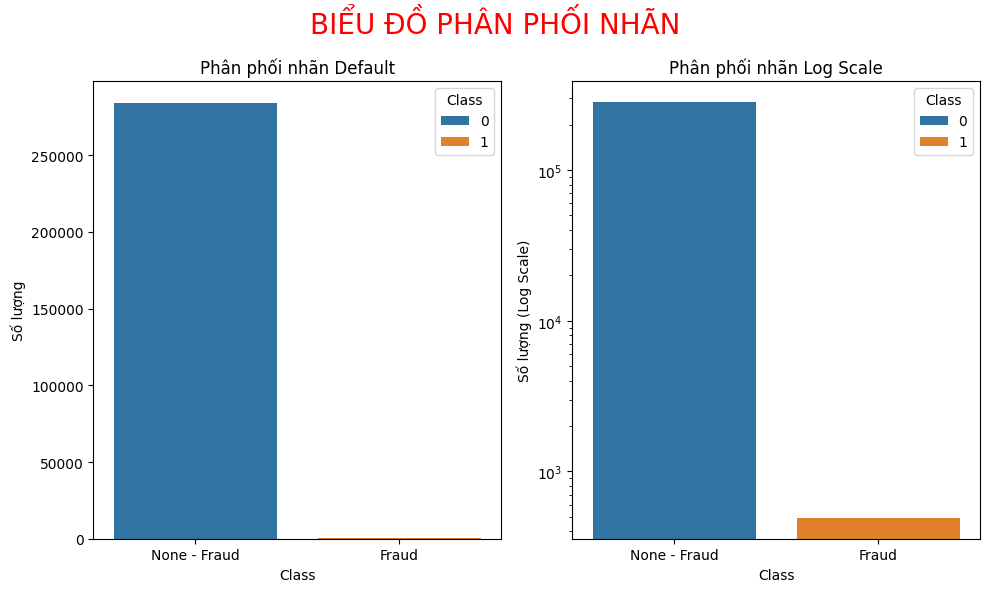

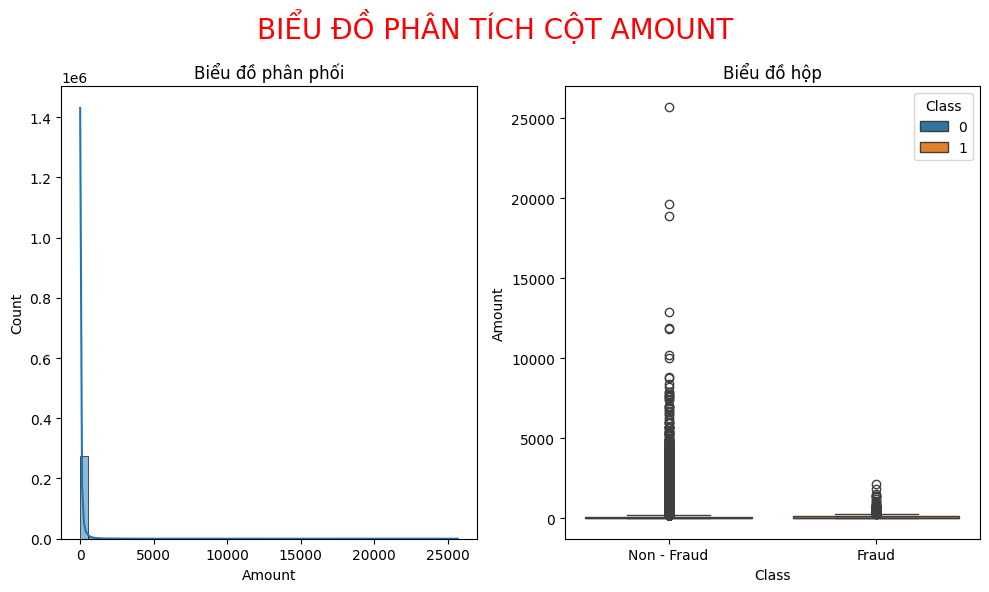

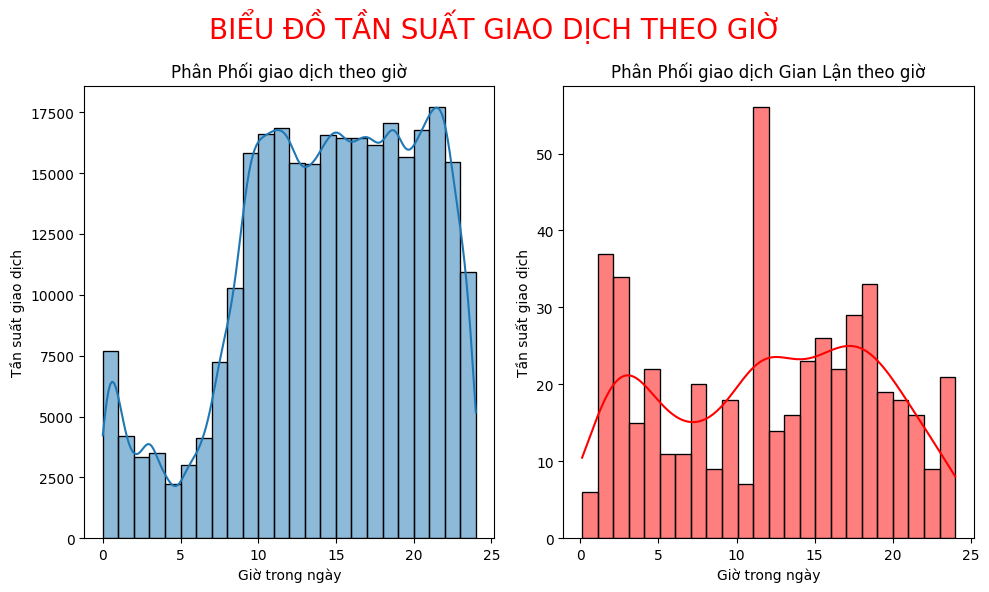

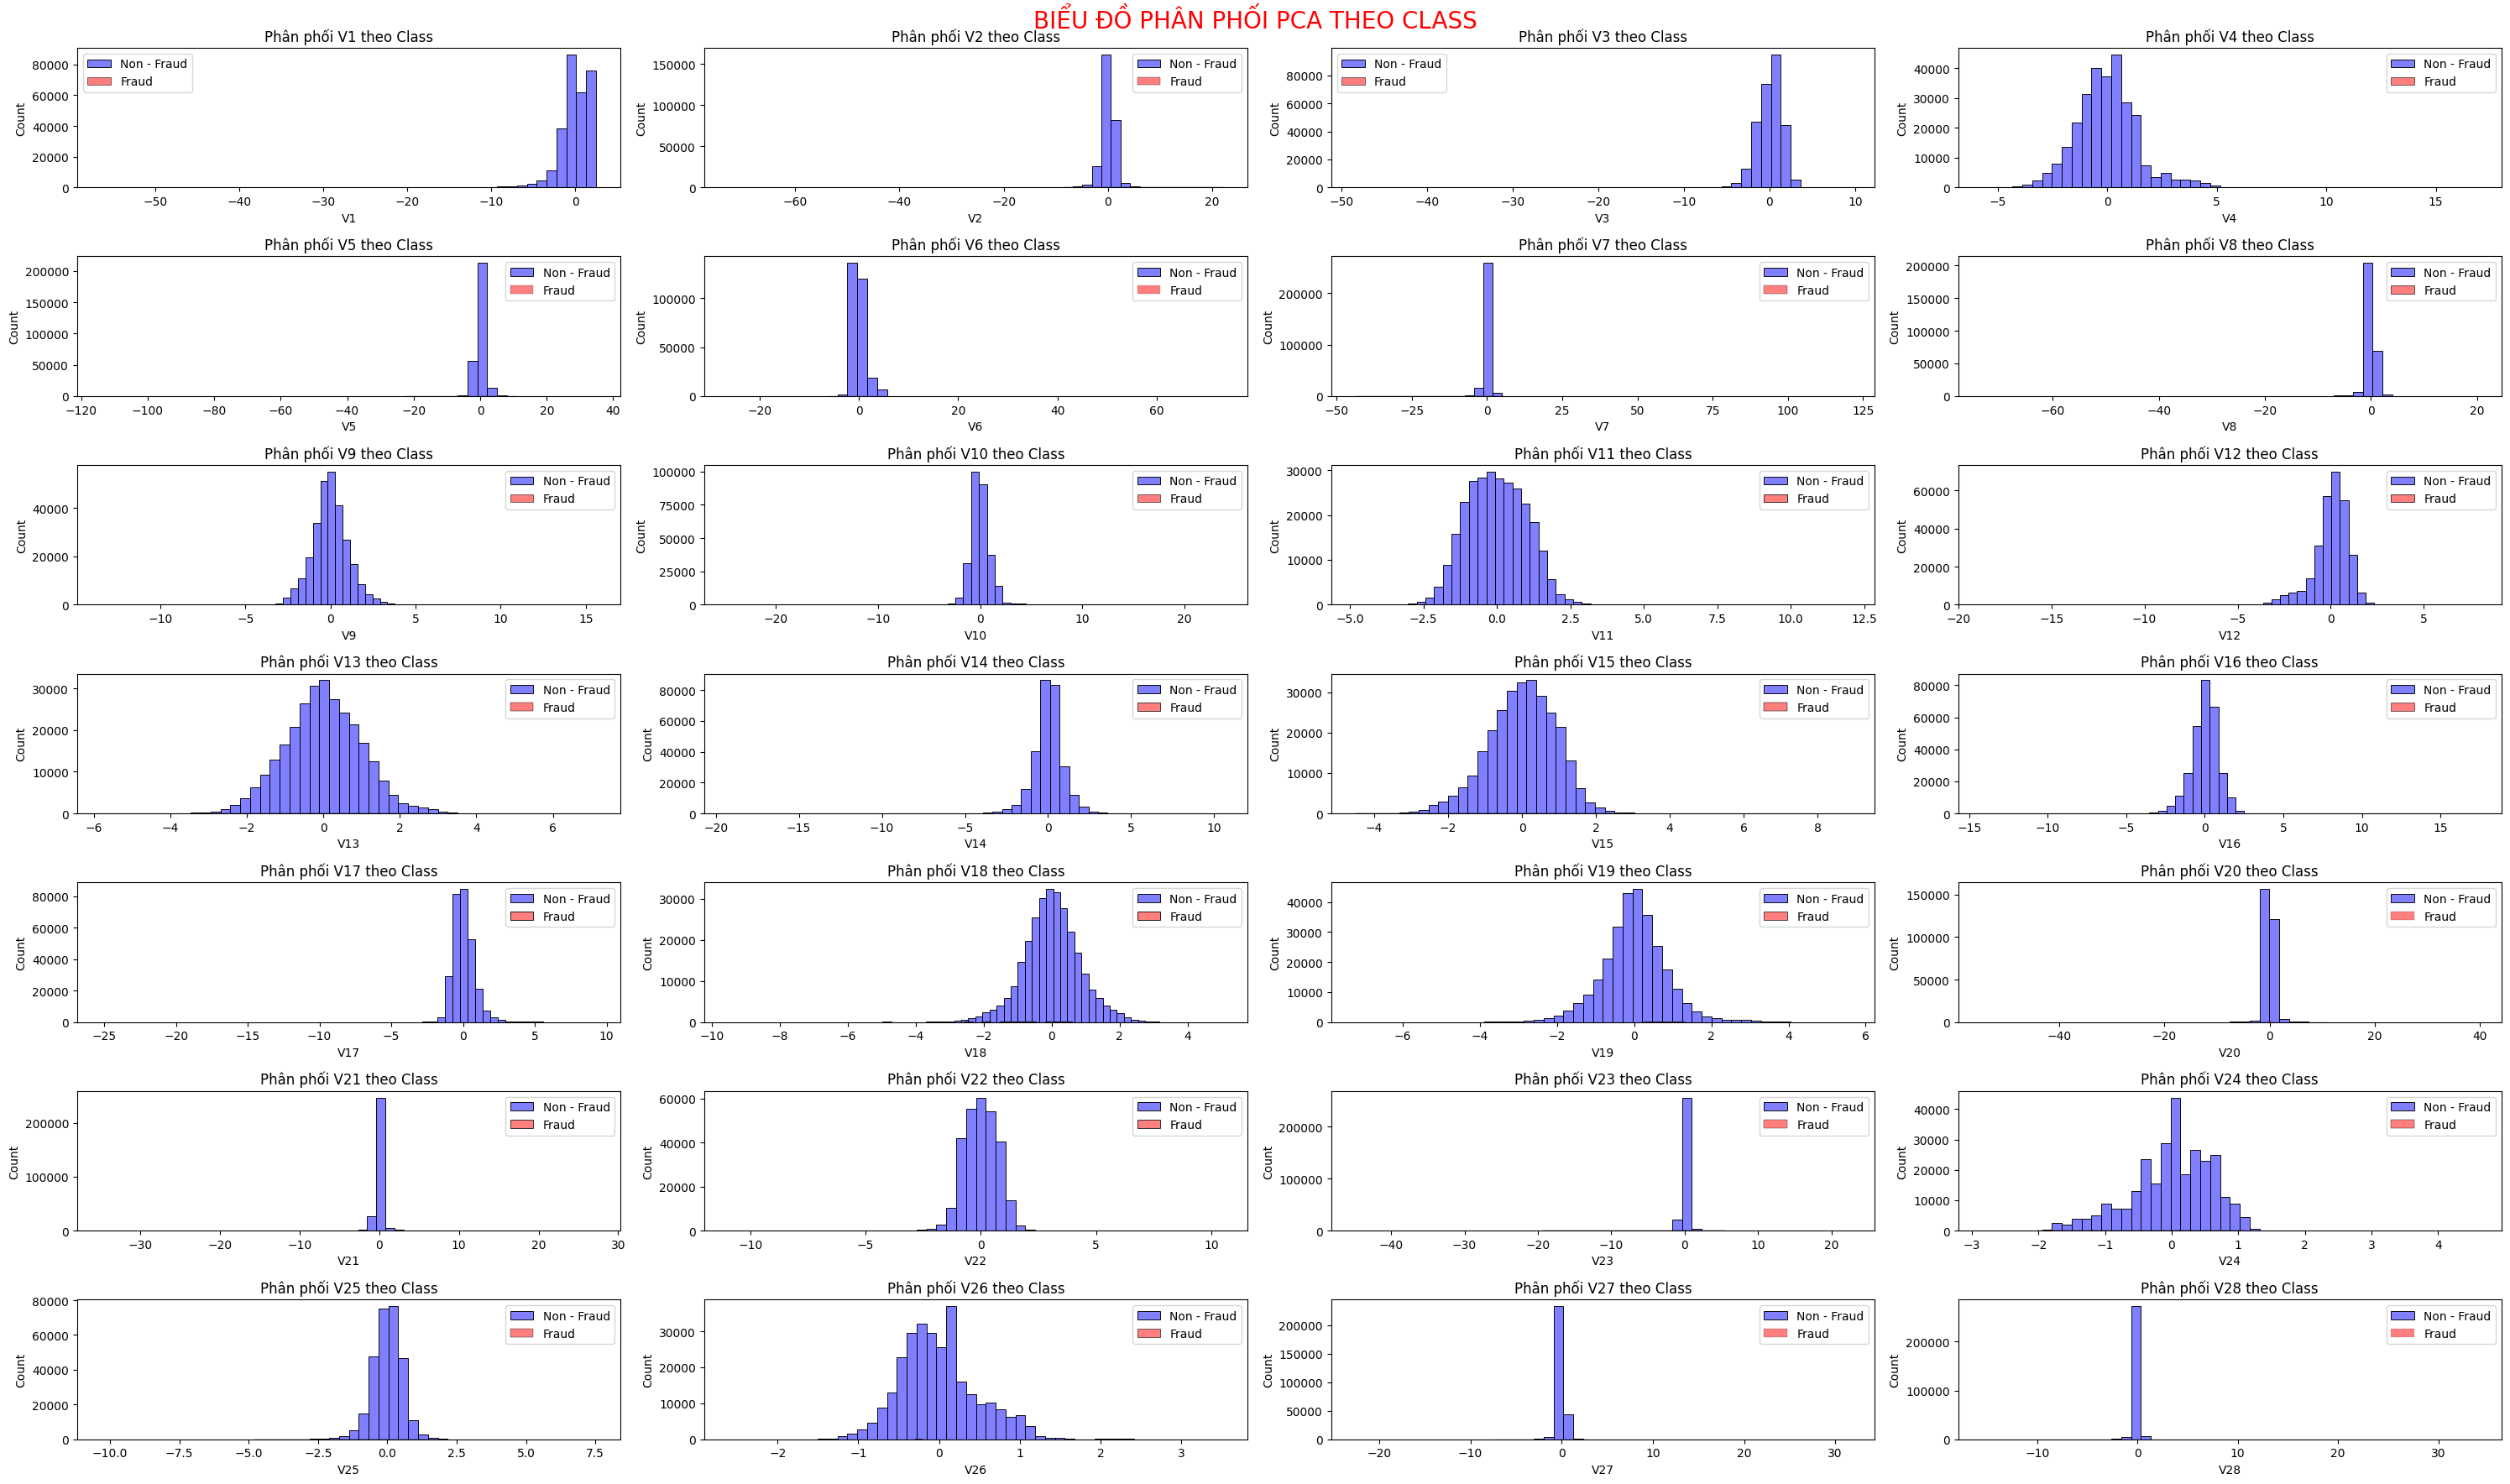

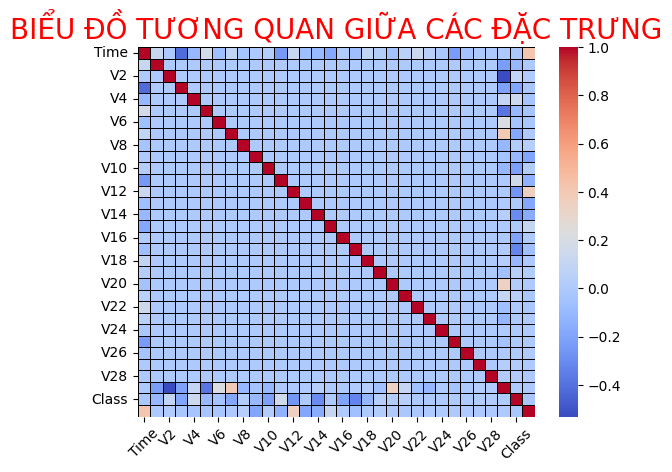

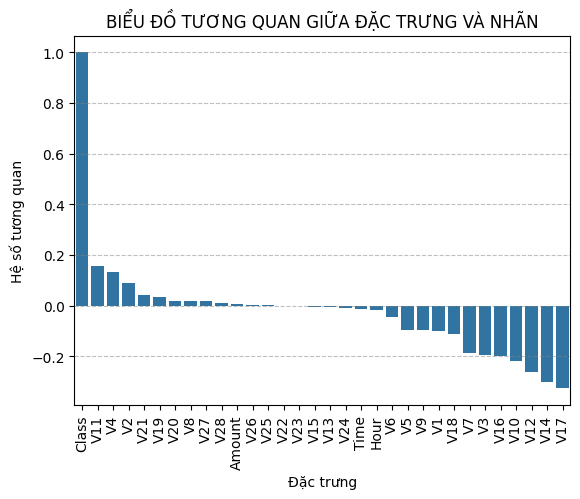

In [ ]:
def analyze_and_visualize_data(df):
    print("2. PH√ÇN T√çCH V√Ä TR·ª∞C QUAN H√ìA D·ªÆ LI·ªÜU")
    print("-"*50)

    # 2.1. Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a bi·∫øn m·ª•c ti√™u
    fig1 = plt.figure(figsize = (10, 6))

    plt.subplot(1,2,1)
    sns.countplot(data = df, x = 'Class', hue = 'Class')
    plt.title("Ph√¢n ph·ªëi nh√£n Default")
    plt.xlabel("Class")
    plt.ylabel("S·ªë l∆∞·ª£ng")
    plt.xticks([0,1], ['None - Fraud', 'Fraud'])

    plt.subplot(1,2,2)
    sns.countplot(data = df, x = 'Class', hue = 'Class')
    plt.title("Ph√¢n ph·ªëi nh√£n Log Scale")
    plt.xlabel("Class")
    plt.ylabel("S·ªë l∆∞·ª£ng (Log Scale)")
    plt.yscale('log')
    plt.xticks([0,1], ['None - Fraud', 'Fraud'])

    fig1.suptitle("BI·ªÇU ƒê·ªí PH√ÇN PH·ªêI NH√ÉN", fontsize = 20, color = 'red')
    plt.tight_layout()
    plt.show()

    # 2.2. Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a c·ªôt Amount
    fig2 = plt.figure(figsize = (10,6))

    # Bi·ªÉu ƒë·ªì histogram
    plt.subplot(1,2,1)
    sns.histplot(data = df['Amount'], bins = 50, kde = True)
    plt.title("Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi")

    # Bi·ªÉu ƒë·ªì box
    plt.subplot(1,2,2)
    sns.boxplot(data = df, x = 'Class', y = 'Amount', hue = 'Class')
    plt.title("Bi·ªÉu ƒë·ªì h·ªôp")
    plt.xticks([0,1], ['Non - Fraud', 'Fraud'])

    fig2.suptitle("BI·ªÇU ƒê·ªí PH√ÇN T√çCH C·ªòT AMOUNT", fontsize = 20,color = 'red')
    plt.tight_layout()
    plt.show()

    # 2.3. Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a c·ªôt Time
    fig3 = plt.figure(figsize = (10,6))

    # T·∫°o c·ªôt 'hour' trong df
    df['Hour'] = df['Time']/3600%24

    # Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi giao d·ªãch theo gi·ªù
    plt.subplot(1,2,1)
    sns.histplot(data = df['Hour'], kde = True, bins = 24)
    plt.title("Ph√¢n Ph·ªëi giao d·ªãch theo gi·ªù")
    plt.xlabel("Gi·ªù trong ng√†y")
    plt.ylabel("T·∫ßn su·∫•t giao d·ªãch")

    # Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi giao d·ªãch Gian L·∫≠n theo gi·ªù
    plt.subplot(1,2,2)
    sns.histplot(data = df['Hour'][df['Class'] == 1], bins = 24, kde = True, color = 'red')
    plt.title("Ph√¢n Ph·ªëi giao d·ªãch Gian L·∫≠n theo gi·ªù")
    plt.xlabel("Gi·ªù trong ng√†y")
    plt.ylabel("T·∫ßn su·∫•t giao d·ªãch")

    fig3.suptitle("BI·ªÇU ƒê·ªí T·∫¶N SU·∫§T GIAO D·ªäCH THEO GI·ªú", fontsize = 20, color = 'red')
    plt.tight_layout()
    plt.show()

    # 2.4 Ph√¢n t√≠ch v√† tr·ª±c quan c√°c ƒë·∫∑c tr∆∞ng PCA
    fig4 = plt.figure(figsize = (30, 18))
    pca_features = [f"V{i}" for i in range(1,29)]

    for i, feature in enumerate(pca_features):
        plt.subplot(7, 4, i+1)
        sns.histplot(df[df['Class'] == 0][feature], bins = 50, color = 'blue', alpha = 0.5, label = 'Non - Fraud')
        sns.histplot(df[df['Class'] == 1][feature], bins = 50, color = 'red', alpha = 0.5, label = 'Fraud')
        plt.title(f"Ph√¢n ph·ªëi {feature} theo Class")
        plt.xlabel(feature)
        plt.legend()

    fig4 = plt.suptitle("BI·ªÇU ƒê·ªí PH√ÇN PH·ªêI PCA THEO CLASS", fontsize = 20, color = 'red')
    plt.tight_layout()
    plt.show()

    #2.5.1 Ph√¢n t√≠ch v√† v·∫Ω bi·ªÉu ƒë·ªì T∆Ø∆†NG QUAN gi·ªØa c√°c ƒë·∫∑c tr∆∞ng
    df_heat = df.corr()

    sns.heatmap(data = df_heat, annot = False, cmap = 'coolwarm', linecolor = 'black', linewidth = 0.5)
    plt.title("BI·ªÇU ƒê·ªí T∆Ø∆†NG QUAN GI·ªÆA C√ÅC ƒê·∫∂C TR∆ØNG", fontsize = 20, color = 'red')
    plt.xticks(rotation = 45)
    plt.show()

    # 2.5.2 Ph√¢n t√≠ch t∆∞∆°ng quan v·ªõi bi·∫øn m·ª•c ti√™u
    df_cor_target = df_heat["Class"].sort_values(ascending = False)
    sns.barplot(x = df_cor_target.index, y = df_cor_target.values)
    plt.title("BI·ªÇU ƒê·ªí T∆Ø∆†NG QUAN GI·ªÆA ƒê·∫∂C TR∆ØNG V√Ä NH√ÉN")
    plt.xlabel("ƒê·∫∑c tr∆∞ng")
    plt.ylabel("H·ªá s·ªë t∆∞∆°ng quan")
    plt.xticks(rotation = 90)
    plt.grid(axis = 'y', linestyle = '--', color = 'gray', alpha = 0.5)
    plt.show()

    return df
df = analyze_and_visualize_data(df)

##‚úÖ3. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu v√† Ph√¢n t√≠ch d·ªØ li·ªáu
    3.1 Th√™m ƒë·∫∑c tr∆∞ng phi tuy·∫øn
    3.2 T√°ch c√°c bi·∫øn ƒë·∫∑c tr∆∞ng v√† bi·∫øn m·ª•c ti√™u: t·∫°o Data v√† Nh√£n
    3.3 Chia t·∫≠p hu·∫•n luy·ªán
    3.4 Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa y trong t·∫≠p train v√† test
    3.5 Chu·∫©n h√≥a d·ªØ li·ªáu Amount v√† Time
    => Kh√¥ng c·∫ßn chu·∫©n h√≥a cho RF, chu·∫©n h√≥a trong code m·∫´u l√† d√πng cho nhi·ªÅu m√¥ h√¨nh

###a. Code m·∫´u

In [ ]:
# 3. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
def preprocess_data(df):
    """
    Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu tr∆∞·ªõc khi hu·∫•n luy·ªán m√¥ h√¨nh
    """
    print("\n3. TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU")
    print("-" * 50)

    # T√°ch bi·∫øn ƒë·∫∑c tr∆∞ng v√† bi·∫øn m·ª•c ti√™u
    X = df.drop('Class', axis=1)
    y = df['Class']

    # T√°ch d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm th·ª≠
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"K√≠ch th∆∞·ªõc t·∫≠p hu·∫•n luy·ªán: {X_train.shape}, K√≠ch th∆∞·ªõc t·∫≠p ki·ªÉm th·ª≠: {X_test.shape}")

    # Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa y trong c√°c t·∫≠p
    print("Ph√¢n ph·ªëi c·ªßa y trong t·∫≠p hu·∫•n luy·ªán:", Counter(y_train))
    print("Ph√¢n ph·ªëi c·ªßa y trong t·∫≠p ki·ªÉm th·ª≠:", Counter(y_test))

    # Chu·∫©n h√≥a d·ªØ li·ªáu
    # ƒê·ªëi v·ªõi Amount v√† Time, s·ª≠ d·ª•ng RobustScaler ƒë·ªÉ x·ª≠ l√Ω ngo·∫°i lai
    robust_scaler = RobustScaler()
    X_train['Amount'] = robust_scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
    X_test['Amount'] = robust_scaler.transform(X_test['Amount'].values.reshape(-1, 1))

    X_train['Time'] = robust_scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))
    X_test['Time'] = robust_scaler.transform(X_test['Time'].values.reshape(-1, 1))

    # C√°c ƒë·∫∑c tr∆∞ng PCA ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a t·ª´ tr∆∞·ªõc

    print("\nKi·ªÉm tra s·ª± kh√°c bi·ªát tr∆∞·ªõc v√† sau khi chu·∫©n h√≥a:")
    print("Amount tr∆∞·ªõc chu·∫©n h√≥a:", df['Amount'].describe())
    print("Amount sau chu·∫©n h√≥a:", X_train['Amount'].describe())

    return X_train, X_test, y_train, y_test


###b. Th·ª±c h√†nh

#### b1. Module h√≥a

In [ ]:
# Module h√≥a
def add_is_night(df):
    df['Is_Night'] = ((df['Hour'] >= 0) & (df['Hour'] <= 5)).astype(int)
    print("ƒê√£ th√™m ƒë·∫∑c tr∆∞ng Is_Night v√†o Data")
    print("-"*100)
    return df

def add_High_Amount(df):
      # df = add_High_Amount(df)
    df['High_Amount'] = (df['Amount'] > 1000).astype(int)
    print("ƒê√£ th√™m ƒë·∫∑c tr∆∞ng High_Amount v√†o Data")
    print("-"*100)
    return df

def add_Amount_Bins(df):
    bins = [0, 100, 500, 1000, 5000, 2000000]
    labels = [0, 1, 2, 3, 4]
    df['Amount_Bins'] = pd.cut(df['Amount'], bins = bins, labels = labels, include_lowest=True)
    df['Amount_Bins'] = df['Amount_Bins'].astype(int)
    print("ƒê√£ th√™m ƒë·∫∑c tr∆∞ng Amount_Bins v√†o Data")
    print("-"*100)
    return df

def add_High_Amount_at_Night(df):
    df['High_Amount_at_Night'] = (df['High_Amount'] & df['Is_Night']).astype(int)
    print("ƒê√£ th√™m ƒë·∫∑c tr∆∞ng High_Amount_at_Night v√†o Data")
    print("-"*100)

    return df

def analize_binary_feature(df, col, target = 'Class', Viz = False):
    print(f"Ph√¢n t√≠ch ƒë·∫∑c tr∆∞ng {col}:")
    print("-"*100)
    print(df[col].value_counts())
    dataa = df.groupby(col)[target].mean()
    print(dataa)

    if Viz:
        print(f"Tr·ª±c quan h√≥a c·ªôt {col}:")
        print("-"*100)

        fig1 = plt.figure(figsize = (14, 8))

        # Bi·ªÉu ƒë·ªì th·ª© nh·∫•t
        plt.subplot(1,2,1)
        sns.countplot(data = df, x = col, hue = target)
        plt.yscale('log')
        plt.title(f'Ph√¢n t√≠ch Fraud - {col}')
        plt.xlabel(col)
        plt.ylabel('T·∫ßn su·∫•t xu·∫•t hi·ªán (Log Scale)')

        # Bi·ªÉu ƒë·ªì th·ª© hai
        plt.subplot(1,2,2)
        # Ph∆∞∆°ng ph√°p 2: Chuy·ªÉn Series th√†nh DataFrame v√† v·∫Ω b·∫±ng seaborn
        dataa_df = dataa.reset_index()  # Chuy·ªÉn Series th√†nh DataFrame
        dataa_df.columns = [col, target]  # ƒê·∫∑t t√™n cho c√°c c·ªôt

        sns.barplot(data = dataa_df, x= col, y= target, hue = col)
        plt.title(f'Gi√° tr·ªã trung b√¨nh c·ªßa {target} theo {col}')
        plt.ylabel(f'Gi√° tr·ªã trung b√¨nh c·ªßa {target}')

        fig1.suptitle(f"BI·ªÇU ƒê·ªí PH√ÇN T√çCH BI·∫æN {col}", fontsize = 25, color = 'red')
        plt.tight_layout()

        plt.show()
        print("-"*100)

#### b2. Ti·ªÅn x·ª≠ l√Ω


 TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU:
----------------------------------------------------------------------------------------------------
Ti·∫øn h√†nh th√™m ƒë·∫∑c tr∆∞ng phi tuy·∫øn:
----------------------------------------------------------------------------------------------------
ƒê√£ th√™m ƒë·∫∑c tr∆∞ng Is_Night v√†o Data
----------------------------------------------------------------------------------------------------
Ph√¢n t√≠ch ƒë·∫∑c tr∆∞ng Is_Night:
----------------------------------------------------------------------------------------------------
Is_Night
0    263862
1     20945
Name: count, dtype: int64
Is_Night
0    0.001436
1    0.005395
Name: Class, dtype: float64
Tr·ª±c quan h√≥a c·ªôt Is_Night:
----------------------------------------------------------------------------------------------------


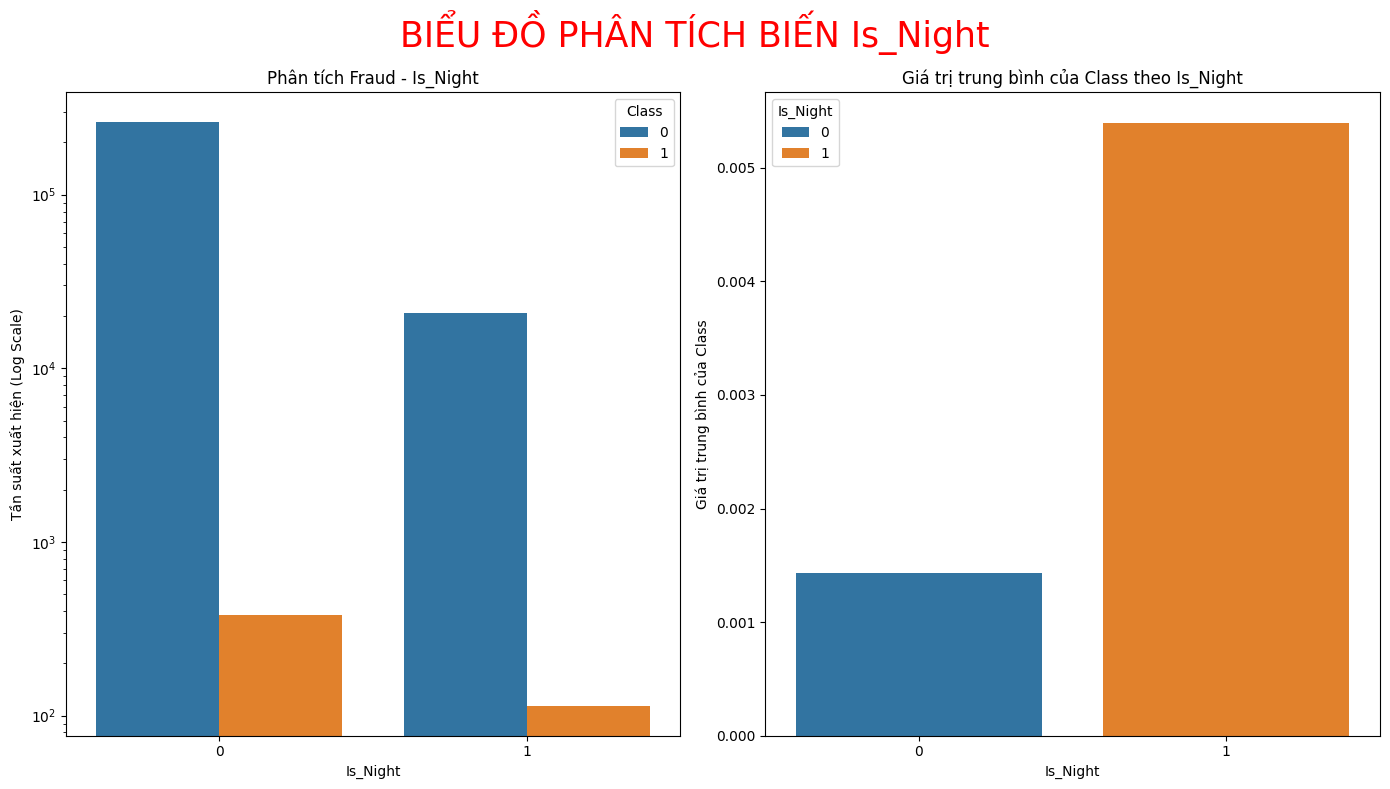

----------------------------------------------------------------------------------------------------
ƒê√£ th√™m ƒë·∫∑c tr∆∞ng High_Amount v√†o Data
----------------------------------------------------------------------------------------------------
Ph√¢n t√≠ch ƒë·∫∑c tr∆∞ng High_Amount:
----------------------------------------------------------------------------------------------------
High_Amount
0    281867
1      2940
Name: count, dtype: int64
High_Amount
0    0.001714
1    0.003061
Name: Class, dtype: float64
Tr·ª±c quan h√≥a c·ªôt High_Amount:
----------------------------------------------------------------------------------------------------


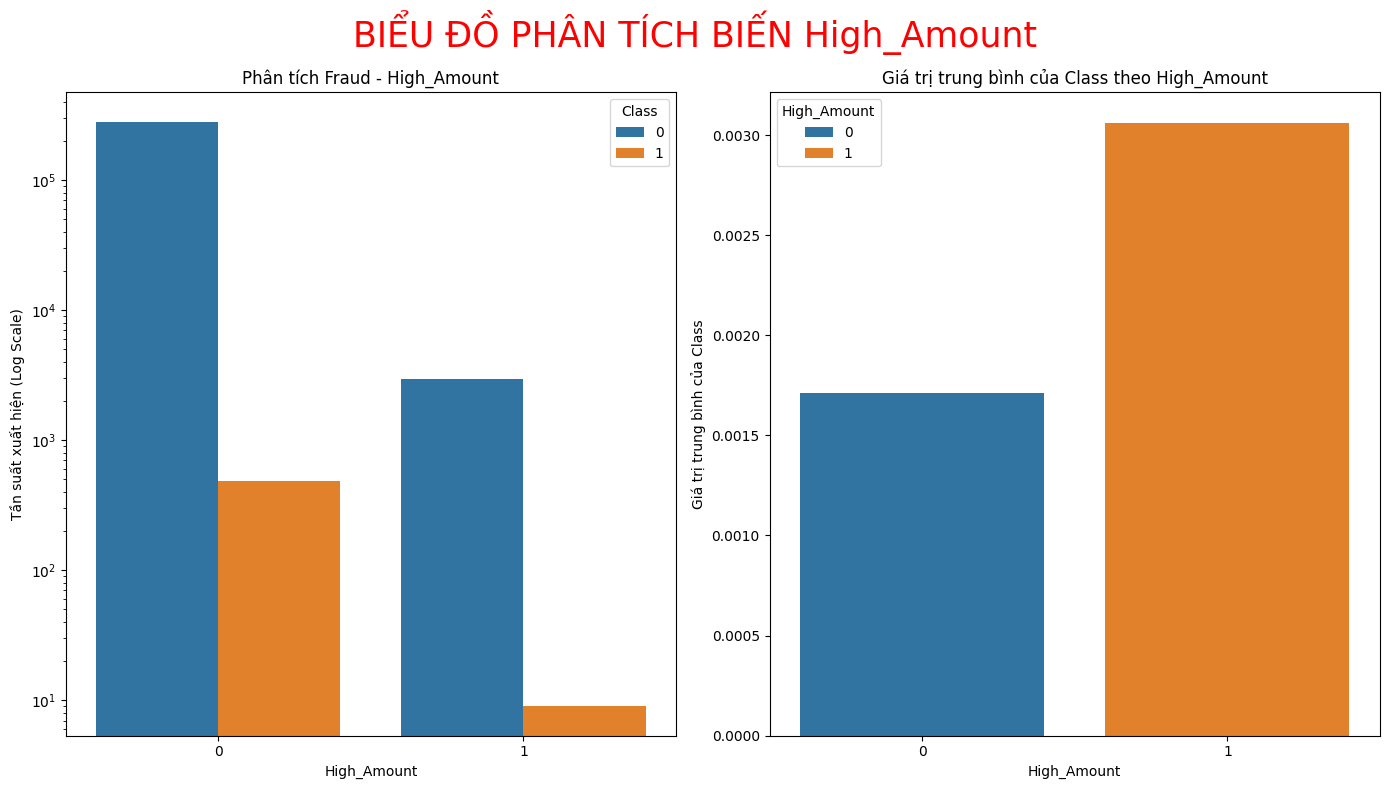

----------------------------------------------------------------------------------------------------
ƒê√£ th√™m ƒë·∫∑c tr∆∞ng Amount_Bins v√†o Data
----------------------------------------------------------------------------------------------------
Ph√¢n t√≠ch ƒë·∫∑c tr∆∞ng Amount_Bins:
----------------------------------------------------------------------------------------------------
Amount_Bins
0    228299
1     47366
2      6202
3      2885
4        55
Name: count, dtype: int64
Amount_Bins
0    0.001586
1    0.002006
2    0.004192
3    0.003120
4    0.000000
Name: Class, dtype: float64
Tr·ª±c quan h√≥a c·ªôt Amount_Bins:
----------------------------------------------------------------------------------------------------


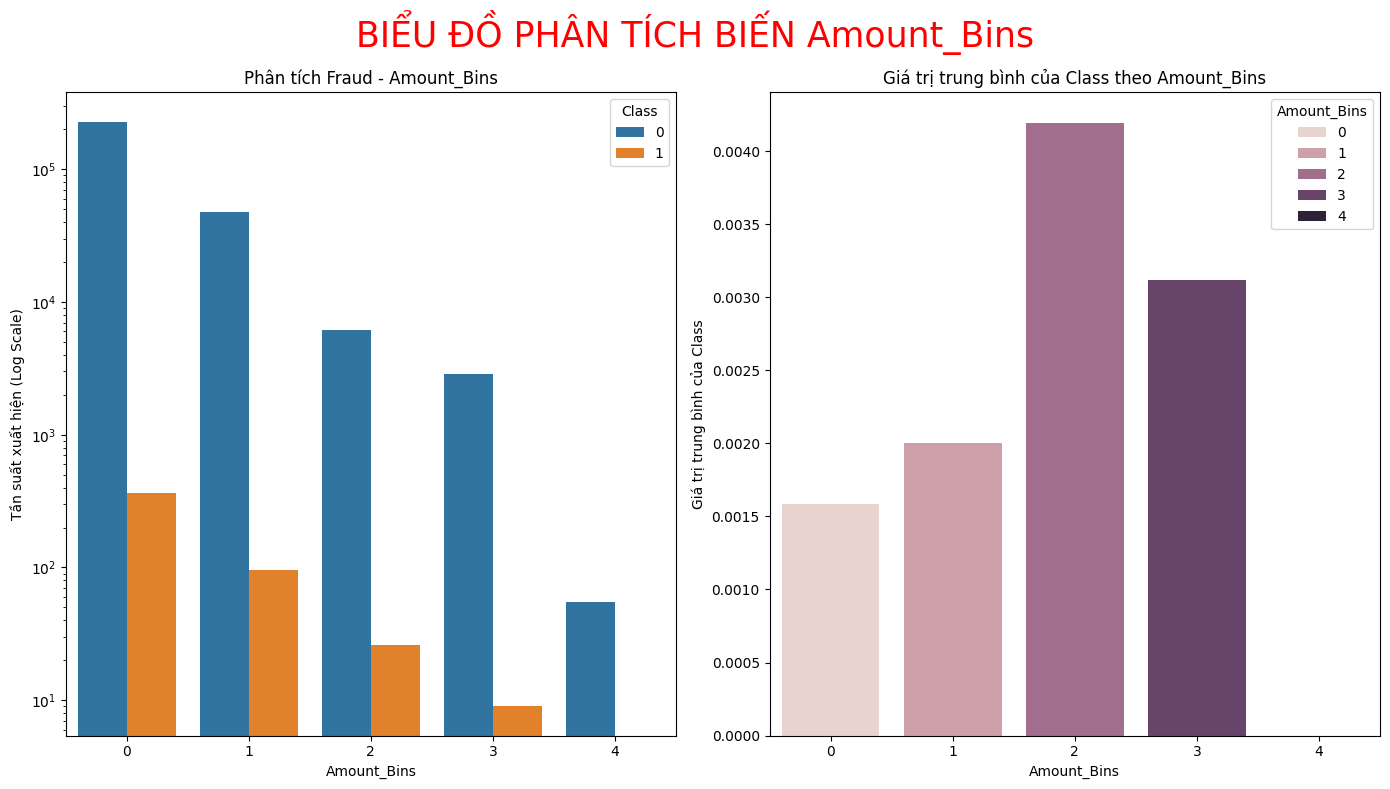

----------------------------------------------------------------------------------------------------
ƒê√£ th√™m ƒë·∫∑c tr∆∞ng High_Amount_at_Night v√†o Data
----------------------------------------------------------------------------------------------------
Ph√¢n t√≠ch ƒë·∫∑c tr∆∞ng High_Amount_at_Night:
----------------------------------------------------------------------------------------------------
High_Amount_at_Night
0    284694
1       113
Name: count, dtype: int64
High_Amount_at_Night
0    0.001725
1    0.008850
Name: Class, dtype: float64
Tr·ª±c quan h√≥a c·ªôt High_Amount_at_Night:
----------------------------------------------------------------------------------------------------


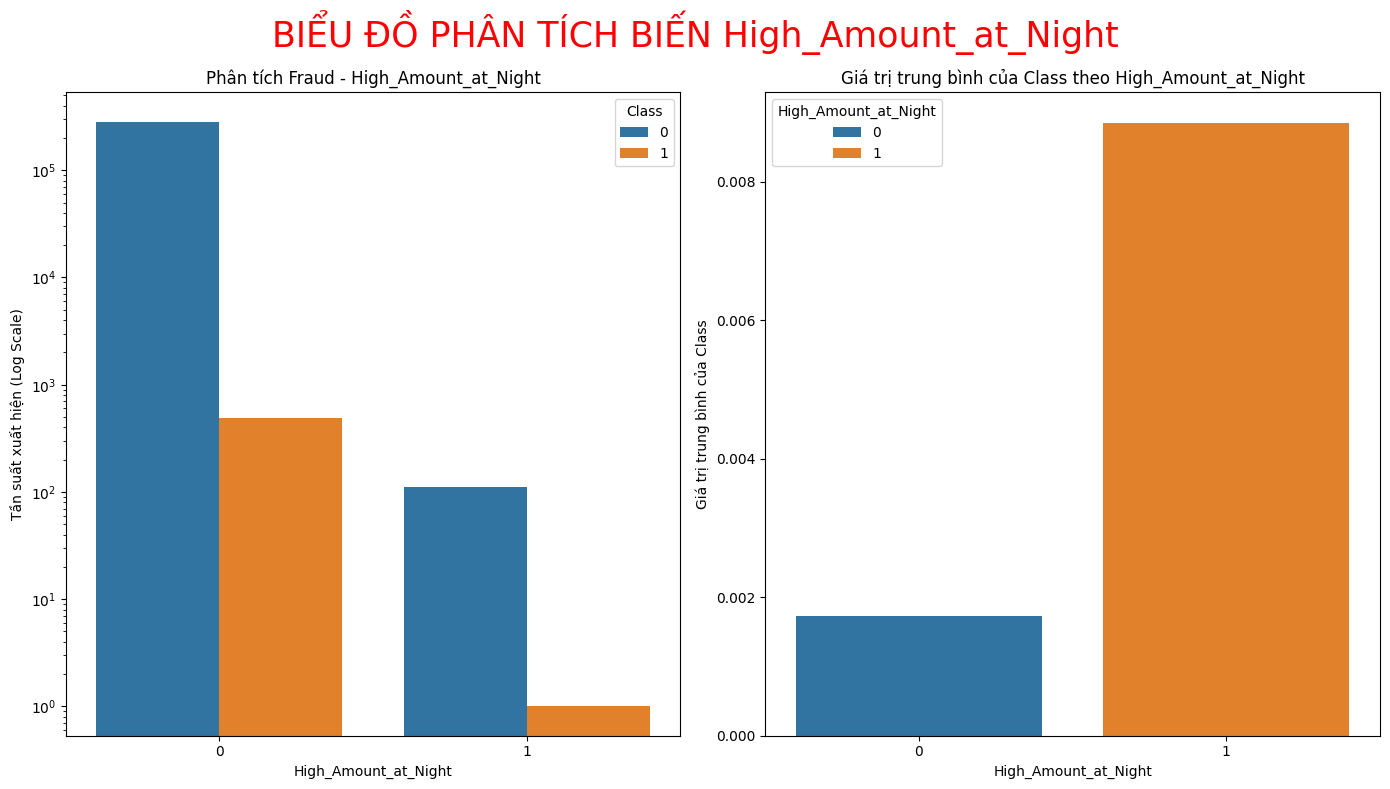

----------------------------------------------------------------------------------------------------
Ti·∫øn h√†nh t√°ch bi·∫øn ƒë·∫∑c tr∆∞ng v√† m·ª•c ti√™u!
----------------------------------------------------------------------------------------------------
Ti·∫øn h√†nh chia t·∫≠p hu·∫•n luy·ªán!

T·ª∑ l·ªá nh√£n Fraud trong t·∫≠p train:  0.001729245759178389
T·ª∑ l·ªá nh√£n Fraud trong t·∫≠p test:  0.0017204452090867595


In [ ]:
# 3 Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
def preprocess_data(df):
    print("\n TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU:")
    print("-"*100)

    #3.1 Th√™m ƒë·∫∑c tr∆∞ng phi tuy·∫øn
    print("Ti·∫øn h√†nh th√™m ƒë·∫∑c tr∆∞ng phi tuy·∫øn:")
    print("-"*100)

    # Th√™m ƒë·∫∑c tr∆∞ng Is_Night
    df = add_is_night(df)
    analize_binary_feature(df, col = 'Is_Night', Viz = True)

    # Th√™m ƒë·∫∑c tr∆∞ng High_Amount
    df = add_High_Amount(df)
    analize_binary_feature(df, col = 'High_Amount', Viz = True)

    # Th√™m ƒë·∫∑c tr∆∞ng Amount_Bins
    df = add_Amount_Bins(df)
    analize_binary_feature(df, col = 'Amount_Bins', Viz = True)

    # Th√™m ƒë·∫∑c tr∆∞ng High_Amount_at_Night
    df = add_High_Amount_at_Night(df)
    analize_binary_feature(df, col = 'High_Amount_at_Night', Viz = True)

    #3.2 T√°ch bi·∫øn ƒë·∫∑c tr∆∞ng v√† m·ª•c ti√™u
    print("Ti·∫øn h√†nh t√°ch bi·∫øn ƒë·∫∑c tr∆∞ng v√† m·ª•c ti√™u!")
    X = df.drop(['Class', 'Time'], axis = 1)
    y = df['Class']
    print("-"*100)

    #3.3 Chia t·∫≠p hu·∫•n luy·ªán
    print("Ti·∫øn h√†nh chia t·∫≠p hu·∫•n luy·ªán!\n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    # Ki·ªÉm tra l·∫°i ph√¢n ph·ªëi nh√£n trong t·∫≠p Train v√† Test
    print("T·ª∑ l·ªá nh√£n Fraud trong t·∫≠p train: ", Counter(y_train)[1]/len(X_train))
    print("T·ª∑ l·ªá nh√£n Fraud trong t·∫≠p test: ", Counter(y_test)[1]/len(X_test))

    # Chu·∫©n h√≥a: ƒë·ªëi v·ªõi Amount
    # robust_scaler = RobustScaler()
    # X_train['Amount'] = robust_scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
    # X_test['Amount'] = robust_scaler.transform(X_test['Amount'].values.reshape(-1, 1))

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess_data(df)

##‚úÖ4. X·ª≠ l√Ω d·ªØ li·ªáu
    4.1 X·ª≠ l√Ω m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu
        - Random Under-sampling
        - SMOTE (Synthetic Minority Over-sampling Technique)
        - K·∫øt h·ª£p Under-sampling v·ªõi SMOTE
        

### a. Code m·∫´u

In [ ]:
# 4. X·ª≠ l√Ω m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu
def handle_imbalanced_data(X_train, y_train):
    """
    X·ª≠ l√Ω v·∫•n ƒë·ªÅ m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu b·∫±ng c√°c ph∆∞∆°ng ph√°p kh√°c nhau
    """
    print("\n 4. X·ª¨ L√ù M·∫§T C√ÇN B·∫∞NG D·ªÆ LI·ªÜU")
    print("-" * 50)

    # In ra ph√¢n ph·ªëi ban ƒë·∫ßu
    print("Ph√¢n ph·ªëi ban ƒë·∫ßu:", Counter(y_train))

    # 1. Random Under-sampling
    rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)  # Gi·∫£m s·ªë l∆∞·ª£ng m·∫´u non-fraud
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
    print("Ph√¢n ph·ªëi sau Random Under-sampling:", Counter(y_train_rus))

    # 2. SMOTE (Synthetic Minority Over-sampling Technique)
    smote = SMOTE(sampling_strategy=0.1, random_state=42)  # TƒÉng s·ªë l∆∞·ª£ng m·∫´u fraud
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    print("Ph√¢n ph·ªëi sau SMOTE:", Counter(y_train_smote))

    # 3. K·∫øt h·ª£p Under-sampling v·ªõi SMOTE
    rus_smote = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
    X_train_rus_smote, y_train_rus_smote = rus_smote.fit_resample(X_train_smote, y_train_smote)
    print("Ph√¢n ph·ªëi sau Under-sampling k·∫øt h·ª£p SMOTE:", Counter(y_train_rus_smote))

    return {
        'original': (X_train, y_train),
        'undersampling': (X_train_rus, y_train_rus),
        'smote': (X_train_smote, y_train_smote),
        'combined': (X_train_rus_smote, y_train_rus_smote)
    }


###b. Th·ª±c h√†nh

#### L√Ω thuy·∫øt ƒëi k√®m

##### **Random Under - Sampling**

Code m·∫´u:

    rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

Nguy√™n l√Ω:

    RandomUnderSampler ho·∫°t ƒë·ªông b·∫±ng c√°ch ng·∫´u nhi√™n lo·∫°i b·ªè m·ªôt s·ªë m·∫´u t·ª´ l·ªõp ƒëa s·ªë cho ƒë·∫øn khi t·ª∑ l·ªá gi·ªØa l·ªõp thi·ªÉu s·ªë v√† l·ªõp ƒëa s·ªë ƒë·∫°t ƒë∆∞·ª£c t·ª∑ l·ªá mong mu·ªën (sampling_strategy)

Thao t√°c code tay (T·ª± ƒë·ªÅ xu·∫•t):

    - Ki·ªÉm tra ph√¢n b·ªë nh√£n trong y_train

    - X√°c ƒë·ªãnh s·ªë l∆∞·ª£ng nh√£n 0 v√† 1

    - L·∫•y index random theo s·ªë l∆∞·ª£ng t·ª´ (1/sampling_strategy)*s·ªë l∆∞·ª£ng nh√£n thi·ªÉu s·ªë

    - Truy c·∫≠p v√† l·∫•y m·∫´u theo index n√†y trong X_train v√† y_train

    - return l·∫°i m·∫´u ƒë√£ l·∫•y

##### **SMOTE (Synthetic Minority Over-sampling Technique)**

**Code m·∫´u:**

    smote = SMOTE(sampling_strategy=0.1, random_state=42)  # TƒÉng s·ªë l∆∞·ª£ng m·∫´u fraud
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    print("Ph√¢n ph·ªëi sau SMOTE:", Counter(y_train_smote))

- **√ù nghƒ©a:** Gi·ªØ l·∫°i to√†n b·ªô d·ªØ li·ªáu g·ªëc v√† sinh th√™m m·∫´u gi·∫£ cho l·ªõp thi·ªÉu s·ªë b·∫±ng k·ªπ thu·∫≠t n·ªôi suy (synthetic data).

- **T·ª∑ l·ªá:** Sau khi SMOTE, s·ªë l∆∞·ª£ng m·∫´u fraud ƒë·∫°t 10% t·ªïng d·ªØ li·ªáu.

- **∆Øu ƒëi·ªÉm:** Kh√¥ng l√†m m·∫•t d·ªØ li·ªáu l·ªõp ƒëa s·ªë.

- **Nh∆∞·ª£c ƒëi·ªÉm:** C√≥ th·ªÉ sinh ra m·∫´u kh√¥ng th·∫≠t s·ª± ƒë·∫°i di·ªán (nhi·ªÖu).

**Thao t√°c Code tay (t·ª± ƒë·ªÅ xu·∫•t):**
- L·∫•y t·ª∑ l·ªá nh√£n
- L·∫•y s·ªë l∆∞·ª£ng m·∫´u theo sampling_strategy
- L·∫∑p:

    - Ch·ªçn 1 m·∫´u xi trong l·ªõp thi·ªÉu s·ªë
    - T√¨m k l√°ng gi·ªÅng g·∫ßn nh·∫•t thu·ªôc l·ªõp thi·ªÉu s·ªë (theo KNN)
    - Ch·ªçn ng·∫´u nhi√™n 1 xj n√†o ƒë√≥ trong k h√†ng x√≥m ƒë√≥
    - T·∫°o m·∫´u t·ªïng h·ª£p t·ª´ xi v√† xj:
    
        - x_new = x_i + Œª √ó (x_j - x_i)
    - D·ª´ng l·∫°i khi ƒë·ªß s·ªë m·∫´u y√™u c·∫ßu
- return X_train, y_train

**C√°c bi·∫øn th·ªÉ c·ªßa SMOTE:**

ƒê·ªÉ kh·∫Øc ph·ª•c m·ªôt s·ªë nh∆∞·ª£c ƒëi·ªÉm c·ªßa SMOTE c∆° b·∫£n, nhi·ªÅu bi·∫øn th·ªÉ ƒë√£ ƒë∆∞·ª£c ph√°t tri·ªÉn, bao g·ªìm:

- **Borderline-SMOTE:** Ch·ªâ t·∫°o m·∫´u t·ªïng h·ª£p cho c√°c m·∫´u thi·ªÉu s·ªë n·∫±m g·∫ßn ranh gi·ªõi gi·ªØa hai l·ªõp.

- **ADASYN (Adaptive Synthetic Sampling):** T·∫°o nhi·ªÅu m·∫´u t·ªïng h·ª£p h∆°n ·ªü c√°c v√πng c√≥ m·∫≠t ƒë·ªô m·∫´u thi·ªÉu s·ªë th·∫•p h∆°n.
SMOTE-Tomek: K·∫øt h·ª£p SMOTE v·ªõi k·ªπ thu·∫≠t Tomek links ƒë·ªÉ lo·∫°i b·ªè c√°c c·∫∑p m·∫´u g·∫ßn nhau thu·ªôc c√°c l·ªõp kh√°c nhau, gi√∫p l√†m s·∫°ch ranh gi·ªõi quy·∫øt ƒë·ªãnh.

- **SMOTE-ENN (Edited Nearest Neighbors)**: K·∫øt h·ª£p SMOTE v·ªõi quy t·∫Øc ENN ƒë·ªÉ lo·∫°i b·ªè c√°c m·∫´u (c·∫£ t·ªïng h·ª£p v√† ban ƒë·∫ßu) b·ªã ph√¢n lo·∫°i sai b·ªüi c√°c l√°ng gi·ªÅng g·∫ßn nh·∫•t c·ªßa ch√∫ng.

- **KMeansSMOTE:** S·ª≠ d·ª•ng thu·∫≠t to√°n KMeans clustering ƒë·ªÉ x√°c ƒë·ªãnh c√°c c·ª•m trong l·ªõp thi·ªÉu s·ªë v√† sau ƒë√≥ √°p d·ª•ng SMOTE trong t·ª´ng c·ª•m.

#### Code

In [ ]:
# X·ª≠ l√Ω m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu

def handle_imbalanced_data(X_train, y_train):
    print("X·ª¨ L√ù M·∫§T C√ÇN B·∫∞NG D·ªÆ LI·ªÜU:")
    print("-"*100)

    # 4.1 In ra ph√¢n ph·ªëi nh√£n ban ƒë·∫ßu
    print("Ph√¢n ph·ªëi ban ƒë·∫ßu: ", Counter(y_train))
    print("-"*100)

    # 4.2 K·ªπ thu·∫≠t Random Under - sampling
    print("Th·ª±c hi·ªán k·ªπ thu·∫≠t Random Under-sampling: ")
    rus = RandomUnderSampler(sampling_strategy = 0.1, random_state = 42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

    print("Ph√¢n ph·ªëi sau Random Under-sampling: ", Counter(y_train_rus))
    print("-"*100)

    # 4.3 K·ªπ thu·∫≠t SMOTE (Synthetic Minority Over-sampling Technique)
    print("Th·ª±c hi·ªán k·ªπ thu·∫≠t Smote:")
    smote = SMOTE(sampling_strategy = 0.1, random_state = 42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    print("Ph√¢n ph·ªëi sau SMOTE: ", Counter(y_train_smote))
    print("-"*100)

    # 4.4 K·∫øt h·ª£p Under-sampling v·ªõi SMOTE
    print("Th·ª±c hi·ªán k·ªπ thu·∫≠t Us-Smote: ")
    rus_smote = RandomUnderSampler(sampling_strategy = 0.5, random_state = 42)
    X_train_rus_smote, y_train_rus_smote = rus_smote.fit_resample(X_train_smote, y_train_smote)
    print("Ph√¢n ph·ªëi sau rus - SMOTE: ", Counter(y_train_rus_smote))
    print("-"*100)

    # 4.5 Return k·∫øt qu·∫£ sau x·ª≠ l√Ω
    return {
        'original':(X_train, y_train),
        'undersampling': (X_train_rus, y_train_rus),
        'smote': (X_train_smote, y_train_smote),
        'combined': (X_train_rus_smote, y_train_rus_smote)
    }

resampled_data = handle_imbalanced_data(X_train, y_train)


X·ª¨ L√ù M·∫§T C√ÇN B·∫∞NG D·ªÆ LI·ªÜU:
----------------------------------------------------------------------------------------------------
Ph√¢n ph·ªëi ban ƒë·∫ßu:  Counter({0: 227451, 1: 394})
----------------------------------------------------------------------------------------------------
Th·ª±c hi·ªán k·ªπ thu·∫≠t Random Under-sampling: 
Ph√¢n ph·ªëi sau Random Under-sampling:  Counter({0: 3940, 1: 394})
----------------------------------------------------------------------------------------------------
Th·ª±c hi·ªán k·ªπ thu·∫≠t Smote:
Ph√¢n ph·ªëi sau SMOTE:  Counter({0: 227451, 1: 22745})
----------------------------------------------------------------------------------------------------
Th·ª±c hi·ªán k·ªπ thu·∫≠t Us-Smote: 
Ph√¢n ph·ªëi sau rus - SMOTE:  Counter({0: 45490, 1: 22745})
----------------------------------------------------------------------------------------------------


##‚úÖ5. Hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh

    - Kh·ªüi t·∫°o model
    - L·∫≠p danh s√°ch c√°c ph∆∞∆°ng ph√°p x·ª≠ l√Ω m·∫•t c√¢n b·∫±ng
    - Hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh v·ªõi t·ª´ng ph∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu
        L·∫∑p qua t·ª´ng ph∆∞∆°ng ph√°p, v·ªõi m·ªói ph∆∞∆°ng ph√°p:
            - L·∫•y Data
            - model.fit()
            - D·ª± ƒëo√°n
            - ƒê√°nh gi√° m√¥ h√¨nh:
                ~ ROC-AUC
                ~ Precison - Recall
    - Tr·∫£ v·ªÅ results

### Code m·∫´u:

#### Hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh

In [ ]:
# 5. Hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh
def train_and_evaluate_models(resampled_data, X_test, y_test):
    """
    Hu·∫•n luy·ªán v√† ƒë√°nh gi√° c√°c m√¥ h√¨nh kh√°c nhau
    """
    print("\n5. HU·∫§N LUY·ªÜN V√Ä ƒê√ÅNH GI√Å M√î H√åNH")
    print("-" * 50)

    # Danh s√°ch c√°c m√¥ h√¨nh s·∫Ω s·ª≠ d·ª•ng
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

    # Danh s√°ch c√°c ph∆∞∆°ng ph√°p x·ª≠ l√Ω m·∫•t c√¢n b·∫±ng
    resampling_methods = ['original', 'undersampling', 'smote', 'combined']

    # L∆∞u tr·ªØ k·∫øt qu·∫£
    results = {}

    # Hu·∫•n luy·ªán v√† ƒë√°nh gi√° t·ª´ng m√¥ h√¨nh v·ªõi t·ª´ng ph∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu
    for method in resampling_methods:
        print(f"\nPh∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu: {method}")
        X_train_resampled, y_train_resampled = resampled_data[method]

        for model_name, model in models.items():
            print(f"\nM√¥ h√¨nh: {model_name}")

            # Hu·∫•n luy·ªán m√¥ h√¨nh
            model.fit(X_train_resampled, y_train_resampled)

            # D·ª± ƒëo√°n
            y_pred = model.predict(X_test)

            # ƒê√°nh gi√° m√¥ h√¨nh
            print(f"Classification Report cho {model_name} v·ªõi ph∆∞∆°ng ph√°p {method}:")
            print(classification_report(y_test, y_pred))

            # T√≠nh to√°n ƒëi·ªÉm s·ªë cho ROC-AUC v√† PR-AUC
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]

                # ROC-AUC
                fpr, tpr, _ = roc_curve(y_test, y_prob)
                roc_auc = auc(fpr, tpr)

                # PR-AUC
                precision, recall, _ = precision_recall_curve(y_test, y_prob)
                pr_auc = auc(recall, precision)

                print(f"ROC-AUC: {roc_auc:.4f}")
                print(f"PR-AUC: {pr_auc:.4f}")

                # L∆∞u k·∫øt qu·∫£
                if method not in results:
                    results[method] = {}
                results[method][model_name] = {
                    'model': model,
                    'y_pred': y_pred,
                    'y_prob': y_prob,
                    'roc_auc': roc_auc,
                    'pr_auc': pr_auc
                }

    return results

#### Tr·ª±c quan h√≥a k·∫øt qu·∫£ m√¥ h√¨nh

In [ ]:
# 6. Tr·ª±c quan h√≥a k·∫øt qu·∫£ m√¥ h√¨nh
def visualize_model_results(results, X_test, y_test):
    """
    Tr·ª±c quan h√≥a k·∫øt qu·∫£ c·ªßa c√°c m√¥ h√¨nh
    """
    print("\n6. TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢ M√î H√åNH")
    print("-" * 50)

    # V·∫Ω ƒë∆∞·ªùng cong ROC cho m·ªói ph∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu
    plt.figure(figsize=(14, 10))

    for i, method in enumerate(results.keys()):
        plt.subplot(2, 2, i+1)

        for model_name, result in results[method].items():
            y_prob = result['y_prob']
            roc_auc = result['roc_auc']

            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {method}')
        plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    # V·∫Ω ƒë∆∞·ªùng cong Precision-Recall cho m·ªói ph∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu
    plt.figure(figsize=(14, 10))

    for i, method in enumerate(results.keys()):
        plt.subplot(2, 2, i+1)

        for model_name, result in results[method].items():
            y_prob = result['y_prob']
            pr_auc = result['pr_auc']

            precision, recall, _ = precision_recall_curve(y_test, y_prob)
            plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.4f})')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {method}')
        plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # V·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n cho m√¥ h√¨nh t·ªët nh·∫•t
    best_method = max(results.keys(), key=lambda method:
                      max(results[method].values(), key=lambda x: x['pr_auc'])['pr_auc'])
    best_model_name = max(results[best_method].keys(), key=lambda model:
                         results[best_method][model]['pr_auc'])
    best_result = results[best_method][best_model_name]

    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, best_result['y_pred'])

    # T√≠nh to√°n t·ª∑ l·ªá ƒë·ªÉ hi·ªÉn th·ªã
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Best Model: {best_model_name} ({best_method})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Hi·ªÉn th·ªã ma tr·∫≠n nh·∫ßm l·∫´n c√≥ t·ª∑ l·ªá ph·∫ßn trƒÉm
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
    plt.title(f'Normalized Confusion Matrix - Best Model: {best_model_name} ({best_method})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Hi·ªÉn th·ªã t·∫ßm quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng cho Random Forest ho·∫∑c XGBoost
    if 'Random Forest' in results[best_method]:
        model_for_features = results[best_method]['Random Forest']['model']
        model_name_for_features = 'Random Forest'
    elif 'XGBoost' in results[best_method]:
        model_for_features = results[best_method]['XGBoost']['model']
        model_name_for_features = 'XGBoost'
    else:
        return

    plt.figure(figsize=(12, 8))

    # L·∫•y t·∫ßm quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng
    feature_importances = model_for_features.feature_importances_
    feature_names = X_test.columns

    # S·∫Øp x·∫øp theo t·∫ßm quan tr·ªçng gi·∫£m d·∫ßn
    indices = np.argsort(feature_importances)[::-1]

    # V·∫Ω top 10 ƒë·∫∑c tr∆∞ng quan tr·ªçng nh·∫•t
    plt.title(f'Top 10 Feature Importance - {model_name_for_features}')
    plt.bar(range(min(10, len(feature_names))),
            feature_importances[indices[:10]],
            align='center')
    plt.xticks(range(min(10, len(feature_names))),
               [feature_names[i] for i in indices[:10]],
               rotation=90)
    plt.tight_layout()
    plt.show()

### Th·ª±c h√†nh:

#### a. L√Ω thuy·∫øt ROC-AUC

##### **C√∫ ph√°p:**

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)


##### **‚úÖ B·ªëi c·∫£nh**

Ta c√≥:

    y_test: nh√£n th·∫≠t (0 ho·∫∑c 1).

    y_prob: x√°c su·∫•t d·ª± ƒëo√°n l·ªõp 1 c·ªßa m√¥ h√¨nh (s·ªë th·ª±c t·ª´ 0 ƒë·∫øn 1).

Ta mu·ªën ƒë√°nh gi√° ROC-AUC (di·ªán t√≠ch d∆∞·ªõi ƒë∆∞·ªùng ROC).

##### **T√≥m t·∫Øt:**

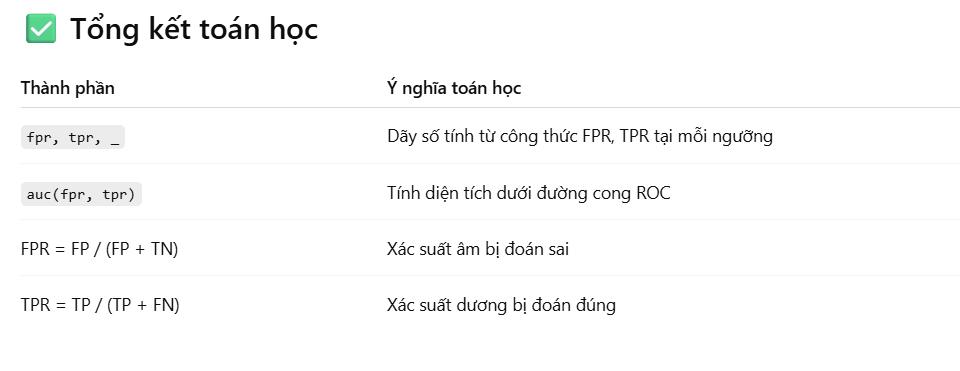

##### **Link ƒë·ªçc chi ti·∫øt:**

https://chatgpt.com/share/68269299-cfec-800b-9422-baafd5b49871

#### b. L√Ω thuy·∫øt PR - AUC

#### Module h√≥a: H√†m ƒë√°nh gi√° model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def eva_and_viz_model(model, X_test, y_test, y_pred, y_prob, name_pp):
    print("Ti·∫øn h√†nh ƒë√°nh gi√° m√¥ h√¨nh: ")
    print('-'*200)

    acr = accuracy_score(y_test, y_pred)
    print('ƒê·ªô ch√≠nh x√°c m√¥ h√¨nh l√†: ', acr)
    print("-"*200)

    # T√≠nh Ma tr·∫≠n nh·∫ßm l·∫´n
    c_matrix = confusion_matrix(y_test, y_pred)
    print('ƒê√£ t√≠nh Ma tr·∫≠n nh·∫ßm l·∫´n! ')
    print('-'*200)

    # T√≠nh Classification_report
    cf_report = classification_report(y_test, y_pred, output_dict = True)
    df_report = pd.DataFrame(cf_report).transpose()
    print('ƒê√£ t√≠nh Classification Report! ')
    print('-'*200)

    # T√≠nh ROC - AUC:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print('ƒê√£ t√≠nh ROC-AUC!')
    print('-'*200)

    # T√≠nh PR - AUC
    precison, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precison)
    print('ƒê√£ t√≠nh PR-AUC!')
    print('-'*200)

    # Tr·ª±c quan h√≥a
    fig, axs = plt.subplots(
        nrows = 2,
        ncols = 2,
        sharex = False,
        sharey = False,
        squeeze = False,
        figsize = (12,6)
    )

    #Tr·ª±c quan h√≥a Confusion Matrix
    sns.heatmap(c_matrix, annot = True, cmap = 'coolwarm', linecolor = 'black', linewidth = 0.5, ax = axs[0,0])
    axs[0,0].set_title("Ma tr·∫≠n nh·∫ßm l·∫´n", fontsize = 16, color = 'red')
    axs[0,0].set_xlabel('D·ª± ƒëo√°n')
    axs[0,0].set_ylabel('Th·ª±c t·∫ø')


    # Tr·ª±c quan h√≥a Classification Report
    sns.heatmap(df_report, annot = True, cmap = 'coolwarm', linecolor = 'black', linewidth = 0.5, ax = axs[0,1])
    axs[0,1].set_title("Classification Report", fontsize = 16, color = 'red')
    axs[0,1].set_xlabel('D·ª± ƒëo√°n')
    axs[0,1].set_ylabel('Th·ª±c t·∫ø')

    # Tr·ª±c quan h√≥a ROC - AUC
    axs[1,0].plot(
        fpr,
        tpr,
        label = "ROC Curve",
        color = 'green',
        linewidth = 2
        )

    axs[1,0].set_title("ROC CURVE", fontsize = 16, color = 'red')
    axs[1,0].set_xlabel('FPR')
    axs[1,0].set_ylabel('TPR')
    axs[1,0].grid()
    axs[1,0].legend(loc = 'lower right')

    # Tr·ª±c quan h√≥a PR - AUC
    axs[1,1].plot(
        precison,
        recall,
        label = 'PR Curve',
        color = 'blue',
        linewidth = 2
        )

    axs[1,1].set_title("PR CURVE", fontsize = 16, color = 'red')
    axs[1,1].set_xlabel('Precison')
    axs[1,1].set_ylabel('Recall')
    axs[1,1].grid()
    axs[1,1].legend(loc = 'lower left')


    fig.suptitle(f"TR·ª∞C QUAN H√ìA - {name_pp.upper()}", fontsize = 20, color = 'red')

    plt.tight_layout()
    plt.show()

    return {
        'solu':name_pp,
        'roc_auc': roc_auc,
        'pr_auc' : pr_auc
    }





#### Code:

HU·∫§N LUY·ªÜN V·ªöI PH∆Ø∆†NG PH√ÅP X·ª¨ L√ù D·ªÆ LI·ªÜU: ORIGINAL
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ti·∫øn h√†nh ƒë√°nh gi√° m√¥ h√¨nh: 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê·ªô ch√≠nh x√°c m√¥ h√¨nh l√†:  0.9995435553526912
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh Ma tr·∫≠n nh·∫ßm l·∫´n! 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√

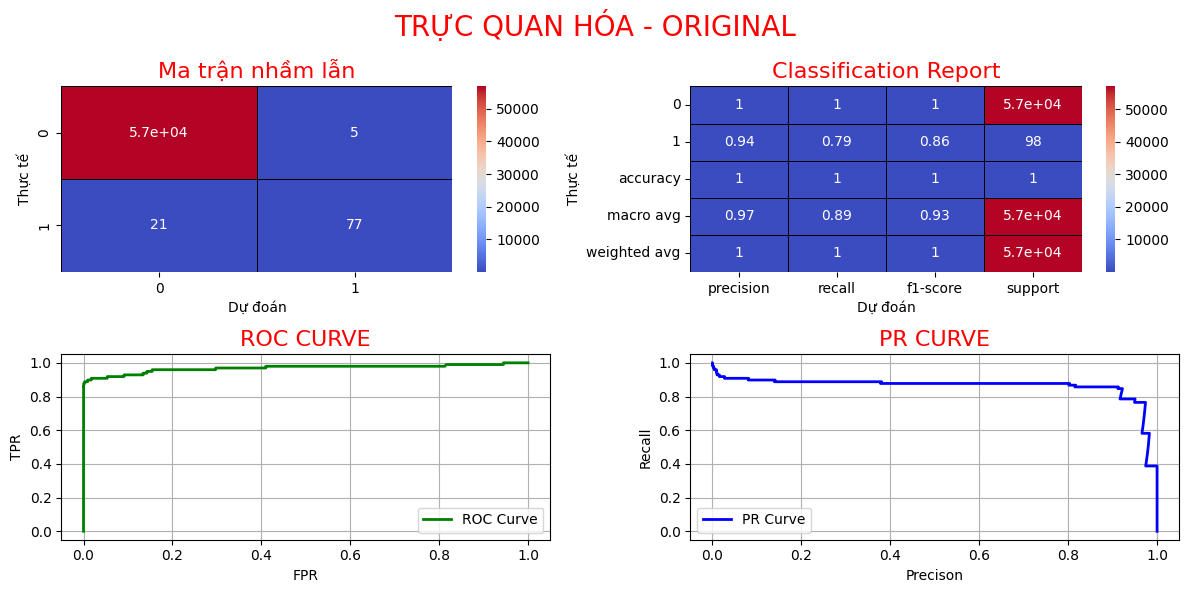

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
HU·∫§N LUY·ªÜN V·ªöI PH∆Ø∆†NG PH√ÅP X·ª¨ L√ù D·ªÆ LI·ªÜU: UNDERSAMPLING
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ti·∫øn h√†nh ƒë√°nh gi√° m√¥ h√¨nh: 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê·ªô ch√≠nh x√°c m√¥ h√¨nh l√†:  0.9986482216214319
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh Ma tr·∫≠n nh·∫ßm l·∫´n!

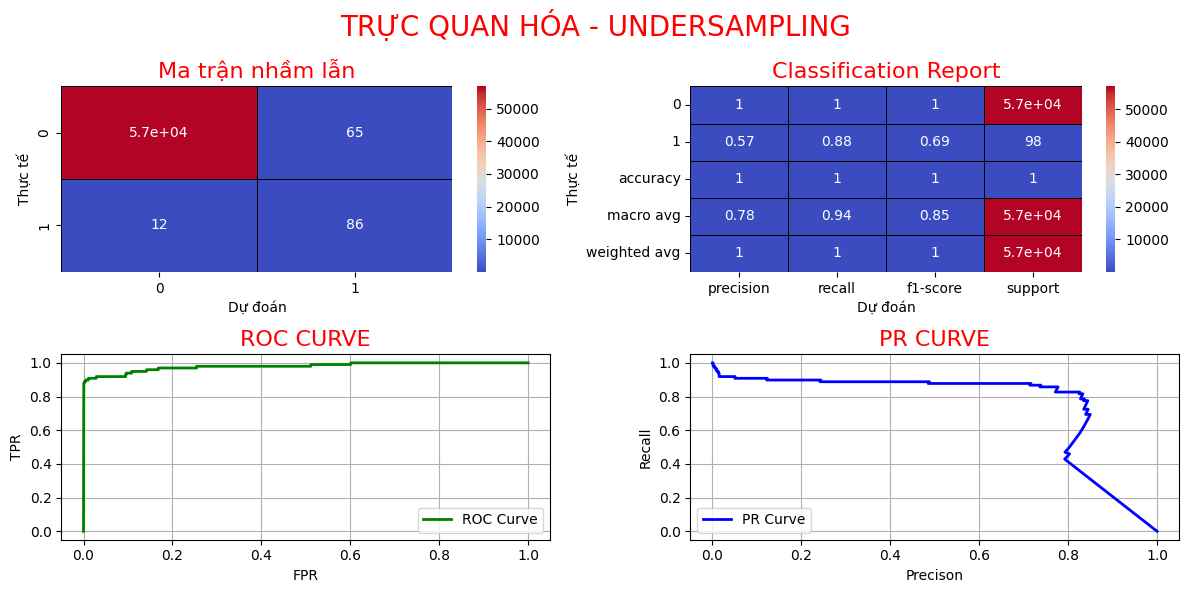

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
HU·∫§N LUY·ªÜN V·ªöI PH∆Ø∆†NG PH√ÅP X·ª¨ L√ù D·ªÆ LI·ªÜU: SMOTE
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ti·∫øn h√†nh ƒë√°nh gi√° m√¥ h√¨nh: 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê·ªô ch√≠nh x√°c m√¥ h√¨nh l√†:  0.9993153330290369
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh Ma tr·∫≠n nh·∫ßm l·∫´n! 
------

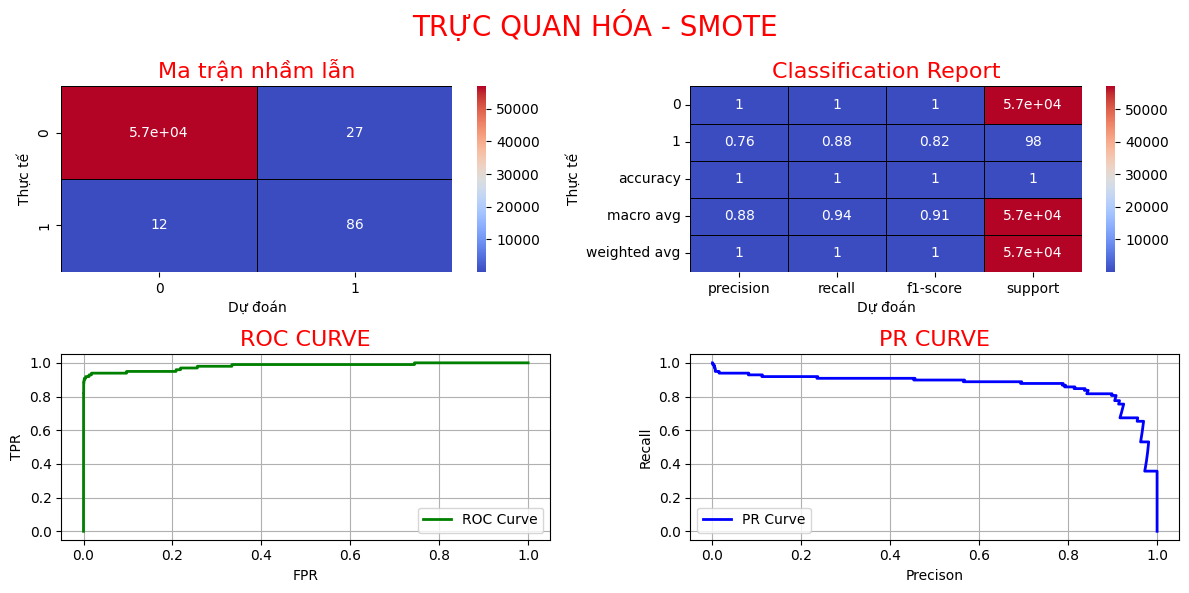

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
HU·∫§N LUY·ªÜN V·ªöI PH∆Ø∆†NG PH√ÅP X·ª¨ L√ù D·ªÆ LI·ªÜU: COMBINED
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ti·∫øn h√†nh ƒë√°nh gi√° m√¥ h√¨nh: 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê·ªô ch√≠nh x√°c m√¥ h√¨nh l√†:  0.9988939995084443
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh Ma tr·∫≠n nh·∫ßm l·∫´n! 
---

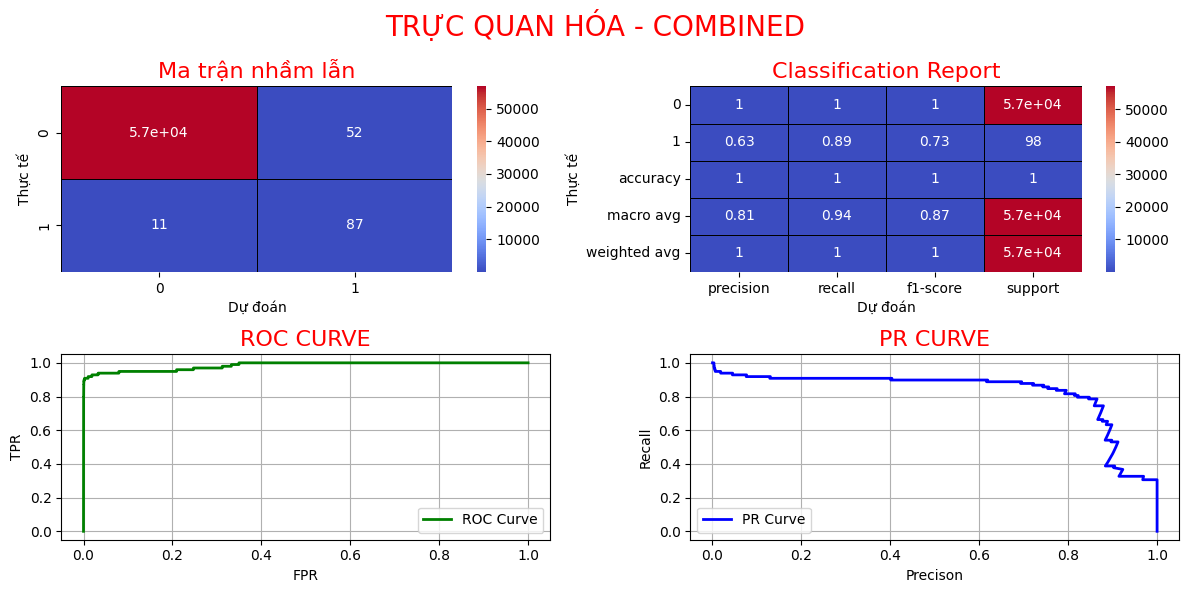

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Th·ª±c h√†nh Hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh

def train_and_evaluate_model(resampled_data, X_test, y_test):
  # RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'
    model = RandomForestClassifier(
        n_estimators = 50, #100
        max_depth = 10,  #15
        min_samples_split=5,
        random_state = 42,
        oob_score=True,
        n_jobs=-1,                     # T·∫≠n d·ª•ng to√†n b·ªô CPU
        verbose=0
    )

    # Danh s√°ch c√°c ph∆∞∆°ng ph√°p x·ª≠ l√Ω m·∫•t c√¢n b·∫±ng
    resampling_methods = ['original', 'undersampling','smote', 'combined']

    # L∆∞u tr·ªØ k·∫øt qu·∫£
    results = []

    # Hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh
    for method in resampling_methods:
        print("HU·∫§N LUY·ªÜN V·ªöI PH∆Ø∆†NG PH√ÅP X·ª¨ L√ù D·ªÆ LI·ªÜU:", method.upper())
        print("-"*200)

        X_train_resampled, y_train_resampled = resampled_data[method]

        # Hu·∫•n luy·ªán m√¥ h√¨nh
        model.fit(X_train_resampled, y_train_resampled)

        # D·ª± ƒëo√°n
        y_pred = model.predict(X_test)

        # T√≠nh Predict_Proba
        y_prob = model.predict_proba(X_test)[:, 1]

        # ƒê√°nh gi√° m√¥ h√¨nh:
        result = eva_and_viz_model(model, X_test, y_test, y_pred, y_prob, method)
        results.append(result)
        print('-'*200)

    return results

results = train_and_evaluate_model(resampled_data, X_test, y_test)


## **ƒê·ªÅ xu·∫•t c·∫£i ti·∫øn**

1. **GridSearchCV** cho c·∫£ ph∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu v√† Si√™u tham s·ªë c·ªßa RF

    - **Link:** https://claude.ai/share/fe33d575-bd55-4779-b150-a76084383c59

    - **M√¥ t·∫£:** T·ªëi ∆∞u h√≥a to√†n di·ªán. Thay v√¨ t√¨m ph∆∞∆°ng ph√°p x·ª≠ l√Ω d·ªØ li·ªáu t·ªët nh·∫•t HO·∫∂C tham s·ªë m√¥ h√¨nh t·ªët nh·∫•t, ta t√¨m ra s·ª± k·∫øt h·ª£p t·ªëi ∆∞u nh·∫•t c·ªßa c·∫£ hai c√πng m·ªôt l√∫c.


##‚úÖ6. Ch·ªçn m√¥ h√¨nh t·ªët nh·∫•t

### Th·ª±c h√†nh Code:
    - L·∫∑p qua t·ª´ng method trong results
    - So s√°nh v√† t√¨m best_method
    - return best_method

In [ ]:
def select_best_method(results):
    print("CH·ªåN PH∆Ø∆†NG PH√ÅP X·ª¨ L√ù T·ªêT NH·∫§T")
    print("-"*100)
    # Truy c·∫≠p v√†o t·ª´ danh s√°ch t·ª´ ƒëi·ªÉn results, truy c·∫≠p ƒë·∫øn key: 'pr_auc'
    # So s√°nh value c·ªßa key n√†y, t√¨m value max
    best_pr_auc = -np.inf
    best_method = None
    for method in results:
        if method['pr_auc'] > best_pr_auc:
            best_method = method['solu']
            best_pr_auc = method['pr_auc']

    print(f"Ph∆∞∆°ng ph√°p x·ª≠ l√Ω m·∫•t c√¢n b·∫±ng t·ªët nh·∫•t l√†: {best_method.upper()}, v·ªõi PR_AUC = {best_pr_auc:.4f} ")
    print("-"*100)
    return best_method

best_method = select_best_method(results)

CH·ªåN PH∆Ø∆†NG PH√ÅP X·ª¨ L√ù T·ªêT NH·∫§T
----------------------------------------------------------------------------------------------------
Ph∆∞∆°ng ph√°p x·ª≠ l√Ω m·∫•t c√¢n b·∫±ng t·ªët nh·∫•t l√†: SMOTE, v·ªõi PR_AUC = 0.8679 
----------------------------------------------------------------------------------------------------


##‚úÖ7. T·ªëi ∆∞u h√≥a m√¥ h√¨nh (GridSearchCV)

S·ª≠ d·ª•ng GridSearchCV ƒë·ªÉ t√¨m si√™u tham s·ªë t·ªëi ∆∞u.

### a. GridCV Level 1

Flow:

    - L·∫•y data hu·∫•n luy·ªán
    - G·ªçi model
    - X√¢y d·ª±ng param_grid
    - S·ª≠ d·ª•ng StratifiedKFold ƒë·ªÉ gi·ªØ nguy√™n t·ª∑ l·ªá ph√¢n ph·ªëi c√°c l·ªõp
    - G·ªçi GridSearchCV(
      Truy·ªÅn c√°c tham s·ªë
    )
    - grid.fit(X_train, y_train)

Tr·ª±c quan h√≥a:

    - ƒê√°nh gi√° v√† v·∫Ω:
        - Ma tr·∫≠n nh·∫ßm l·∫´n
        - Classification Report
        - ROC - AUC
        - PR - AUC


In [ ]:
def optimize_best_model(best_method, resampled_data, X_test, y_test):
    print('T·ªêI ∆ØU H√ìA M√î H√åNH')
    print("-"*100)

    # 7.0. L·∫•y d·ªØ li·ªáu hu·∫•n luy·ªán
    X_train, y_train = resampled_data[best_method]
    # 7.1. Kh·ªüi t·∫°o m√¥ h√¨nh
    model = RandomForestClassifier(random_state =  42)

    # 7.2. Khai b√°o c√°c si√™u tham s·ªë c·∫ßn th·ª≠
    param_grid = {
        'n_estimators': np.arange(20,100,40).tolist(),
        #'max_depth': np.arange(5,21,5).tolist(),
        'class_weight': [None, 'balanced']
    }
    # 7.3. Thi·∫øt l·∫≠p cv v·ªõi StratifiedKFOLD ƒë·ªÉ gi·ªØ nguy√™n t·ª∑ l·ªá ph√¢n ph·ªëi c√°c l·ªõp
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

    # 7.4 D√πng GridSearchCV ƒë·ªÉ th·ª≠ c√°c t·ªï h·ª£p si√™u tham s·ªë
    grid = GridSearchCV(
        estimator = model,
        param_grid = param_grid,
        cv = skf,
        scoring = 'average_precision',
        n_jobs = -1,
        verbose = 1
        )
    print("ƒêang th·ª±c hi·ªán t√¨m ki·∫øm l∆∞·ªõi")
    grid.fit(X_train, y_train)

    print("Best Params:", grid.best_params_)
    print("Best Score:", grid.best_score_)

    return grid.best_estimator_

best_model = optimize_best_model(best_method, resampled_data, X_test, y_test)

T·ªêI ∆ØU H√ìA M√î H√åNH
----------------------------------------------------------------------------------------------------
ƒêang th·ª±c hi·ªán t√¨m ki·∫øm l∆∞·ªõi
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'class_weight': 'balanced', 'n_estimators': 60}
Best Score: 0.9997662468825069


###b. GridCV Level 2: ƒëang nh√°p, ch∆∞a ch·∫°y ƒë∆∞·ª£c

***L·∫ßn ƒë·∫ßu ti·∫øp c·∫≠n, ch·ªâ ƒë·ªçc l∆∞·ªõt, ch∆∞a vi·∫øt code chi ti·∫øt***

    - C·∫ßn x√¢y d·ª±ng pipeline

Tuy nhi√™n, c√≥ m·ªôt v·∫•n ƒë·ªÅ v·ªõi c√°ch ti·∫øp c·∫≠n n√†y: scikit-learn pipeline th∆∞·ªùng ch·ªâ chuy·ªÉn ti·∫øp X trong khi gi·ªØ y ri√™ng bi·ªát. ƒê·ªÉ x·ª≠ l√Ω imbalance, ta c·∫ßn c·∫£ X v√† y. C√≥ m·ªôt s·ªë gi·∫£i ph√°p:

    - S·ª≠ d·ª•ng imblearn.pipeline.Pipeline thay v√¨ sklearn.pipeline.Pipeline
    - Ho·∫∑c s·ª≠ d·ª•ng FunctionTransformer v·ªõi class t√πy ch·ªânh

In [ ]:
def optimize_best_model(best_method, resampled_data, X_test, y_test):
    print('T·ªêI ∆ØU H√ìA M√î H√åNH')
    print("-"*100)

    # 7.0. L·∫•y d·ªØ li·ªáu hu·∫•n luy·ªán
    X_train, y_train = resampled_data[best_method]
    # 7.1. Kh·ªüi t·∫°o m√¥ h√¨nh
    model = RandomForestClassifier(random_state =  42)

    # 7.2. Khai b√°o c√°c si√™u tham s·ªë c·∫ßn th·ª≠
    param_grid = {
        'method': ['undersampling','smote', 'combined'],
        'n_estimators': np.arange(50,201,50).tolist(),
        'max_depth': np.arange(5,21,5).tolist(),
        'class_weight': ['None', 'balanced']
    }
    # 7.3. Thi·∫øt l·∫≠p cv v·ªõi StratifiedKFOLD ƒë·ªÉ gi·ªØ nguy√™n t·ª∑ l·ªá ph√¢n ph·ªëi c√°c l·ªõp
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

    # 7.4 D√πng GridSearchCV ƒë·ªÉ th·ª≠ c√°c t·ªï h·ª£p si√™u tham s·ªë
    grid = GridSearchCV(
        estimator = model,
        param_grid = param_grid,
        cv = skf,
        scoring = 'average_precision',
        n_jobs = -1,
        verbose = 1
        )
    print("ƒêang th·ª±c hi·ªán t√¨m ki·∫øm l∆∞·ªõi")
    grid.fit(X_train, y_train)

    print("Best Params:", grid.best_params_)
    print("Best Score:", grid.best_score_)

    result = evaluate_model(best_model, X_test, y_test, best_method)

    return grid.best_estimator_

best_model = optimize_best_model(best_method, resampled_data, X_test, y_test)


### Note:

    - ƒê·ªÉ s·ª≠ d·ª•ng cuML tr√™n Google Colab, b·∫°n c·∫ßn thi·∫øt l·∫≠p m√¥i tr∆∞·ªùng h·ªó tr·ª£ GPU NVIDIA v√† c√†i ƒë·∫∑t c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt...
    - C√≥ th·ªÉ s·ª≠ d·ª•ng Optuna v·ªõi cuML


### c. GridSearchCV + Tr·ª±c quan h√≥a k·∫øt qu·∫£

In [ ]:
def optimize_best_model(best_method, resampled_data, X_test, y_test):
    print('T·ªêI ∆ØU H√ìA M√î H√åNH')
    print("-"*100)

    # 7.0. L·∫•y d·ªØ li·ªáu hu·∫•n luy·ªán
    X_train, y_train = resampled_data[best_method]
    # 7.1. Kh·ªüi t·∫°o m√¥ h√¨nh
    model = RandomForestClassifier(random_state =  42)

    # 7.2. Khai b√°o c√°c si√™u tham s·ªë c·∫ßn th·ª≠
    param_grid = {
        'n_estimators': np.arange(50,101,40).tolist(),
        'max_depth': np.arange(5,21,5).tolist(),
        'class_weight': [None, 'balanced']
    }
    # 7.3. Thi·∫øt l·∫≠p cv v·ªõi StratifiedKFOLD ƒë·ªÉ gi·ªØ nguy√™n t·ª∑ l·ªá ph√¢n ph·ªëi c√°c l·ªõp
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

    # 7.4 D√πng GridSearchCV ƒë·ªÉ th·ª≠ c√°c t·ªï h·ª£p si√™u tham s·ªë
    grid = GridSearchCV(
        estimator = model,
        param_grid = param_grid,
        cv = skf,
        scoring = 'average_precision',
        n_jobs = -1,
        verbose = 1
        )
    print("ƒêang th·ª±c hi·ªán t√¨m ki·∫øm l∆∞·ªõi")
    grid.fit(X_train, y_train)

    print("Best Params:", grid.best_params_)
    print("Best Score:", grid.best_score_)

    return grid.best_estimator_

best_model = optimize_best_model(best_method, resampled_data, X_test, y_test)

y_pred = best_model.predict(X_test)

y_prob = best_model.predict_proba(X_test)[:, 1]

result = eva_and_viz_model(best_model, X_test, y_test, y_pred, y_prob, best_method)

Ti·∫øn h√†nh ƒë√°nh gi√° m√¥ h√¨nh: 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê·ªô ch√≠nh x√°c m√¥ h√¨nh l√†:  0.9994908886626171
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh Ma tr·∫≠n nh·∫ßm l·∫´n! 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh Classification Report! 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh ROC-AUC!
---------------

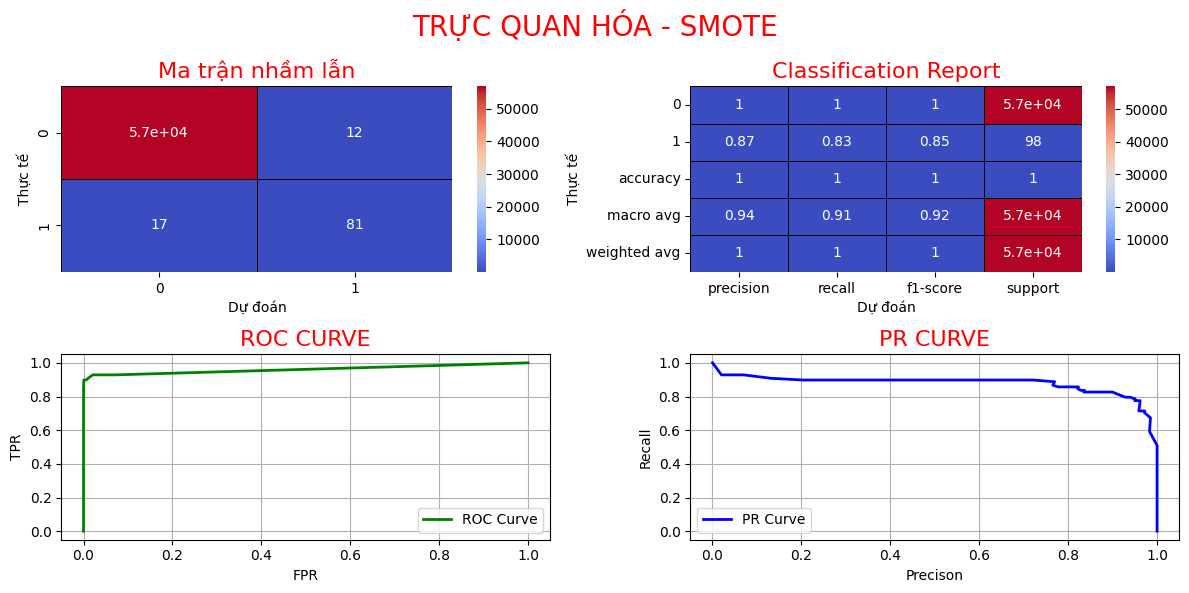

In [ ]:
y_pred = best_model.predict(X_test)

y_prob = best_model.predict_proba(X_test)[:, 1]

result = eva_and_viz_model(best_model, X_test, y_test, y_pred, y_prob, best_method)

##‚úÖ8.	T√¨m ng∆∞·ª°ng t·ªëi ∆∞u

X√°c ƒë·ªãnh ng∆∞·ª°ng x√°c su·∫•t t·ªëi ∆∞u ƒë·ªÉ ph√¢n lo·∫°i giao d·ªãch gian l·∫≠n.

Flow:

    - L·∫•y x√°c su·∫•t d·ª± ƒëo√°n
    - T√≠nh Precison, Recall, thresholds v·ªõi precision_recall_curve(y_test, y_probs)
    - T√≠nh F1-score
    - T√¨m ch·ªâ s·ªë f1_score max
    - T√¨m threshold t∆∞∆°ng ·ª©ng

Tr·ª±c quan h√≥a:

    - V·∫Ω ƒë·ªì th·ªã precision, recall theo ng∆∞·ª°ng
    - ƒê√°nh gi√° m√¥ h√¨nh:
        - Ma tr·∫≠n nh·∫ßm l·∫´n
        - Classification Report

### a. Code m·∫´u


In [ ]:
# 9. Thi·∫øt l·∫≠p ng∆∞·ª°ng t·ªëi ∆∞u cho m√¥ h√¨nh
def find_optimal_threshold(best_model, X_test, y_test):
    """
    T√¨m ng∆∞·ª°ng t·ªëi ∆∞u cho m√¥ h√¨nh ƒë·ªÉ c√¢n b·∫±ng gi·ªØa precision v√† recall
    """
    print("\n9. T√åM NG∆Ø·ª†NG T·ªêI ∆ØU CHO M√î H√åNH")
    print("-" * 50)

    # L·∫•y x√°c su·∫•t d·ª± ƒëo√°n
    y_probs = best_model.predict_proba(X_test)[:, 1]

    # T√≠nh precision v√† recall cho c√°c ng∆∞·ª°ng kh√°c nhau
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

    # T√≠nh F1-score cho m·ªói ng∆∞·ª°ng
    f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

    # T√¨m ng∆∞·ª°ng c√≥ F1-score cao nh·∫•t
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"Ng∆∞·ª°ng t·ªëi ∆∞u: {optimal_threshold:.4f}")
    print(f"F1-score t·ªëi ∆∞u: {f1_scores[optimal_idx]:.4f}")
    print(f"Precision t·∫°i ng∆∞·ª°ng t·ªëi ∆∞u: {precisions[optimal_idx]:.4f}")
    print(f"Recall t·∫°i ng∆∞·ª°ng t·ªëi ∆∞u: {recalls[optimal_idx]:.4f}")

    # V·∫Ω ƒë·ªì th·ªã precision, recall v√† F1-score theo ng∆∞·ª°ng
    plt.figure(figsize=(12, 8))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.plot(thresholds, f1_scores, 'r-.', label='F1-score')
    plt.axvline(x=optimal_threshold, color='k', linestyle='-', label=f'Optimal Threshold: {optimal_threshold:.4f}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision, Recall v√† F1-score theo Ng∆∞·ª°ng')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ƒê√°nh gi√° m√¥ h√¨nh v·ªõi ng∆∞·ª°ng t·ªëi ∆∞u
    print("\nƒê√°nh gi√° m√¥ h√¨nh v·ªõi ng∆∞·ª°ng t·ªëi ∆∞u:")
    y_pred_optimal = (y_probs >= optimal_threshold).astype(int)
    print(classification_report(y_test, y_pred_optimal))

    # V·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n v·ªõi ng∆∞·ª°ng t·ªëi ∆∞u
    plt.figure(figsize=(10, 8))
    cm_optimal = confusion_matrix(y_test, y_pred_optimal)
    sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - With Optimal Threshold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return optimal_threshold

### b. Th·ª±c h√†nh

#### Level 1: L√†m quen


In [ ]:
def find_optimal_threshold(best_model, X_test, y_test):
    print("T√åM NG∆Ø·ª†NG T·ªêI ∆ØU CHO M√î H√åNH")
    print("-"*100)

    # L·∫•y x√°c su·∫•t d·ª± ƒëo√°n
    y_probs = best_model.predict_proba(X_test)[:, 1]

    # T√≠nh precision v√† recall cho c√°c ng∆∞·ª°ng kh√°c nhau
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

    # T√≠nh F1-score cho m·ªói ng∆∞·ª°ng
    f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

    # T√¨m ng∆∞·ª°ng c√≥ F1-score cao nh·∫•t
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"Ng∆∞·ª°ng t·ªëi ∆∞u: {optimal_threshold:.4f}")
    print(f"F1-score t·ªëi ∆∞u: {f1_scores[optimal_idx]:.4f}")
    print(f"Precision t·∫°i ng∆∞·ª°ng t·ªëi ∆∞u: {precisions[optimal_idx]:.4f}")
    print(f"Recall t·∫°i ng∆∞·ª°ng t·ªëi ∆∞u: {recalls[optimal_idx]:.4f}")

    return optimal_threshold

best_threshold = find_optimal_threshold(best_model, X_test, y_test)

T√åM NG∆Ø·ª†NG T·ªêI ∆ØU CHO M√î H√åNH
----------------------------------------------------------------------------------------------------
           0
0   0.001720
1   0.021854
2   0.071654
3   0.133234
4   0.205128
5   0.275000
6   0.369748
7   0.446701
8   0.526946
9   0.582781
10  0.619718
11  0.647059
12  0.666667
13  0.687500
14  0.704000
15  0.721311
16  0.769912
17  0.765766
18  0.777778
19  0.785047
20  0.800000
21  0.807692
22  0.823529
           0
0   0.003435
1   0.042703
2   0.133041
3   0.232376
4   0.333966
5   0.421053
6   0.523810
7   0.596610
8   0.664151
9   0.706827
10  0.733333
11  0.752137
12  0.765217
13  0.778761
14  0.789238
15  0.800000
16  0.824645
17  0.813397
18  0.815534
19  0.819512
20  0.827586
21  0.831683
22  0.840000
22
Ng∆∞·ª°ng t·ªëi ∆∞u l√†: 0.38333333333333336
F1-score t·ªëi ∆∞u l√†: 0.84
Precision t·ªëi ∆∞u l√†: 0.8235294117647058
Recall t·ªëi ∆∞u l√†: 0.8571428571428571
--------------------------------------------------------------------------

#### Level 2: t·ª± code

In [ ]:
def find_optimal_threshold(best_model, X_test, y_test):
    print("T√åM NG∆Ø·ª†NG T·ªêI ∆ØU CHO M√î H√åNH")
    print("-"*100)

    y_probs = best_model.predict_proba(X_test)[:,1]

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

    #  f1_score = 2*P*R/(P+R)

    f1_scores = pd.DataFrame(2 * precisions[:-1] * recalls[:-1] / (precisions[:-1] + recalls[:-1]))
    # [:-1]: l·∫•y t·∫•t c·∫£ ph·∫ßn t·ª≠ tr·ª´ ph·∫ßn t·ª≠ cu·ªëi c√πng
    precisions = pd.DataFrame(precisions[:-1])
    recalls = pd.DataFrame(recalls[:-1])

    r_idx = recalls[0] > 0.85

    precisions = precisions[r_idx].reset_index(drop = True).dropna()
    print(precisions)
    recalls = recalls[r_idx].reset_index(drop = True).dropna()
    f1_scores = f1_scores[r_idx].reset_index(drop = True).dropna()
    print(f1_scores)

    # T√¨m ng∆∞·ª°ng c√≥ F1_score cao nh·∫•t
    optimal_idx = np.argmax(f1_scores)
    print(optimal_idx)

    optimal_threshold = thresholds[optimal_idx]

    # In ra k·∫øt qu·∫£:
    print(f"Ng∆∞·ª°ng t·ªëi ∆∞u l√†: {optimal_threshold}")
    print(f"F1-score t·ªëi ∆∞u l√†: {f1_scores.iloc[optimal_idx,0]}")
    print(f"Precision t·ªëi ∆∞u l√†: {precisions.iloc[optimal_idx, 0]}")
    print(f"Recall t·ªëi ∆∞u l√†: {recalls.iloc[optimal_idx, 0]}")
    print("-"*100)

best_threshold = find_optimal_threshold(best_model, X_test, y_test)

####Level 2: tham kh·∫£o

In [ ]:
def find_optimal_threshold(best_model, X_test, y_test, min_recall=0.85):
    print("T√åM NG∆Ø·ª†NG T·ªêI ∆ØU CHO M√î H√åNH")
    print("-"*100)

    # D·ª± ƒëo√°n x√°c su·∫•t cho l·ªõp 1
    y_probs = best_model.predict_proba(X_test)[:, 1]

    # T√≠nh precision, recall, thresholds
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

    # B·ªè ph·∫ßn t·ª≠ cu·ªëi v√¨ kh√¥ng c√≥ threshold t∆∞∆°ng ·ª©ng
    precisions = precisions[:-1]
    recalls = recalls[:-1]
    thresholds = thresholds

    # T√≠nh F1
    f1_scores = 2 * precisions * recalls / (precisions + recalls)

    # L·ªçc nh·ªØng ƒëi·ªÉm c√≥ recall >= min_recall
    mask = recalls >= min_recall

    if not np.any(mask):
        print(f"Kh√¥ng c√≥ ƒëi·ªÉm n√†o ƒë·∫°t recall >= {min_recall}")
        return None

    # L·ªçc c√°c gi√° tr·ªã t∆∞∆°ng ·ª©ng
    filtered_thresholds = thresholds[mask]
    filtered_f1 = f1_scores[mask]
    filtered_prec = precisions[mask]
    filtered_rec = recalls[mask]

    # L·∫•y ch·ªâ s·ªë c√≥ F1 cao nh·∫•t
    optimal_idx = np.argmax(filtered_f1)
    optimal_threshold = filtered_thresholds[optimal_idx]

    # In k·∫øt qu·∫£
    print(f"Ng∆∞·ª°ng t·ªëi ∆∞u l√†: {optimal_threshold:.4f}")
    print(f"F1-score t·ªëi ∆∞u l√†: {filtered_f1[optimal_idx]:.4f}")
    print(f"Precision t·ªëi ∆∞u l√†: {filtered_prec[optimal_idx]:.4f}")
    print(f"Recall t·ªëi ∆∞u l√†: {filtered_rec[optimal_idx]:.4f}")
    print("-"*100)

    return optimal_threshold
best_threshold = find_optimal_threshold(best_model, X_test, y_test)

T√åM NG∆Ø·ª†NG T·ªêI ∆ØU CHO M√î H√åNH
----------------------------------------------------------------------------------------------------
Ng∆∞·ª°ng t·ªëi ∆∞u l√†: 0.3833
F1-score t·ªëi ∆∞u l√†: 0.8400
Precision t·ªëi ∆∞u l√†: 0.8235
Recall t·ªëi ∆∞u l√†: 0.8571
----------------------------------------------------------------------------------------------------


#### Tr·ª±c quan h√≥a sau t·ªëi ∆∞u ng∆∞·ª°ng

Ti·∫øn h√†nh ƒë√°nh gi√° m√¥ h√¨nh: 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê·ªô ch√≠nh x√°c m√¥ h√¨nh l√†:  0.999420666409185
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh Ma tr·∫≠n nh·∫ßm l·∫´n! 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh Classification Report! 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh ROC-AUC!
----------------

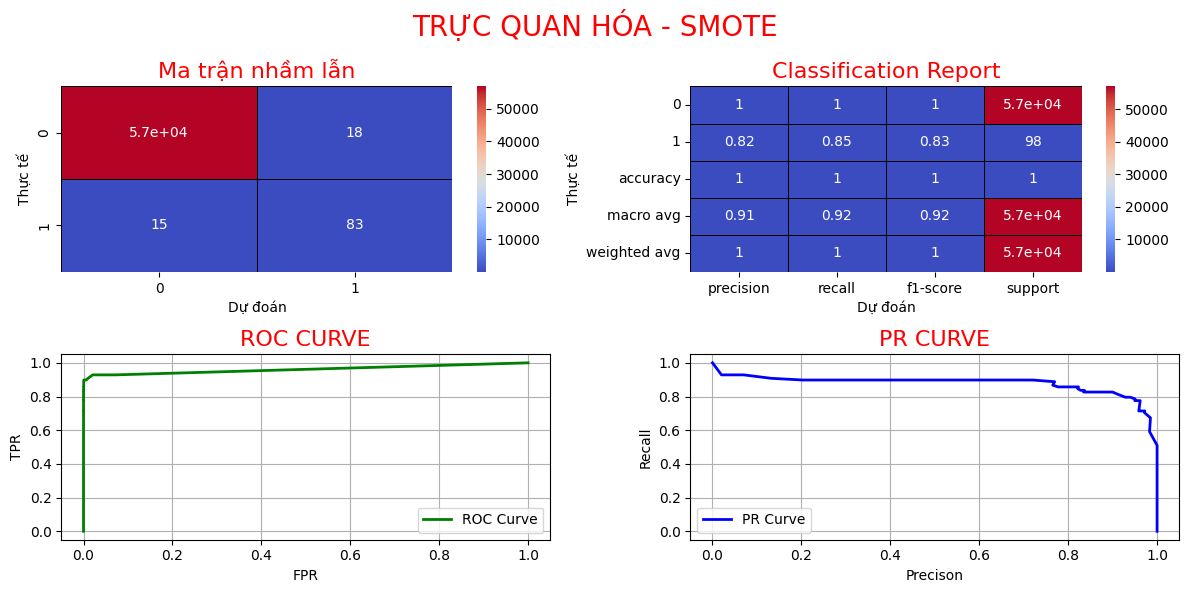

    solu   roc_auc    pr_auc
0  smote  0.961289  0.878635


In [ ]:
y_probs = best_model.predict_proba(X_test)[:,1]

y_pred = (y_probs > best_threshold).astype(int)

end_output = eva_and_viz_model(best_model, X_test, y_test, y_pred, y_probs, best_method)
print(pd.DataFrame([end_output]))

## Code Full

https://colab.research.google.com/drive/1AsJ1MxQtg0229ks-nj4LaggIOxfWfOP3?usp=sharing

## ‚úÖ9. Deploy m√¥ h√¨nh v·ªõi Streamlit


### 9.1 Train l·∫°i model ƒë√£ GridSearchCV

T·∫°i sao l·∫°i train l·∫°i?

    Ta train l·∫°i ƒë·ªÉ demo nhanh, kh√¥ng c·∫ßn GridSearchCV l·∫°i!

Ti·∫øn h√†nh ƒë√°nh gi√° m√¥ h√¨nh: 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê·ªô ch√≠nh x√°c m√¥ h√¨nh l√†:  0.9994382219725431
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh Ma tr·∫≠n nh·∫ßm l·∫´n! 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh Classification Report! 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ƒê√£ t√≠nh ROC-AUC!
---------------

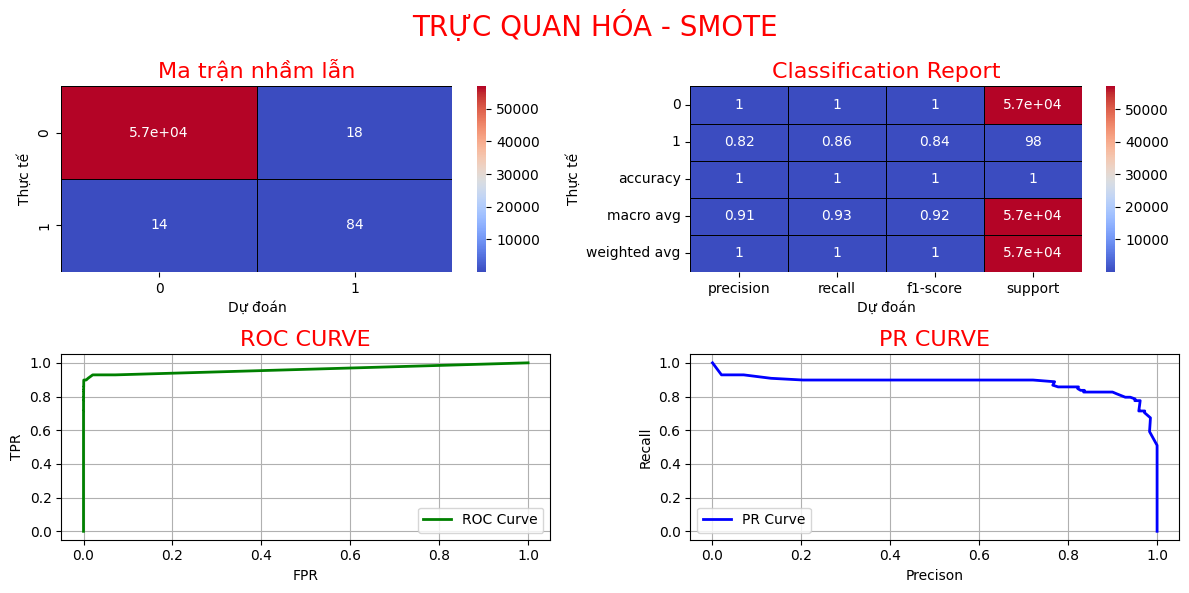

In [ ]:
best_model = RandomForestClassifier(
    class_weight = 'balanced',
    n_estimators = 60,
    n_jobs = -1,
    verbose = 0,
    random_state = 42
)

X_train_end, y_train_end = resampled_data[best_method]

# Hu·∫•n luy·ªán m√¥ h√¨nh
best_model.fit(X_train_end, y_train_end)

# # ƒê√°nh gi√° m√¥ h√¨nh, t√¨m y_pred
# y_pred = best_model.predict(X_test)

# Ng∆∞·ª°ng t·ªëi ∆∞u
best_threshold = 0.38333333333333336

# T√≠nh x√°c su·∫•t d·ª± ƒëo√°n predict_proba
y_prob = best_model.predict_proba(X_test)[:, 1]

# ƒê√°nh gi√° m√¥ h√¨nh
y_pred = (y_prob >= best_threshold).astype(int)

eva_end_model = eva_and_viz_model(best_model, X_test, y_test, y_pred, y_prob, best_method)

### 9.2 L∆∞u m√¥ h√¨nh hu·∫•n luy·ªán

In [ ]:
import joblib

# L∆∞u m√¥ h√¨nh RandomForest ƒë√£ hu·∫•n luy·ªán
joblib.dump(best_model, "credit_card_fraud_detection_rf.pkl")
print("M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u!")

M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u!


### 9.3 T·∫£i model v·ªÅ m√°y


In [ ]:
from google.colab import files
# T·∫£i t·ªáp v·ªÅ m√°y local
files.download("credit_card_fraud_detection_rf.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 9.4 T·∫°o d·ªØ li·ªáu test gi·∫£ l·∫≠p

In [ ]:
import pandas as pd
import numpy as np

# Thi·∫øt l·∫≠p seed ƒë·ªÉ t√°i l·∫≠p
np.random.seed(42)

# S·ªë l∆∞·ª£ng m·∫´u
n_samples = 1000
fraud_ratio = 0.005  # ~0.5% gi·∫£ l·∫≠p fraud
n_frauds = int(n_samples * fraud_ratio)

# T·∫°o ƒë·∫∑c tr∆∞ng
data = {
    'Time': np.random.randint(0, 172800, size=n_samples),  # trong 2 ng√†y
    'Amount': np.round(np.random.exponential(scale=100, size=n_samples), 2)  # ph√¢n ph·ªëi l·ªách ph·∫£i
}

# Th√™m c√°c c·ªôt PCA V1 ƒë·∫øn V28
for i in range(1, 29):
    data[f'V{i}'] = np.random.normal(loc=0, scale=1, size=n_samples)

df_test = pd.DataFrame(data)

df_test.to_csv('file_test_creditcard.csv', index=False)
print("‚úÖ ƒê√£ t·∫°o file_test_creditcard.csv")

# Th√™m nh√£n Class (fraud = 1, h·ª£p l·ªá = 0)
data['Class'] = [1]*n_frauds + [0]*(n_samples - n_frauds)
np.random.shuffle(data['Class'])

# T·∫°o DataFrame
df = pd.DataFrame(data)

# Ghi ra file CSV
df.to_csv('data_test_creditcard.csv', index=False)
print("‚úÖ ƒê√£ t·∫°o data_test_creditcard.csv")

‚úÖ ƒê√£ t·∫°o file_test_creditcard.csv
‚úÖ ƒê√£ t·∫°o data_test_creditcard.csv


### 9.5 T·∫£i d·ªØ li·ªáu test v·ªÅ m√°y

In [ ]:
from google.colab import files

files.download('file_test_creditcard.csv')
print('ƒê√£ t·∫£i file_test_creditcard.csv!')

print('-'*100)

files.download('data_test_creditcard.csv')
print('ƒê√£ t·∫£i data_test_creditcard.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ƒê√£ t·∫£i file_test_creditcard.csv!
----------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ƒê√£ t·∫£i data_test_creditcard.csv


### 9.6 T·∫£i d·ªØ li·ªáu t·ª´ t·∫≠p test

In [ ]:
# ƒê∆∞·ªùng d·∫´n t·ªõi file
file_path = '/content/drive/MyDrive/creditcard.csv'

# ƒê·ªçc file CSV v√†o dataframe
df = pd.read_csv(file_path)

X_test = df.loc[0:1000, :]

print(X_test['Class'].value_counts())

Class
0    999
1      2
Name: count, dtype: int64


In [ ]:
X_test.to_csv('X_test.csv', index = False)
files.download('X_test.csv')

### 9.7 Code giao di·ªán ch·∫°y local

L∆∞u √Ω: Ch·∫°y tr√™n Colab s·∫Ω b·ªã bug! Nh·ªõ check qua live khi s·ª≠ d·ª•ng ph·∫ßn n√†y!

In [ ]:
import joblib
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

loaded_model = joblib.load(r"C:\Users\User\Downloads\credit_card_fraud_detection_rf.pkl")
print("M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c t·∫£i th√†nh c√¥ng!")

st.set_page_config(page_title="Fraud Detection", layout="wide")

col1, col2, col3 = st.columns([1, 2, 1])
with col2:
    st.title("CREDIT CART FRAUD DETECTION")

# Load model
# B∆∞·ªõc 1: T·∫£i file CSV
st.sidebar.header("1Ô∏è‚É£ T·∫£i file CSV d·ªØ li·ªáu m·ªõi")
data_file = st.sidebar.file_uploader("T·∫£i d·ªØ li·ªáu: ", type=["csv","xlsx"])

# L·ª±a ch·ªçn ng∆∞·ª°ng
col1, col2 = st.sidebar.columns(2)
with col1:
    threshold_slider = st.slider("Ng∆∞·ª°ng 1 (k√©o th·∫£)", 0.0, 1.0, 0.5, 0.01)
with col2:
    threshold = st.number_input("Ho·∫∑c nh·∫≠p gi√° tr·ªã", 0.0, 1.0, threshold_slider, 0.01)

# ƒê·ªçc d·ªØ li·ªáu
if data_file is not None:
    new_data = pd.read_csv(data_file, encoding= 'utf-8')
    st.write("üìä D·ªÆ LI·ªÜU T·∫¢I L√äN:")
    st.dataframe(new_data.head())

    st.success("‚úÖ T·∫¢I D·ªÆ LI·ªÜU TH√ÄNH C√îNG!")

    # Hi·ªÉn th·ªã s∆° l∆∞·ª£c
    with st.expander("üîç TH√îNG TIN D·ªÆ LI·ªÜU"):
        st.write(new_data.head())

    with st.expander("üìäTH·ªêNG K√ä M√î T·∫¢: df.describe()"):
        st.write(new_data.describe())

    # X·ª≠ l√Ω d·ªØ li·ªáu
    with st.expander("üîçX·ª¨ L√ù D·ªÆ LI·ªÜU "):
        st.write("B·∫Øt ƒë·∫ßu X·ª≠ l√Ω d·ªØ li·ªáu:")

        df = new_data.copy()

        # X√≥a c√°c d√≤ng ch·ª©a NaN
        df = df.dropna()
        st.write("ƒê√£ X√≥a Mising Value!")

        # T·∫°o ƒë·∫∑c tr∆∞ng m·ªõi
        df['Hour'] = (df['Time'] // 3600) % 24
        st.write("ƒê√£ th√™m ƒë·∫∑c tr∆∞ng Hour v√†o Data!")

        df['Is_Night'] = df['Hour'].apply(lambda x: 1 if x < 6 else 0)
        st.write("ƒê√£ th√™m ƒë·∫∑c tr∆∞ng Is_Night v√†o Data!")

        df['High_Amount'] = df['Amount'].apply(lambda x: 1 if x > 1000 else 0)
        st.write("ƒê√£ th√™m ƒë·∫∑c tr∆∞ng High_Amount v√†o Data!")

        bins = [0, 100, 500, 1000, 5000, 2000000]
        labels = [0, 1, 2, 3, 4]
        df['Amount_Bins'] = pd.cut(df['Amount'], bins=bins, labels=labels, include_lowest=True)
        df['Amount_Bins'] = df['Amount_Bins'].astype(int)
        st.write("ƒê√£ th√™m ƒë·∫∑c tr∆∞ng Amount_Bins v√†o Data!")

        df['High_Amount_at_Night'] = df['Is_Night'] * df['High_Amount']
        st.write("ƒê√£ th√™m ƒë·∫∑c tr∆∞ng High_Amount_at_Night v√†o Data!")

    st.success("‚úÖ ƒê√É TH√äM ƒê·∫∂C TR∆ØNG V√ÄO DATA!")

    # L·∫•y danh s√°ch features m√† m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán
    required_features = loaded_model.feature_names_in_

    # Ch·ªçn ch·ªâ c√°c c·ªôt c·∫ßn thi·∫øt t·ª´ d·ªØ li·ªáu m·ªõi
    X_predict = df[required_features]

    # D·ª± ƒëo√°n
    # X·ª≠ l√Ω d·ªØ li·ªáu
    with st.expander("üîçD·ª∞ ƒêO√ÅN"):
        y_proba = loaded_model.predict_proba(X_predict)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)
        st.write("ƒê√£ t√≠nh y_pred v√† y_prob!")

        df['fraud_probability'] = y_proba
        df['is_fraud'] = y_pred

        st.write("üìà K·∫øt qu·∫£ d·ª± ƒëo√°n:")
        st.dataframe(df[['fraud_probability', 'is_fraud']].head())

    with st.expander("üîçTR·ª∞C QUAN H√ìA K·∫æT QU·∫¢:"):
        col1, col2 = st.columns(2)

        with col1:
            fig, ax = plt.subplots()
            sns.histplot(y_proba, bins=30, kde=True, ax=ax, color='skyblue')
            ax.axvline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")
            ax.set_title("Ph√¢n b·ªë x√°c su·∫•t d·ª± ƒëo√°n")
            ax.legend()
            st.pyplot(fig)

        with col2:
            fraud_counts = df['is_fraud'].value_counts().rename({0: 'Kh√¥ng gian l·∫≠n', 1: 'Gian l·∫≠n'})
            st.write("T·ª∑ l·ªá ph√¢n lo·∫°i:")
            st.write(fraud_counts)
            fig2, ax2 = plt.subplots()
            ax2.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])
            ax2.axis('equal')
            st.pyplot(fig2)

        # Cho t·∫£i k·∫øt qu·∫£
        csv_output = df.to_csv(index=False)
        st.download_button("üì• T·∫£i k·∫øt qu·∫£ d·ª± ƒëo√°n", data=csv_output, file_name="du_doan_fraud.csv", mime="text/csv")


### 9.8 N·∫øu mu·ªën ch·∫°y tr√™n Colab - check qua project n√†y:

https://colab.research.google.com/drive/1H37faFJD2YWZiRf5v29o69tbK9Yebqb3?usp=sharing#scrollTo=-uncPc4yIrDq